In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diemthi = pd.read_csv("./diem_thi_thpt_2022.csv")

In [3]:
diemthi["sbd"] = diemthi["sbd"].astype(str)
diemthi["ma_tinh"] = diemthi["sbd"].str[:2]

In [5]:
diemthi.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_tinh
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,10
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,10
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,10
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,10
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,10


In [4]:
diemthi_group = diemthi.groupby(["ma_tinh", "toan"]).agg(num_student=("sbd", "count")).reset_index()

In [6]:
diemthi_group

,ma_tinh,toan,num_student
0,10,0.0,1
1,10,0.8,2
2,10,1.0,7
3,10,1.2,33
4,10,1.4,68
...,...,...,...
2616,90,8.8,94
2617,90,9.0,33
2618,90,9.2,20
2619,90,9.4,11


<AxesSubplot:xlabel='toan', ylabel='Count'>

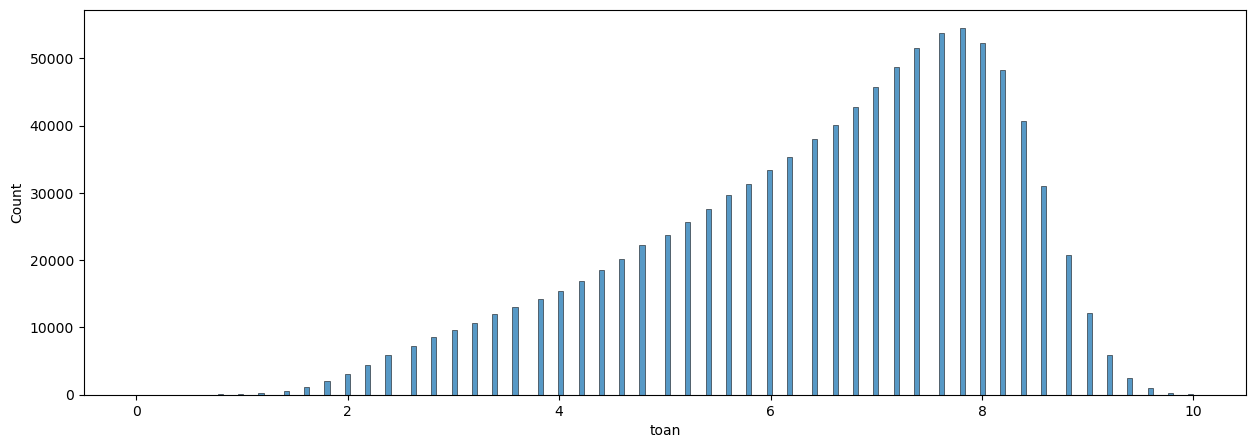

In [8]:
fig, ax= plt.subplots(1, 1, figsize=(15, 5))
sns.histplot(data=diemthi, x="toan", ax=ax)

In [8]:
cum_10 = diemthi_group.loc[diemthi_group.ma_tinh == "10"]

In [9]:
cum_10

,ma_tinh,toan,num_student
0,10,0.0,1
1,10,0.8,2
2,10,1.0,7
3,10,1.2,33
4,10,1.4,68
5,10,1.6,121
6,10,1.8,241
7,10,2.0,343
8,10,2.2,502
9,10,2.4,739


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '7'),
 Text(0, 0, '33'),
 Text(0, 0, '68'),
 Text(0, 0, '121'),
 Text(0, 0, '241'),
 Text(0, 0, '343'),
 Text(0, 0, '502'),
 Text(0, 0, '739'),
 Text(0, 0, '763'),
 Text(0, 0, '981'),
 Text(0, 0, '1076'),
 Text(0, 0, '1157'),
 Text(0, 0, '1268'),
 Text(0, 0, '1387'),
 Text(0, 0, '1465'),
 Text(0, 0, '1505'),
 Text(0, 0, '1602'),
 Text(0, 0, '1711'),
 Text(0, 0, '1855'),
 Text(0, 0, '1991'),
 Text(0, 0, '2086'),
 Text(0, 0, '2305'),
 Text(0, 0, '2418'),
 Text(0, 0, '2540'),
 Text(0, 0, '2702'),
 Text(0, 0, '2880'),
 Text(0, 0, '3025'),
 Text(0, 0, '3390'),
 Text(0, 0, '3609'),
 Text(0, 0, '4102'),
 Text(0, 0, '4418'),
 Text(0, 0, '4983'),
 Text(0, 0, '5475'),
 Text(0, 0, '6021'),
 Text(0, 0, '6417'),
 Text(0, 0, '6502'),
 Text(0, 0, '6242'),
 Text(0, 0, '5689'),
 Text(0, 0, '4598'),
 Text(0, 0, '3204'),
 Text(0, 0, '2008'),
 Text(0, 0, '996'),
 Text(0, 0, '473'),
 Text(0, 0, '175'),
 Text(0, 0, '30'),
 Text(0, 0, '6')]

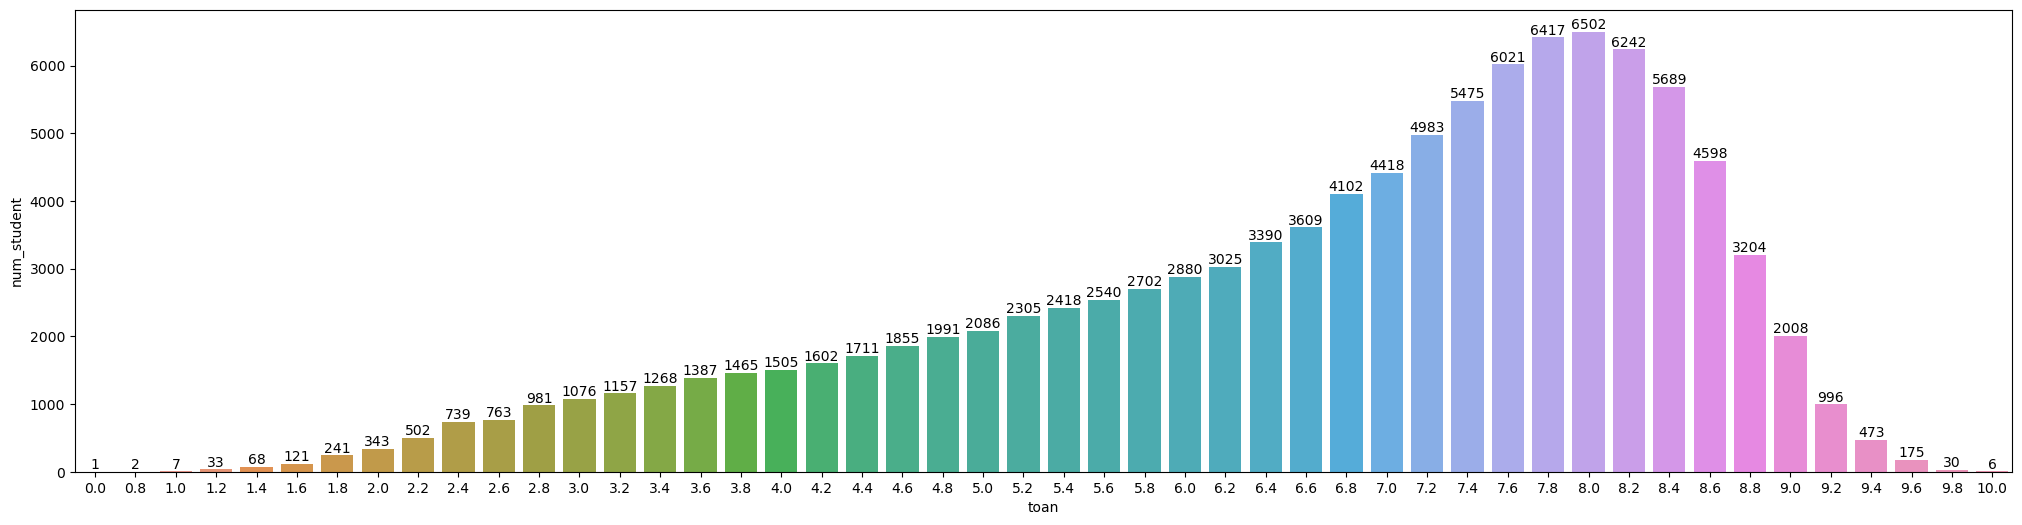

In [21]:
fig, ax= plt.subplots(1, 1, figsize=(25, 6))

sns.barplot(data=cum_10, x="toan", y="num_student", ax=ax)
ax.bar_label(ax.containers[0])

In [10]:
khoi_a = diemthi.dropna(subset=["vat_li", "hoa_hoc"])
khoi_a["total"] = khoi_a["toan"] + khoi_a["vat_li"] + khoi_a["hoa_hoc"]
khoi_a.loc[:, "bins"] = pd.cut(x=khoi_a['total'], bins=list(range(0, 31, 1)))
khoi_a_group = khoi_a.groupby(["bins"]).agg(num_student=("sbd", "count")).reset_index()

/var/folders/gt/0d0rqfrx3_q_dk7kdq70pr180000gn/T/ipykernel_30793/3782970672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khoi_a["total"] = khoi_a["toan"] + khoi_a["vat_li"] + khoi_a["hoa_hoc"]
/var/folders/gt/0d0rqfrx3_q_dk7kdq70pr180000gn/T/ipykernel_30793/3782970672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khoi_a.loc[:, "bins"] = pd.cut(x=khoi_a['total'], bins=list(range(0, 31, 1)))


In [11]:
khoi_a

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_tinh,total,bins
10,1000011,6.4,7.25,7.6,3.50,8.00,3.00,NaN,NaN,NaN,10,17.90,"(17, 18]"
14,1000015,8.6,7.25,9.6,8.25,3.25,4.25,NaN,NaN,NaN,10,20.10,"(20, 21]"
15,1000016,7.8,5.75,8.4,4.25,8.00,4.75,NaN,NaN,NaN,10,20.05,"(20, 21]"
16,1000017,8.6,6.25,7.0,7.00,3.50,3.75,NaN,NaN,NaN,10,19.10,"(19, 20]"
22,1000023,6.8,6.00,6.8,2.50,5.50,3.00,NaN,NaN,NaN,10,14.80,"(14, 15]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995410,64006558,8.0,5.00,3.0,6.00,8.00,2.75,NaN,NaN,NaN,64,22.00,"(21, 22]"
995411,64006559,5.8,4.75,3.6,4.75,3.50,3.50,NaN,NaN,NaN,64,14.05,"(14, 15]"
995423,64006571,6.4,6.50,3.4,6.75,6.00,5.25,NaN,NaN,NaN,64,19.15,"(19, 20]"
995427,64006575,5.8,5.25,3.4,5.00,5.00,2.00,NaN,NaN,NaN,64,15.80,"(15, 16]"


/var/folders/gt/0d0rqfrx3_q_dk7kdq70pr180000gn/T/ipykernel_28776/1845879372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khoi_a.loc[:, "bins"] = pd.cut(x=khoi_a['total'], bins=list(range(0, 31, 1)))


,bins,num_student
0,"(0, 1]",0
1,"(1, 2]",0
2,"(2, 3]",0
3,"(3, 4]",0
4,"(4, 5]",0
5,"(5, 6]",9
6,"(6, 7]",37
7,"(7, 8]",127
8,"(8, 9]",196
9,"(9, 10]",403


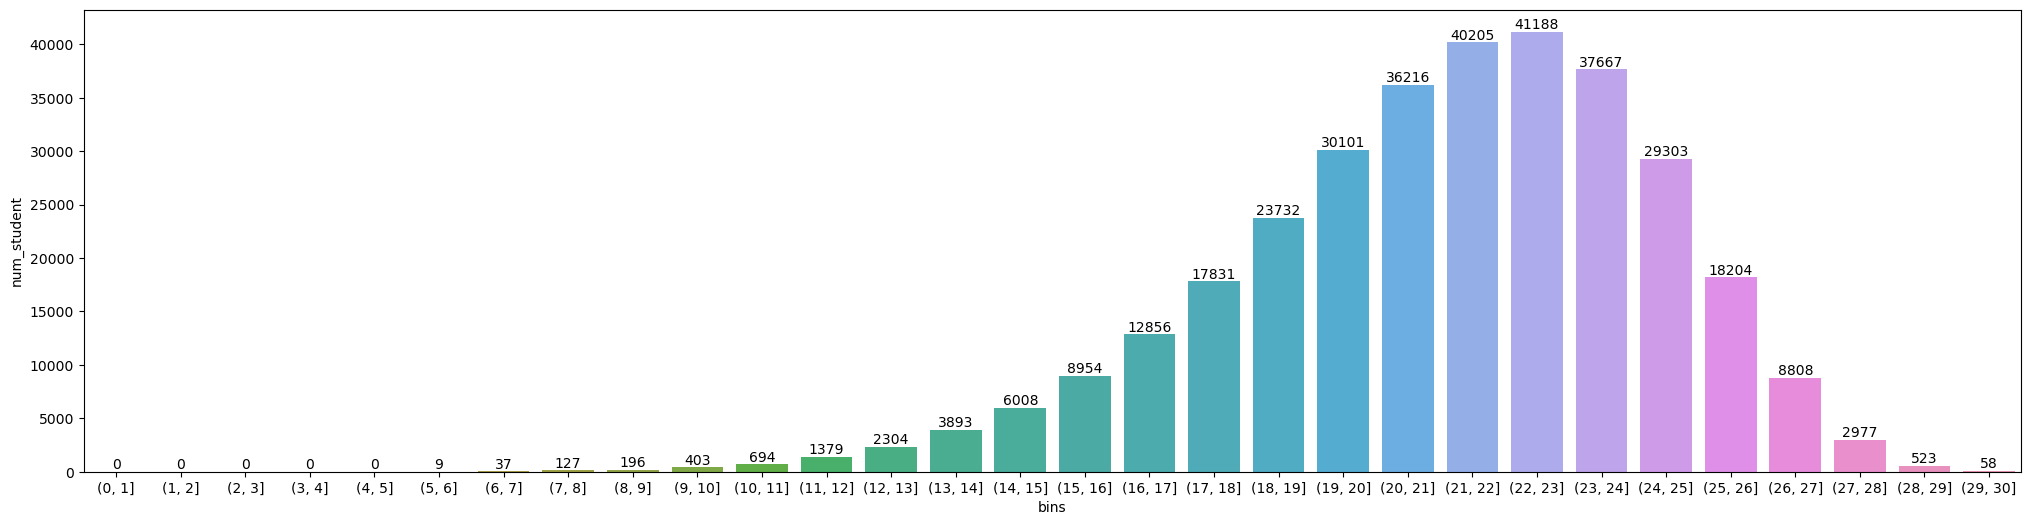

In [12]:

khoi_a_group = khoi_a.groupby(["bins"]).agg(num_student=("sbd", "count")).reset_index()
fig, ax= plt.subplots(1, 1, figsize=(25, 6))

sns.barplot(data=khoi_a_group, x="bins", y="num_student", ax=ax)
ax.bar_label(ax.containers[0])
khoi_a_group

In [42]:
province = diemthi["ma_tinh"].unique()

In [43]:
province

array(['10', '20', '30', '40', '50', '60', '70', '80', '90', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '51', '52', '53', '54', '55', '56', '57', '58', '59', '61',
       '62', '63', '64'], dtype=object)

/var/folders/gt/0d0rqfrx3_q_dk7kdq70pr180000gn/T/ipykernel_28776/904714191.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax= plt.subplots(1, 1, figsize=(25, 6))


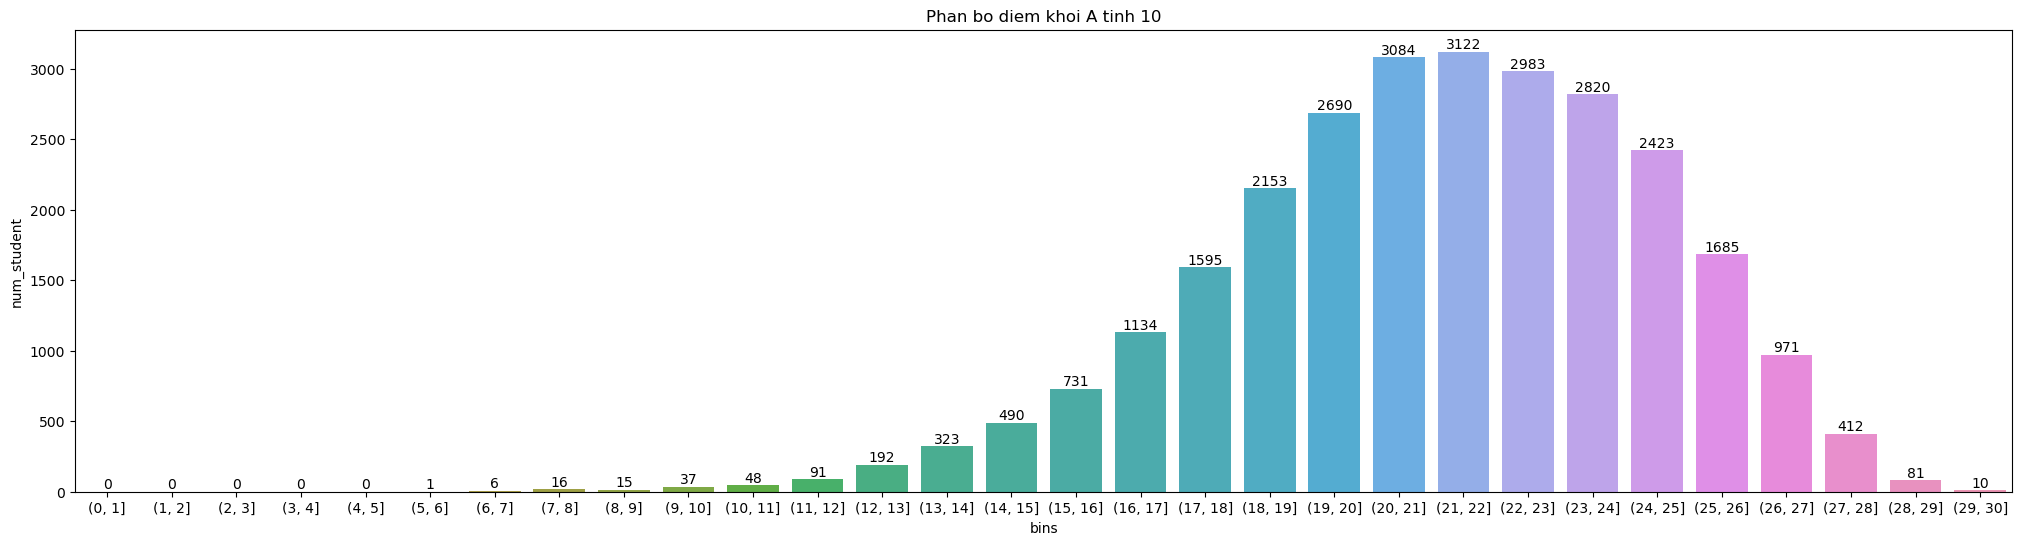

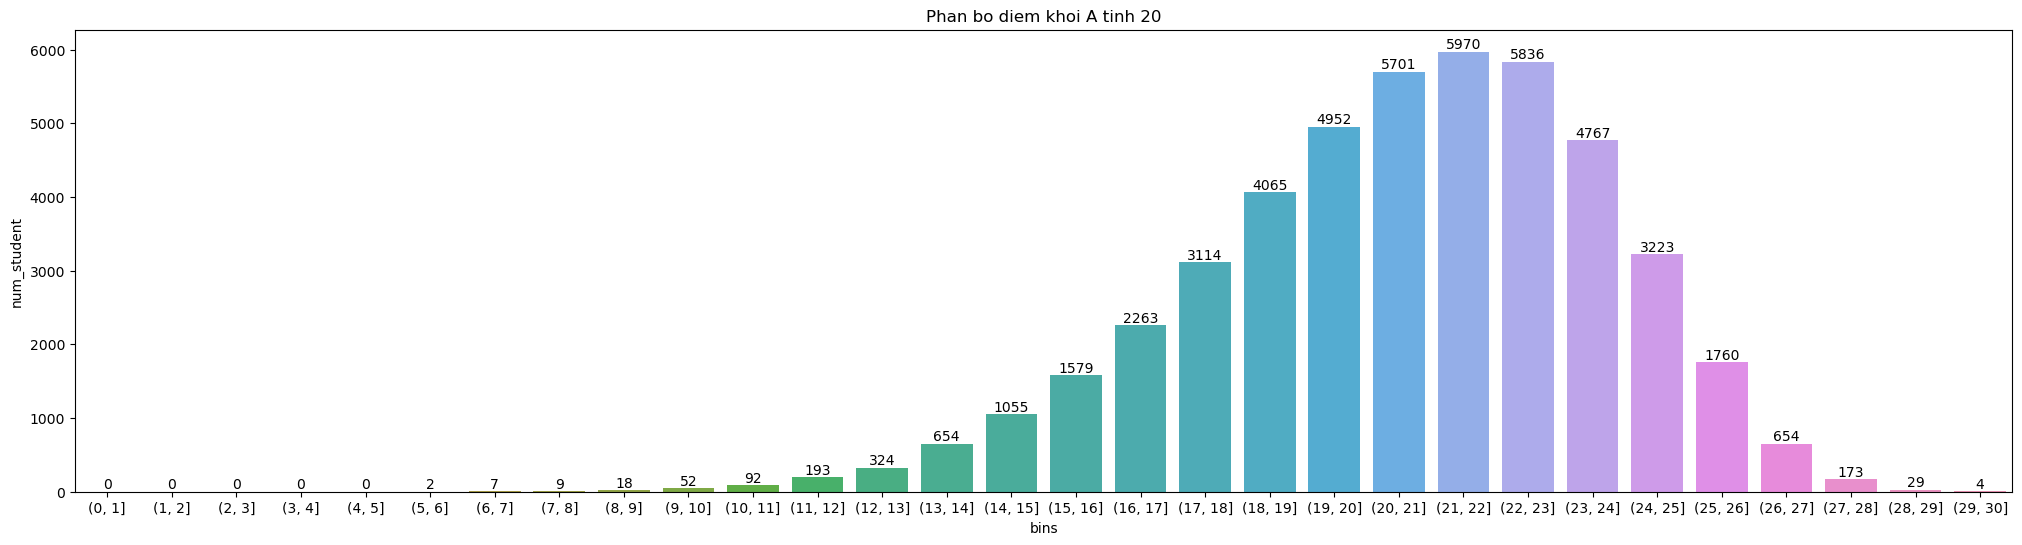

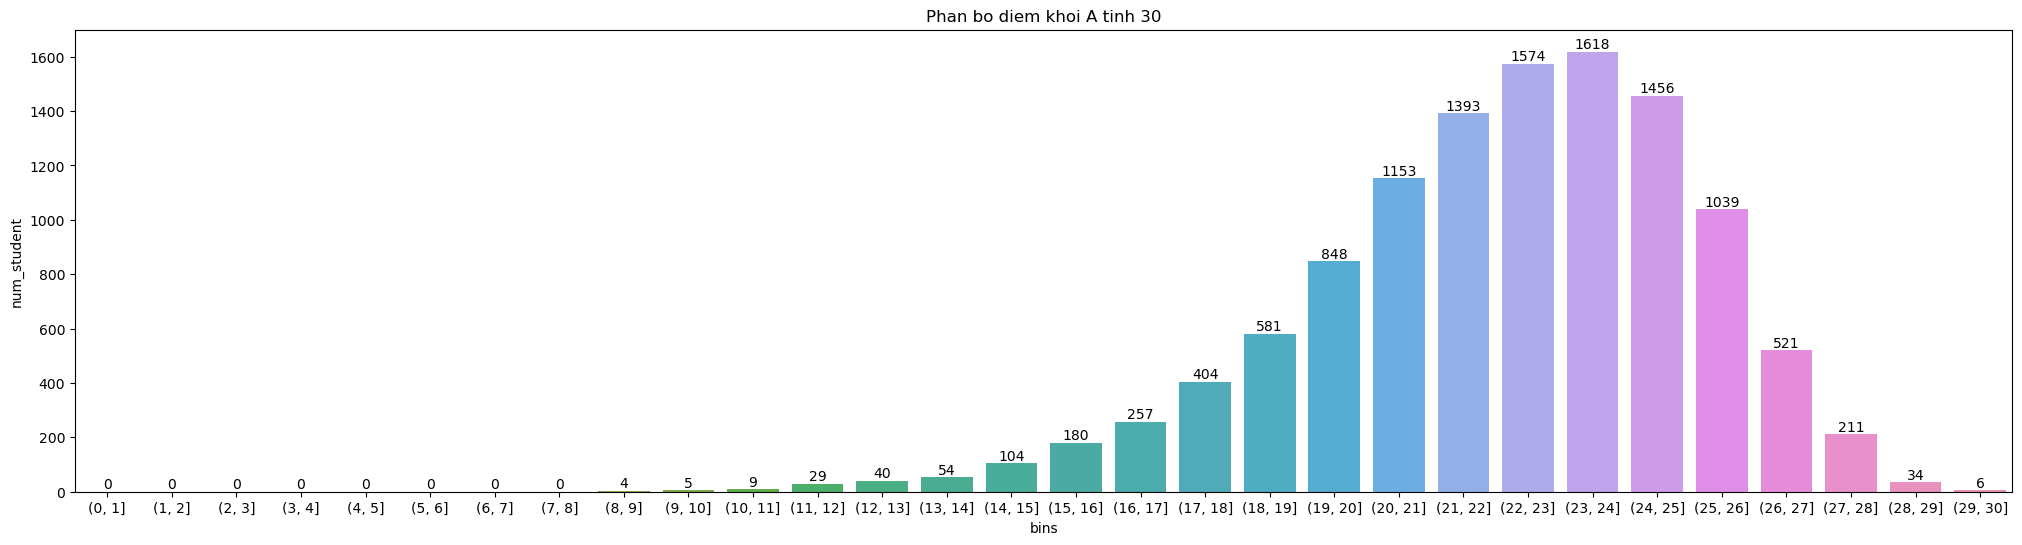

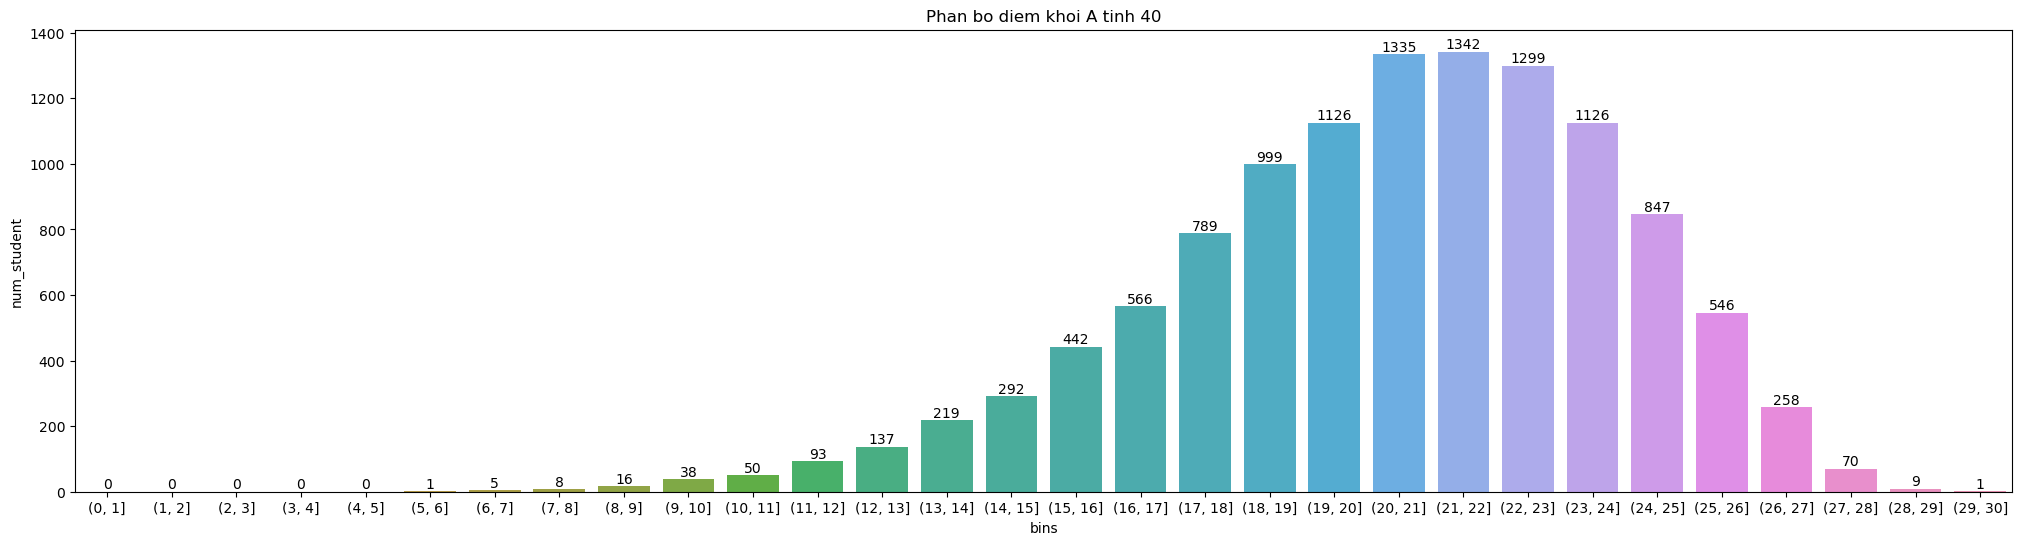

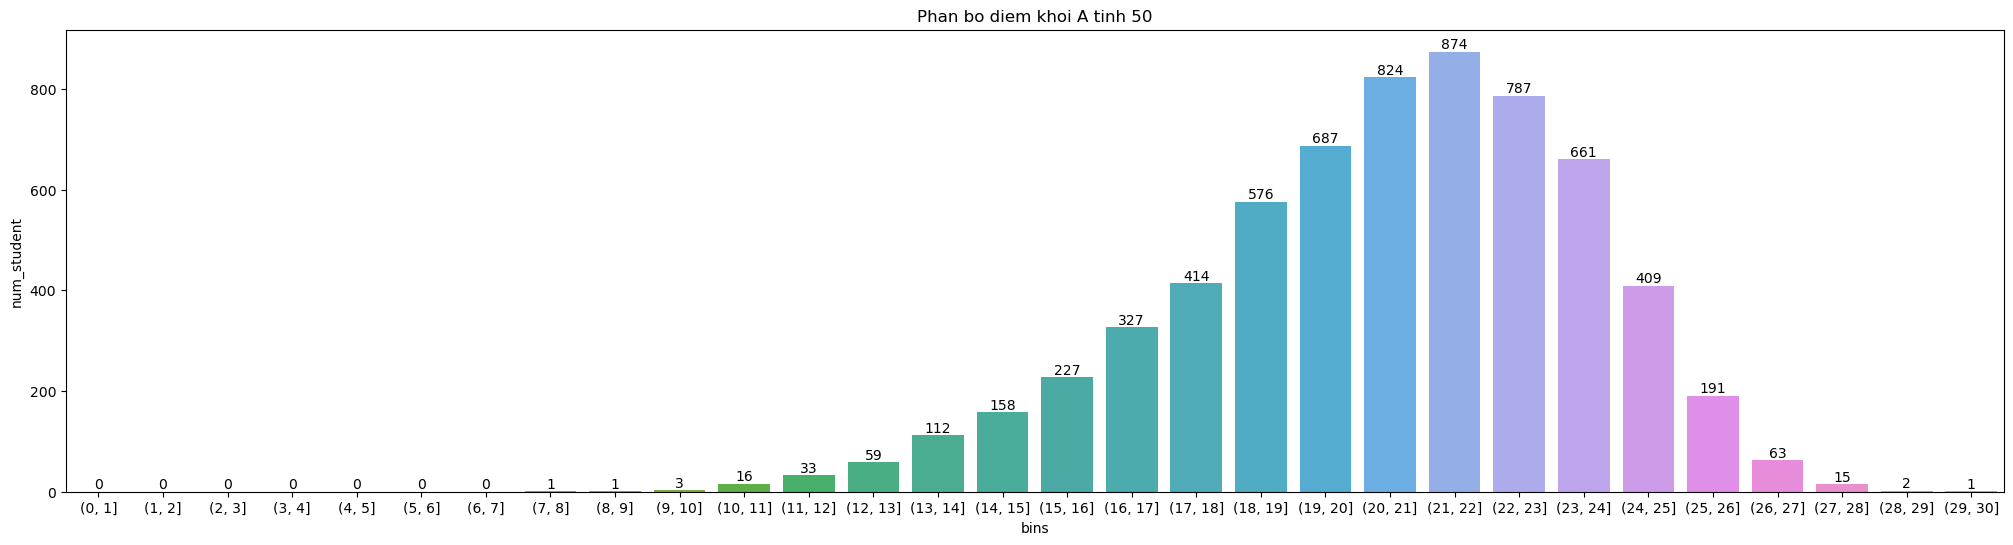

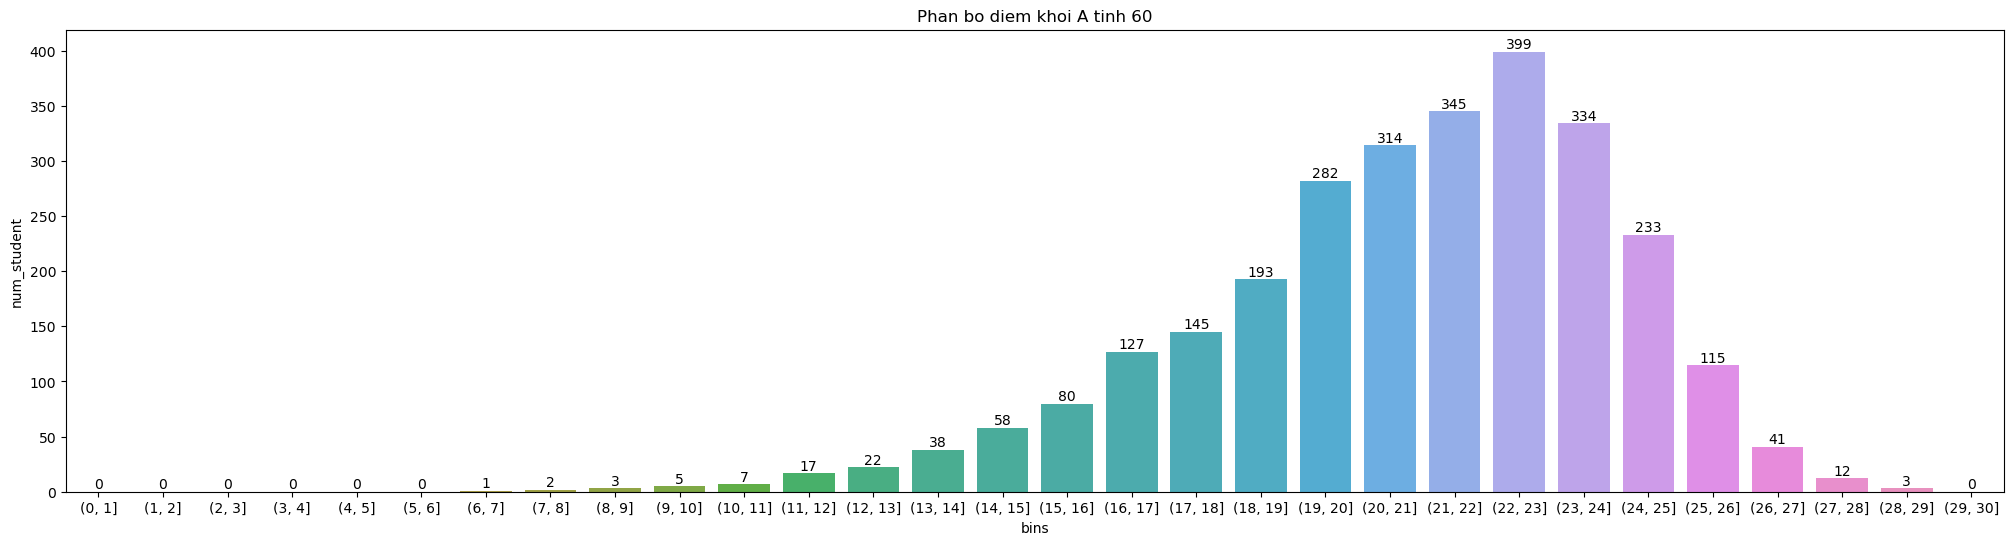

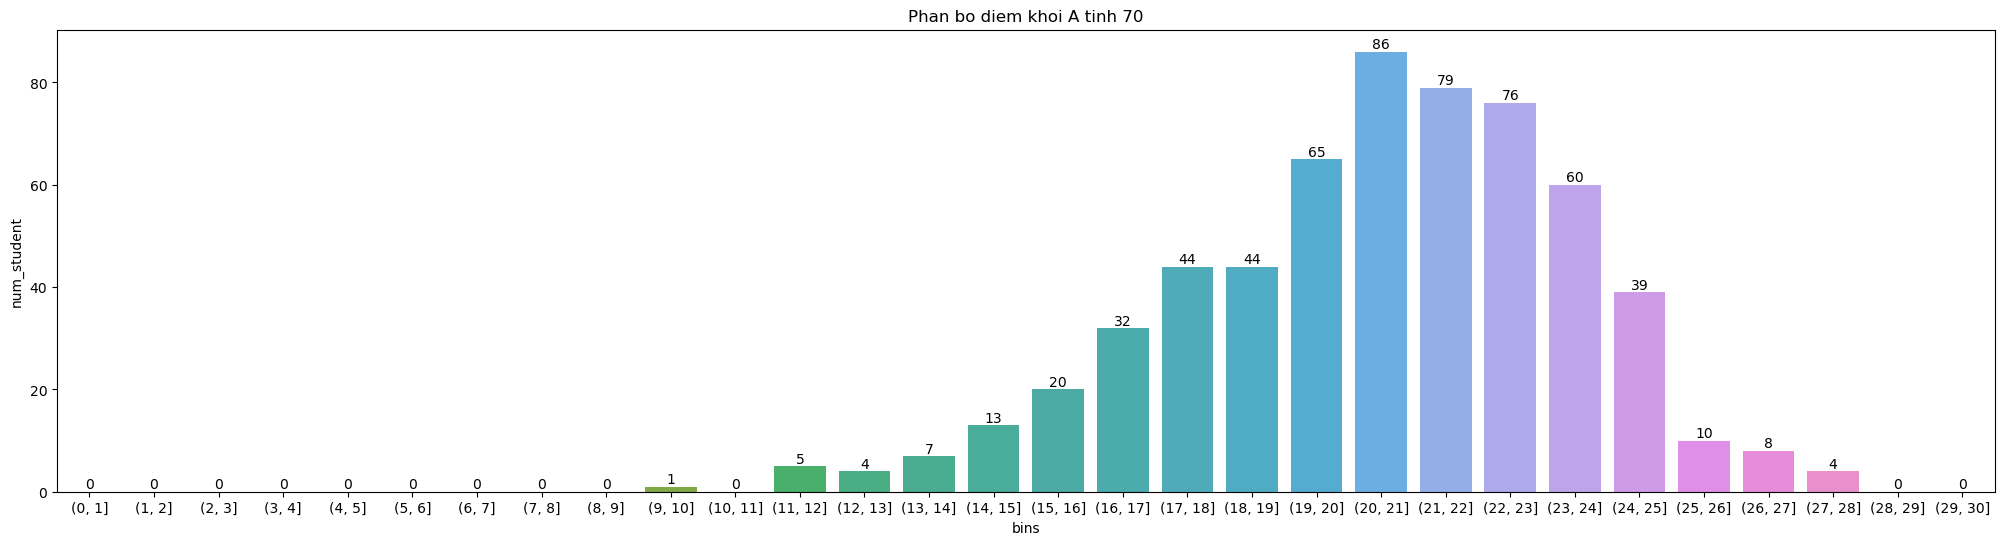

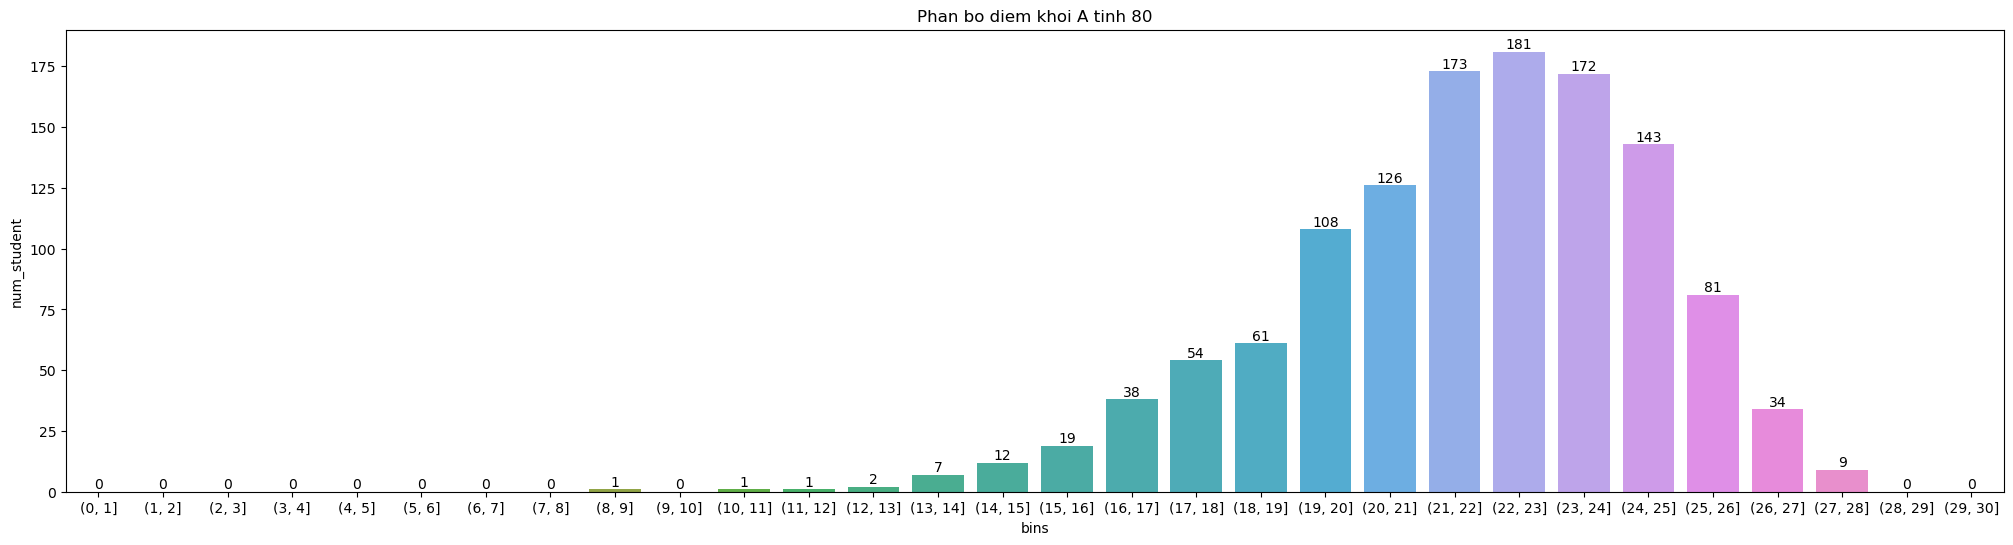

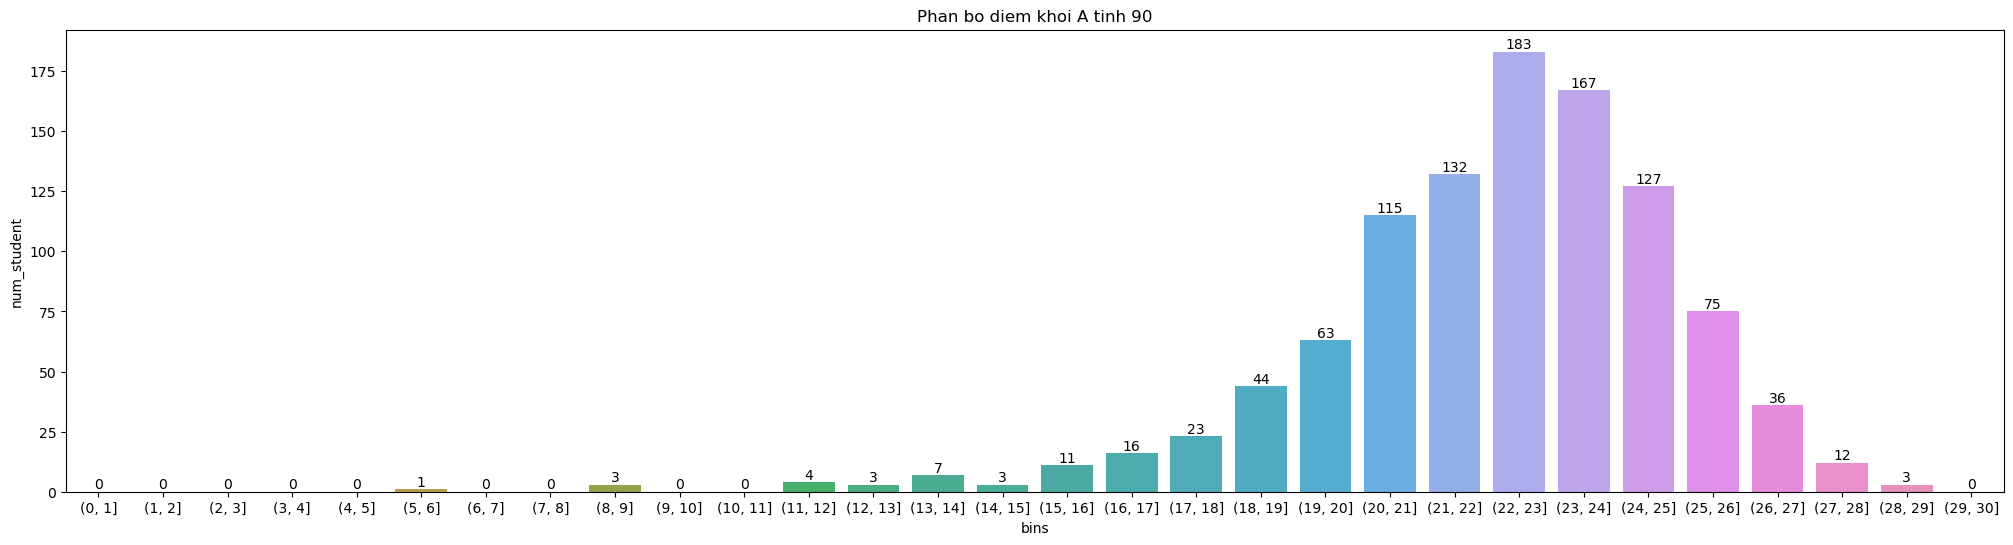

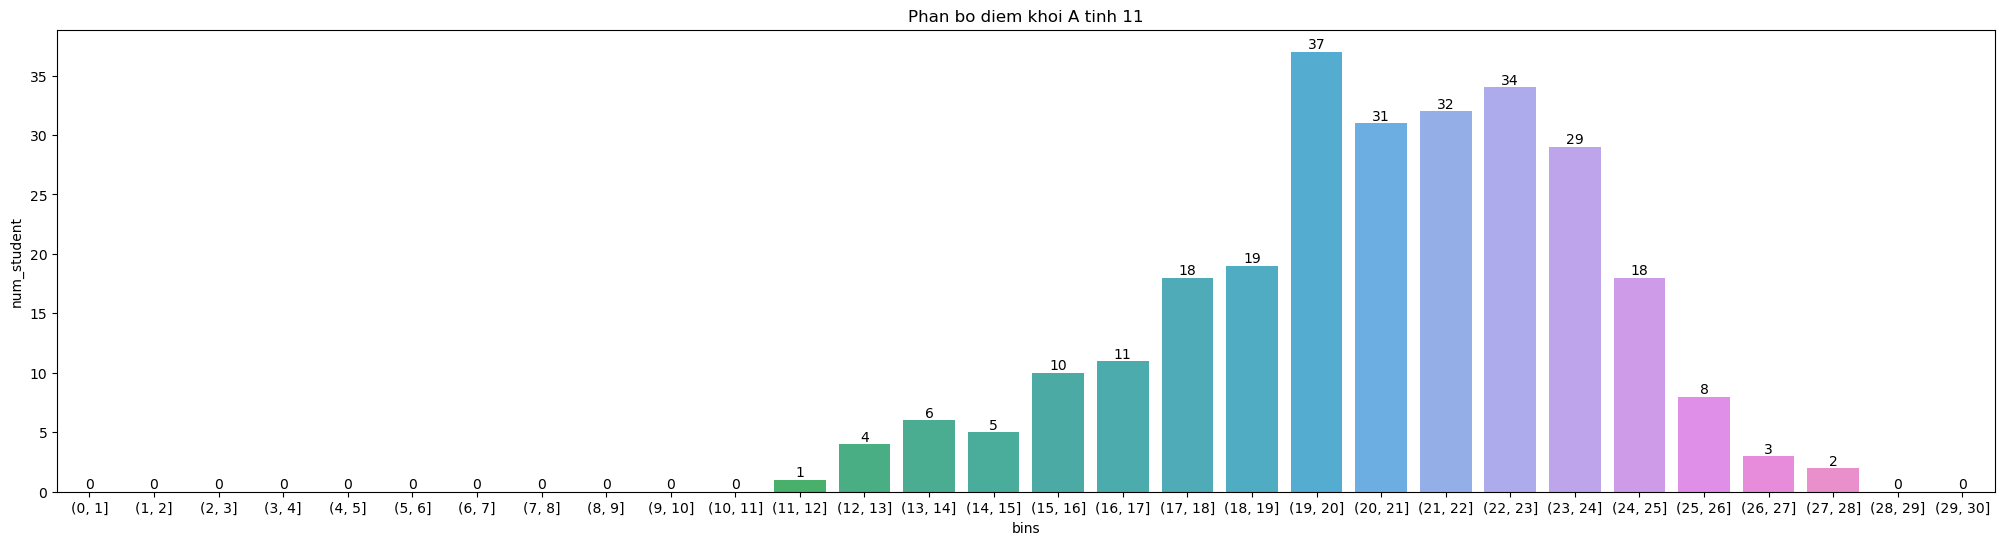

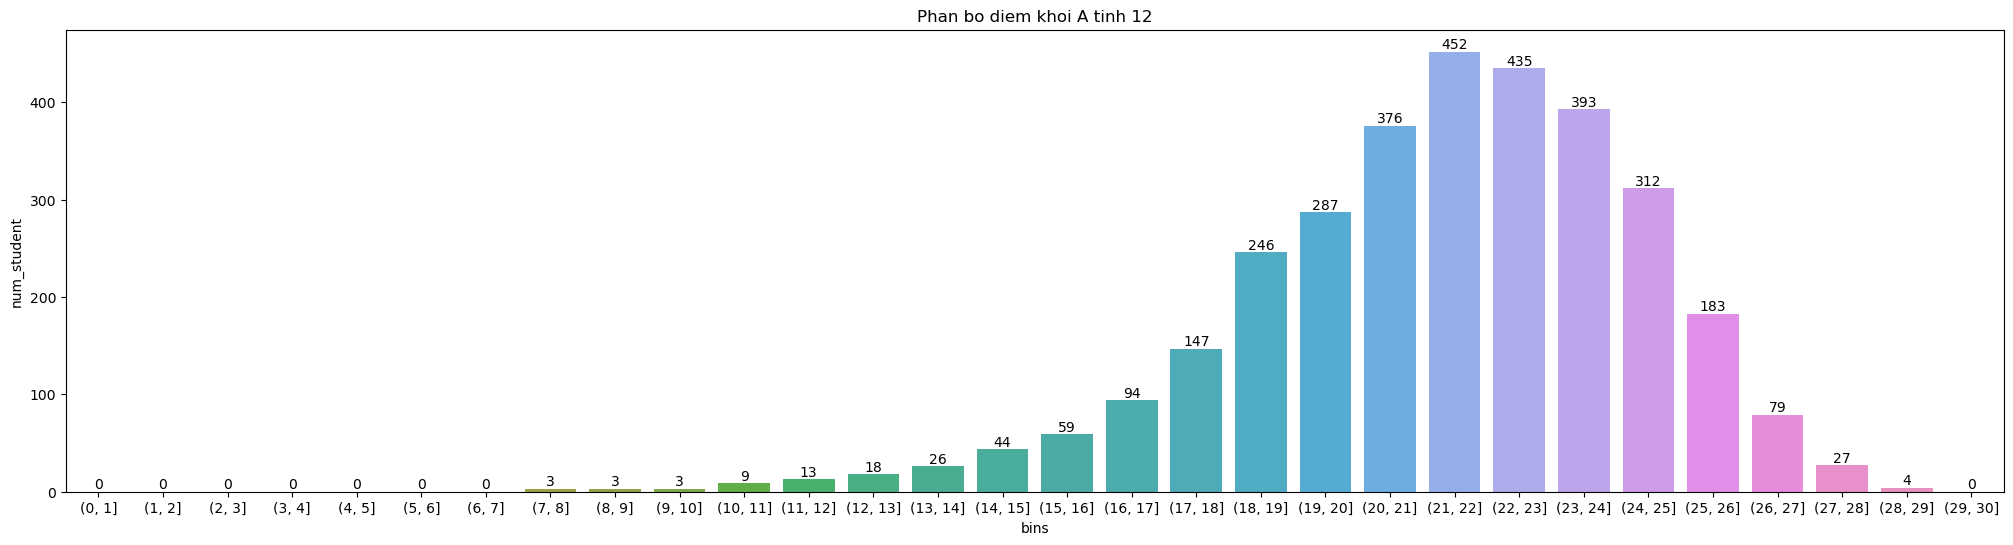

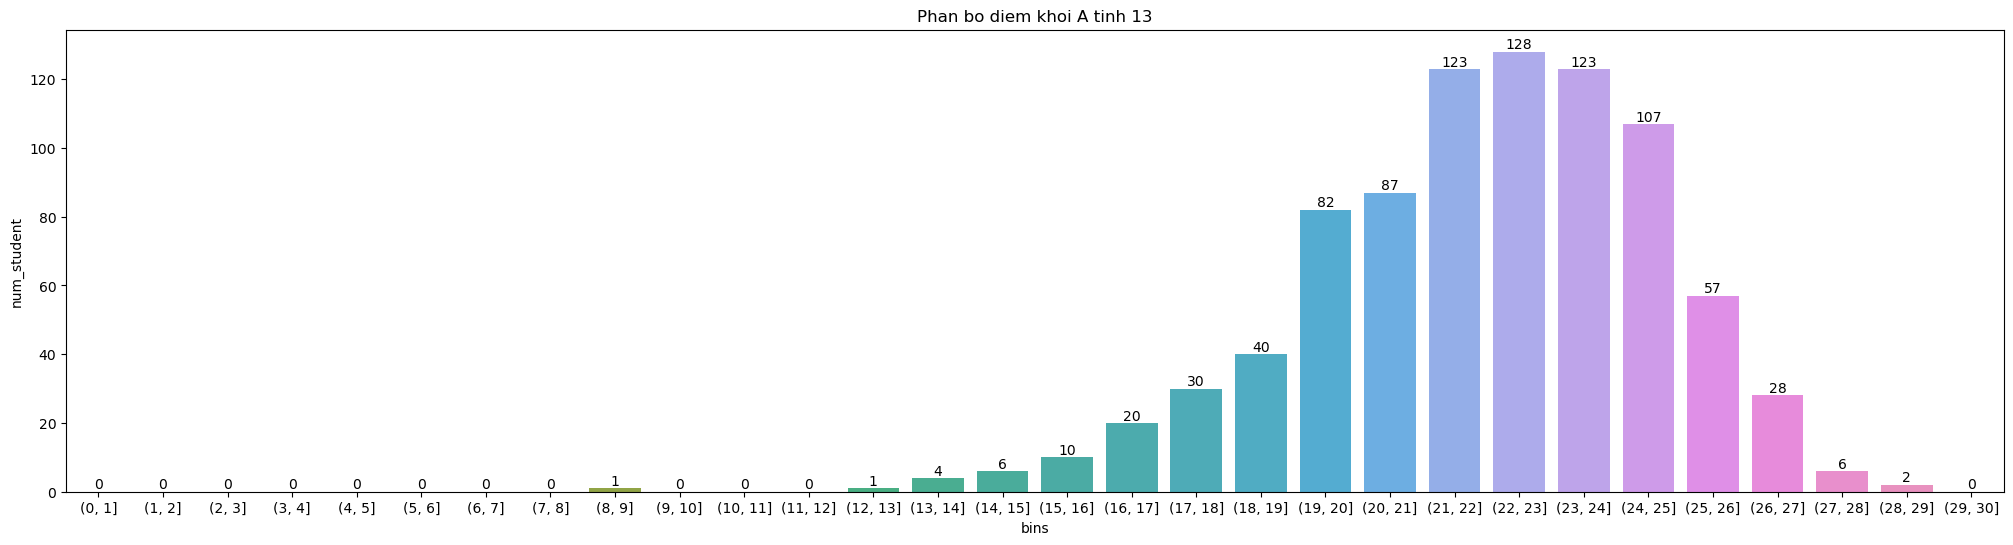

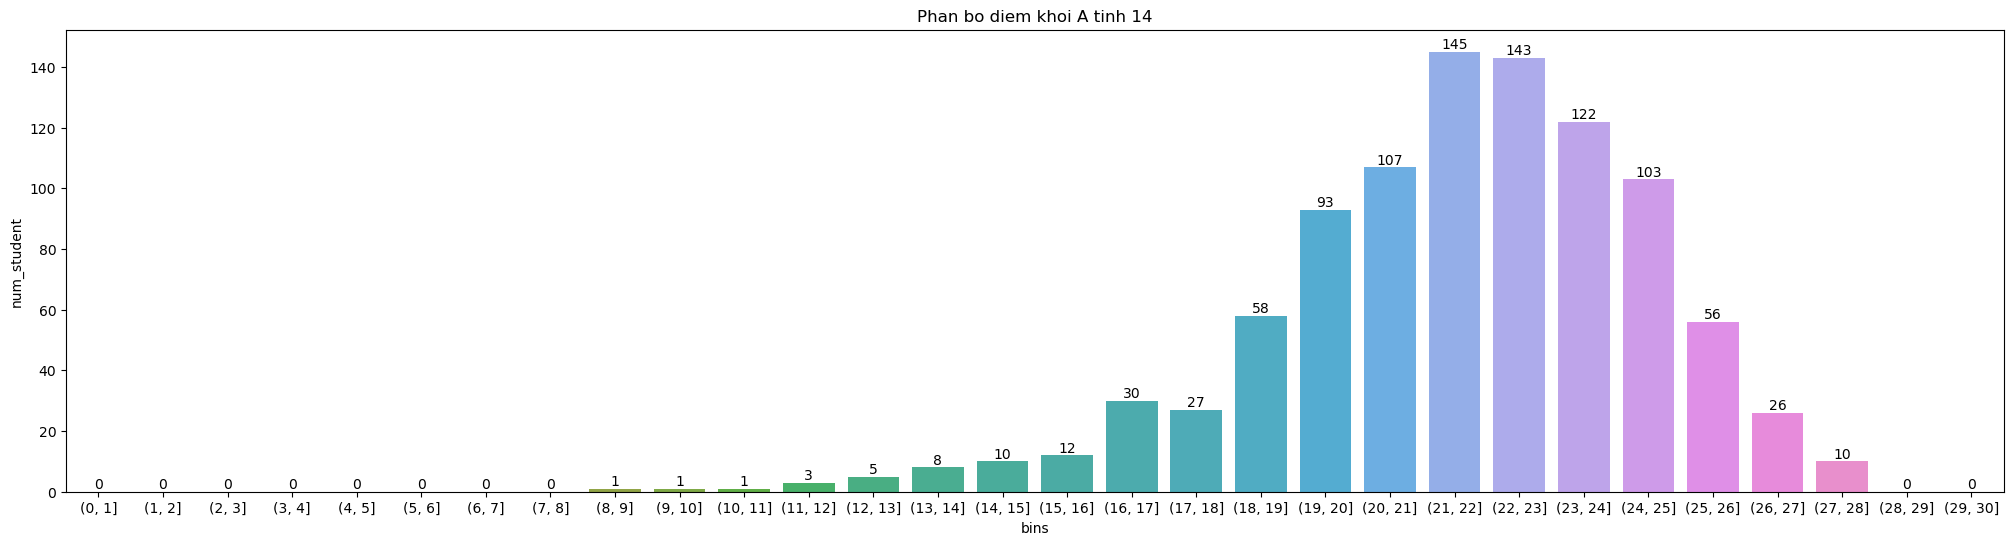

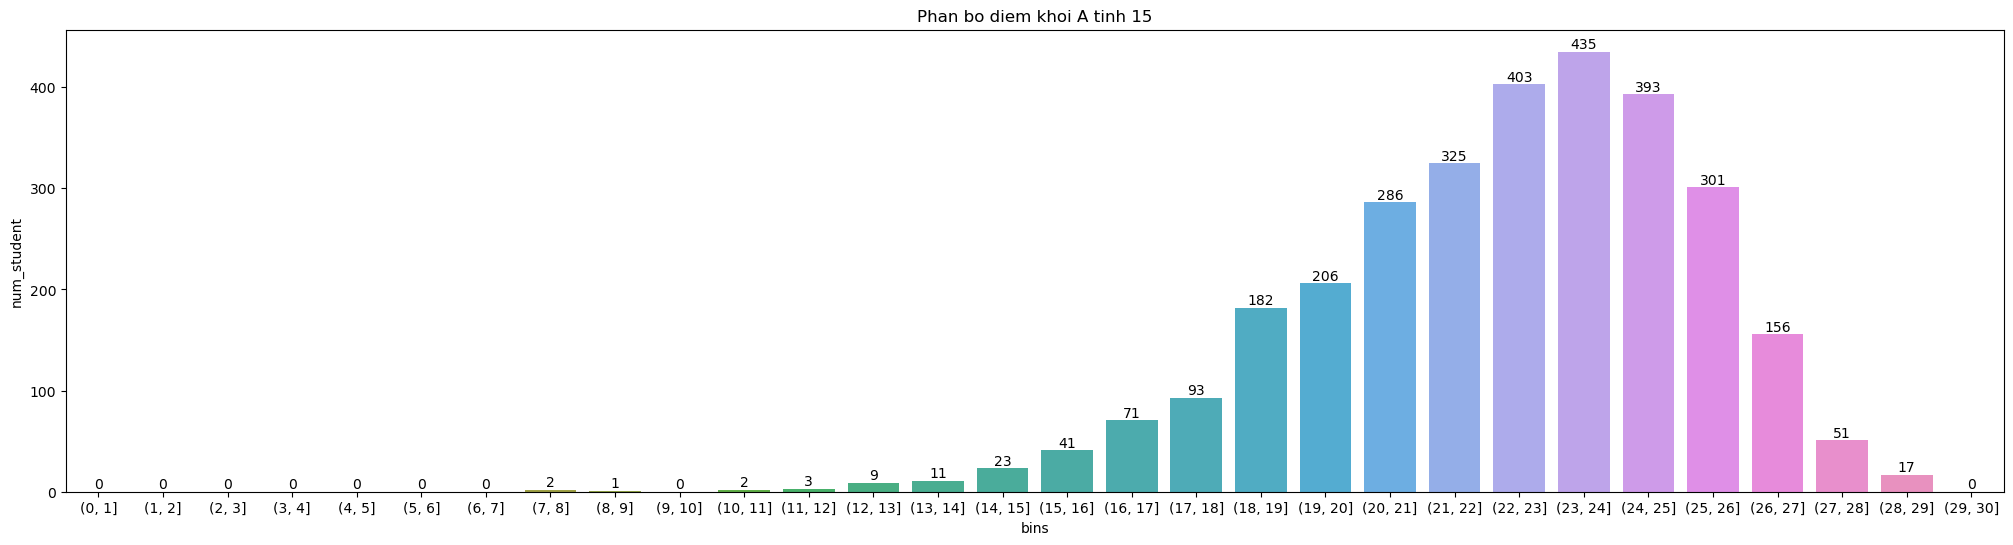

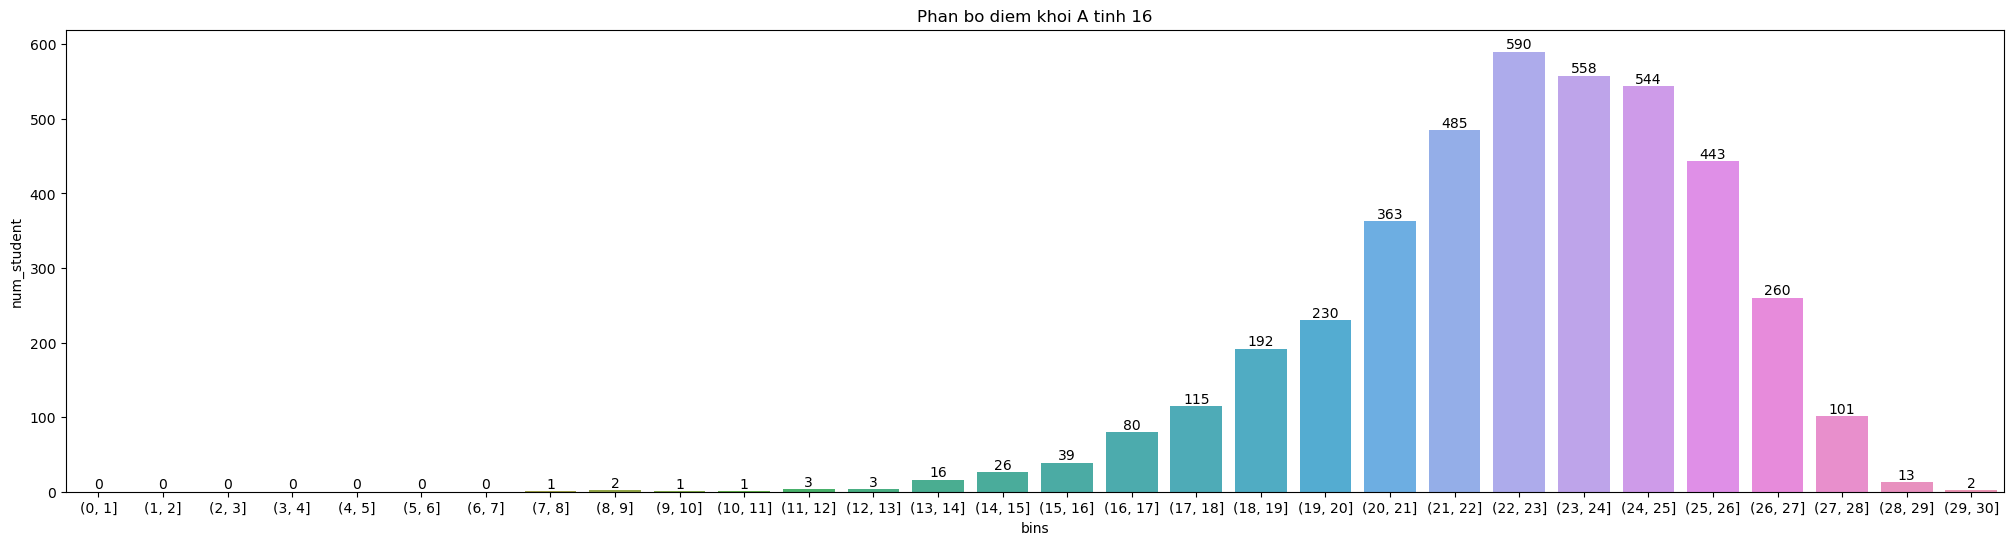

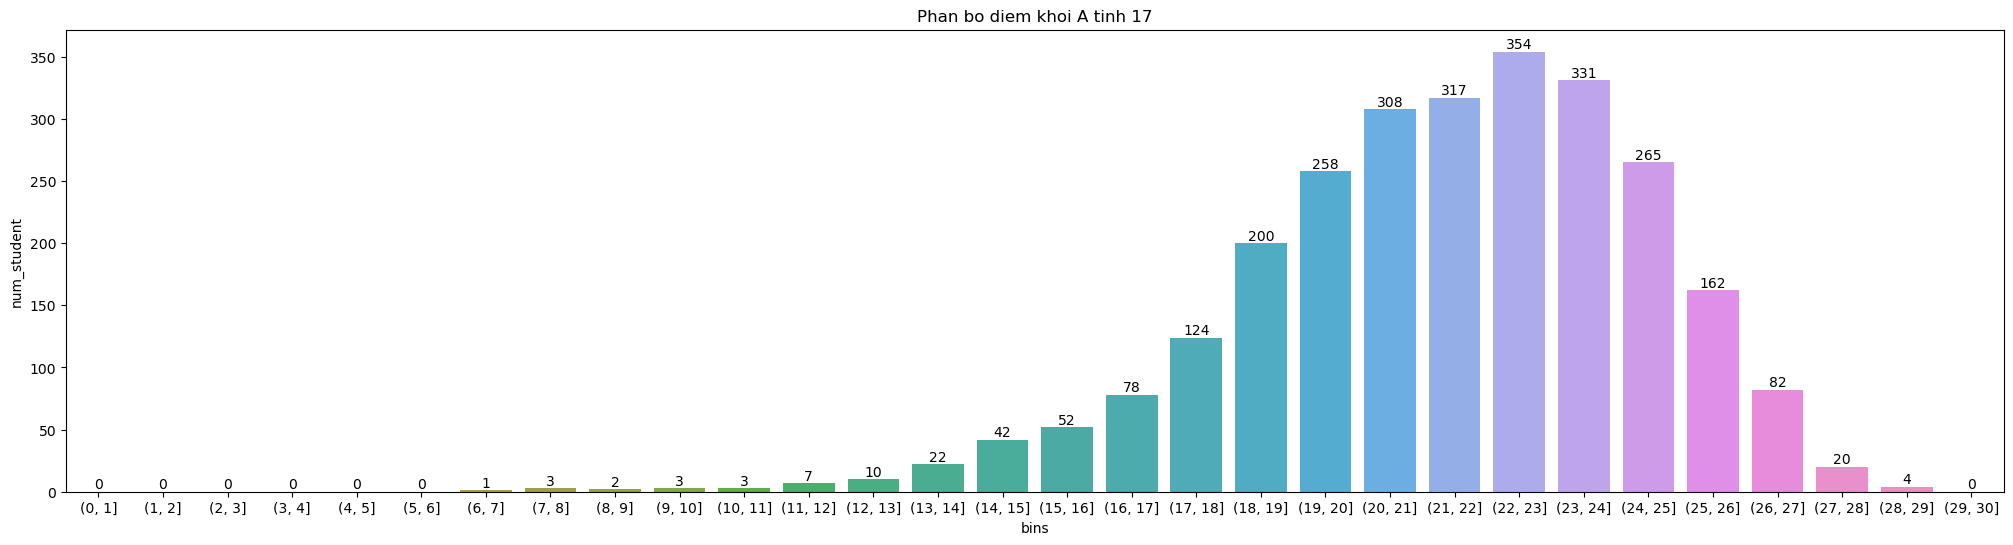

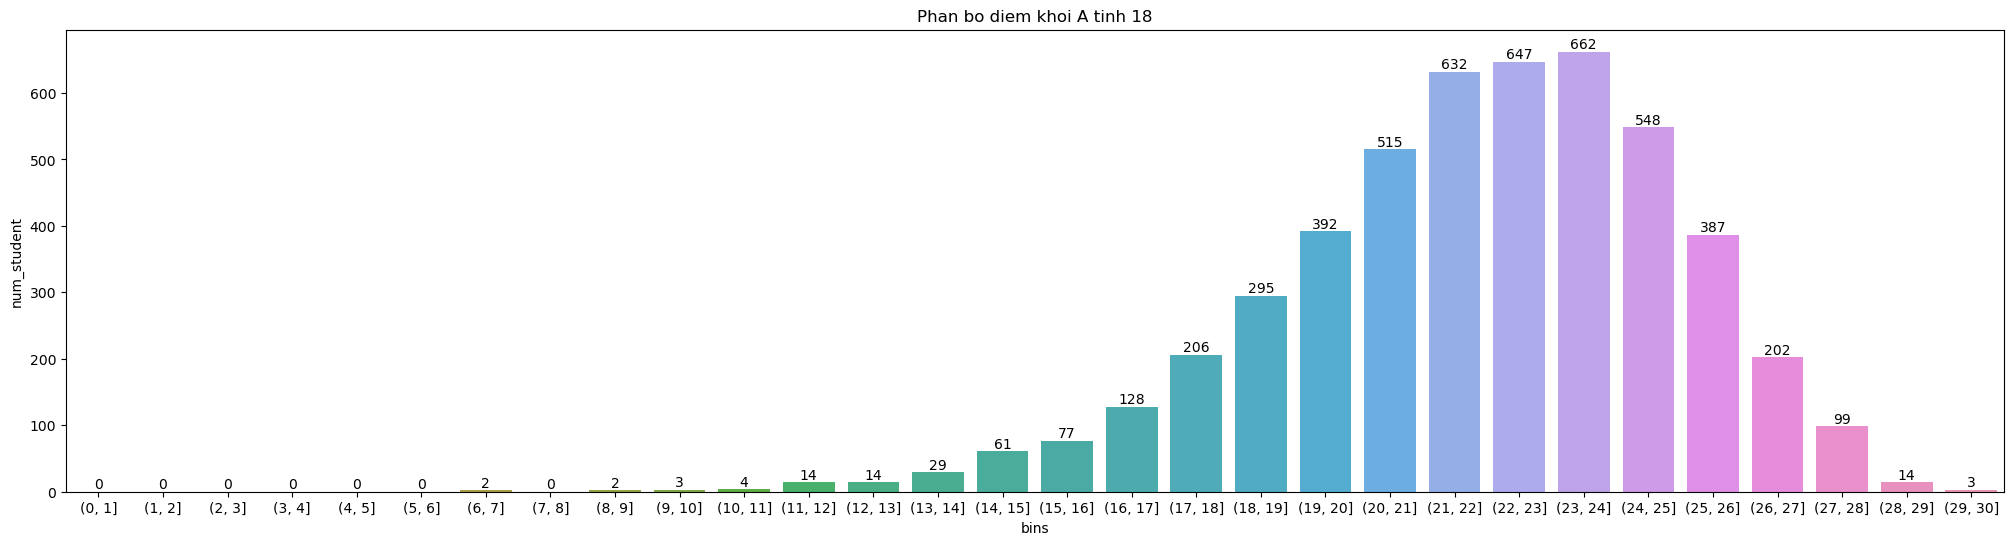

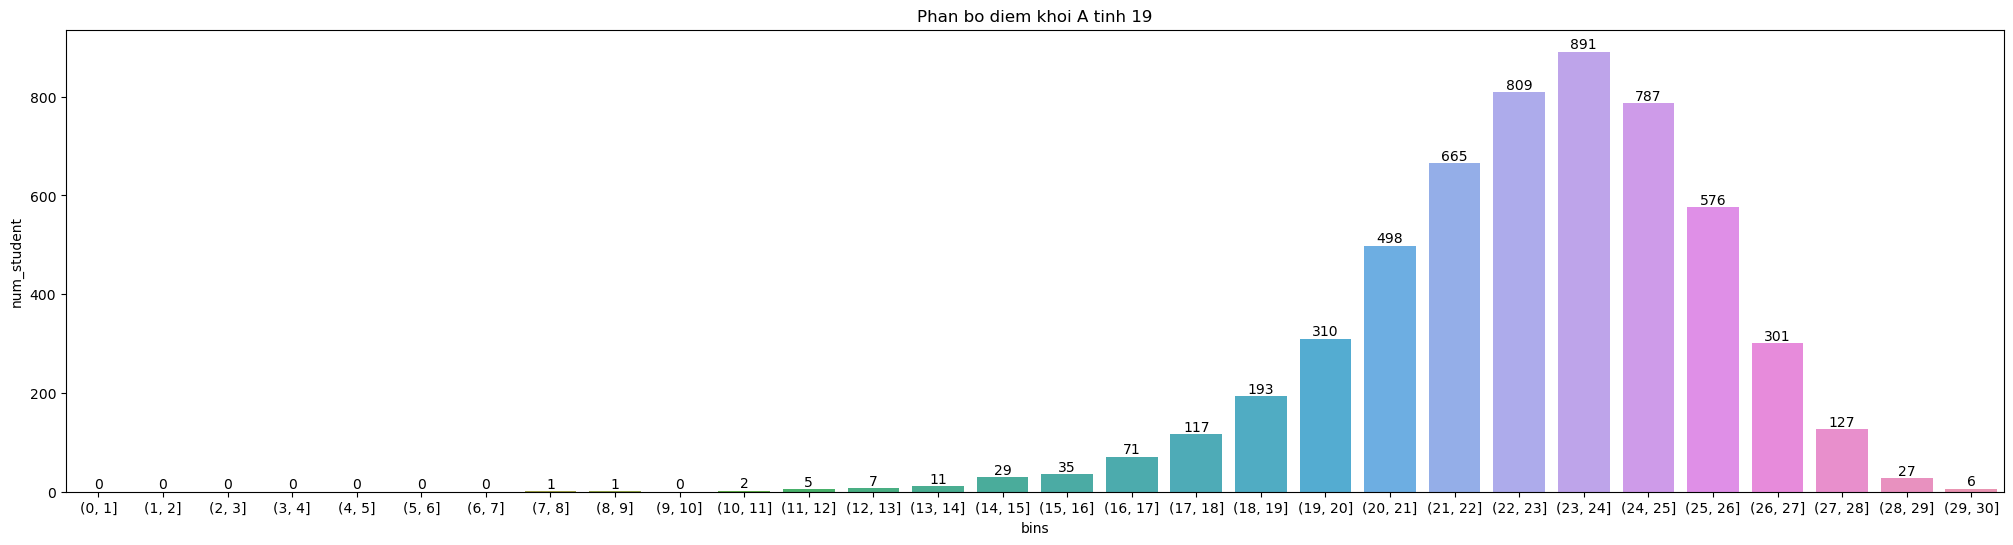

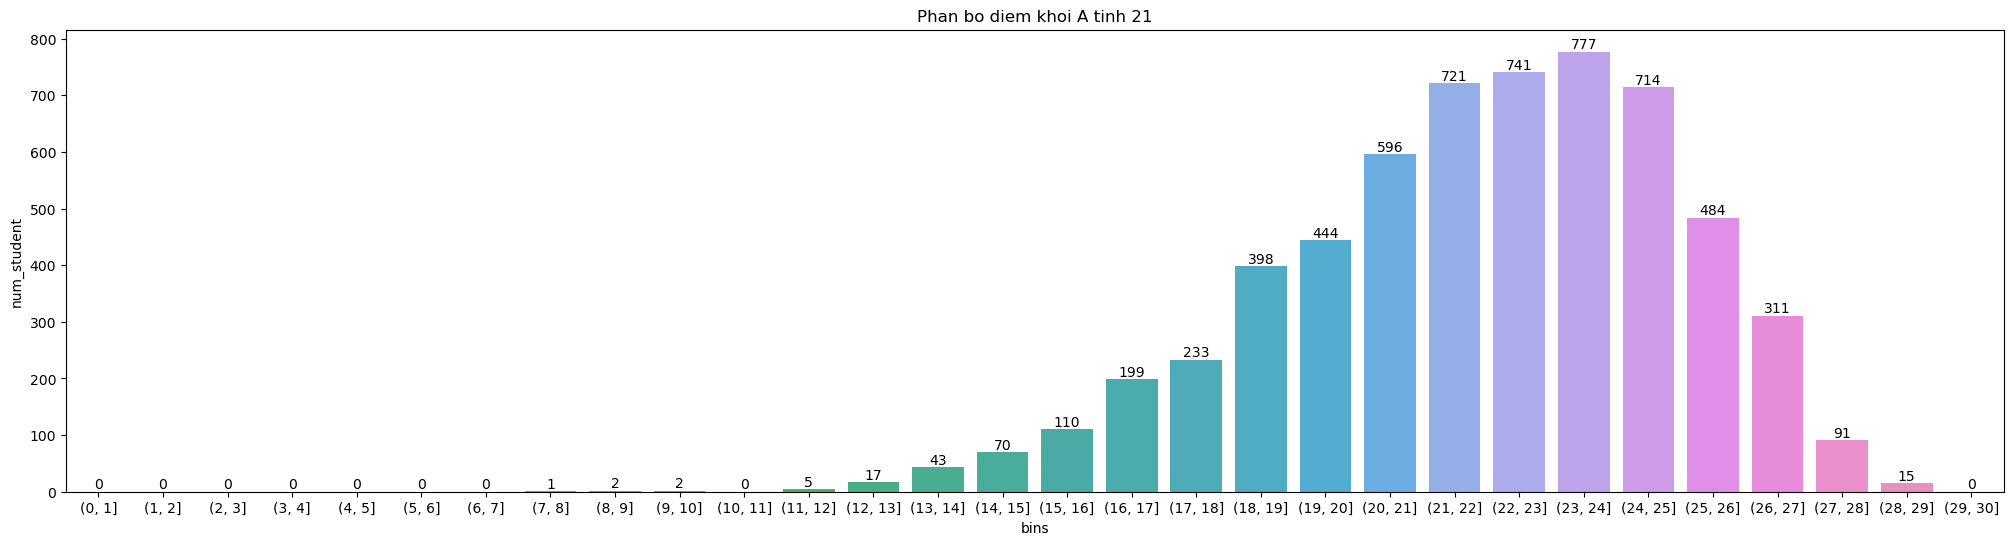

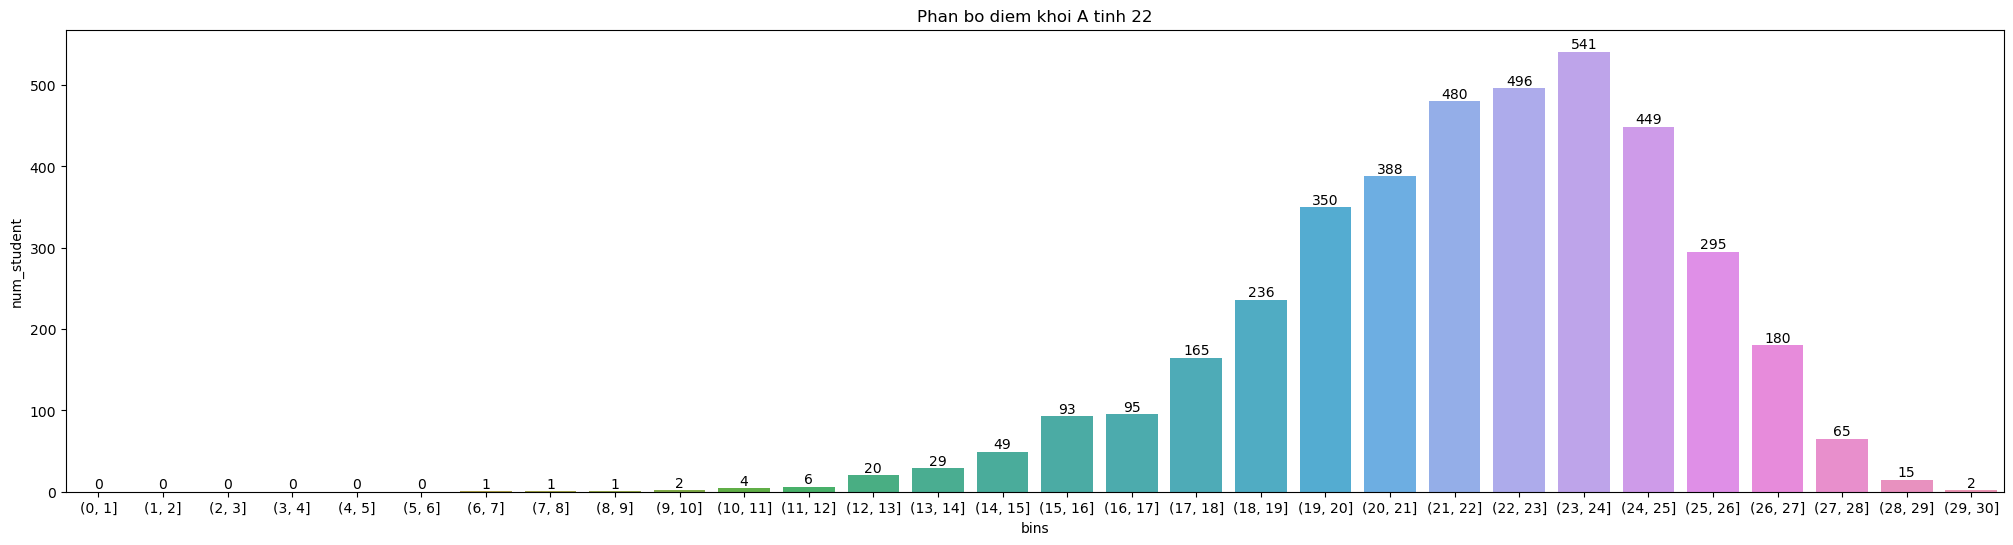

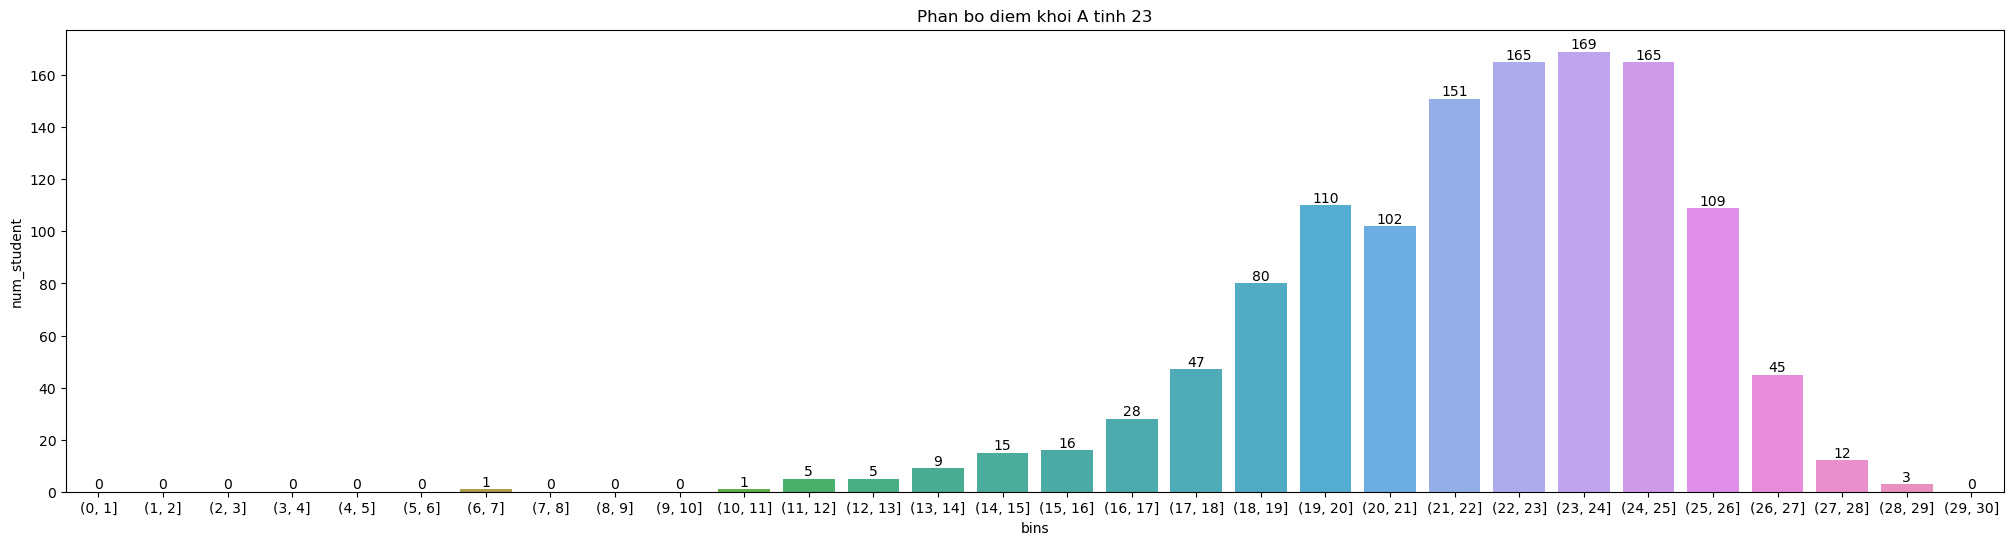

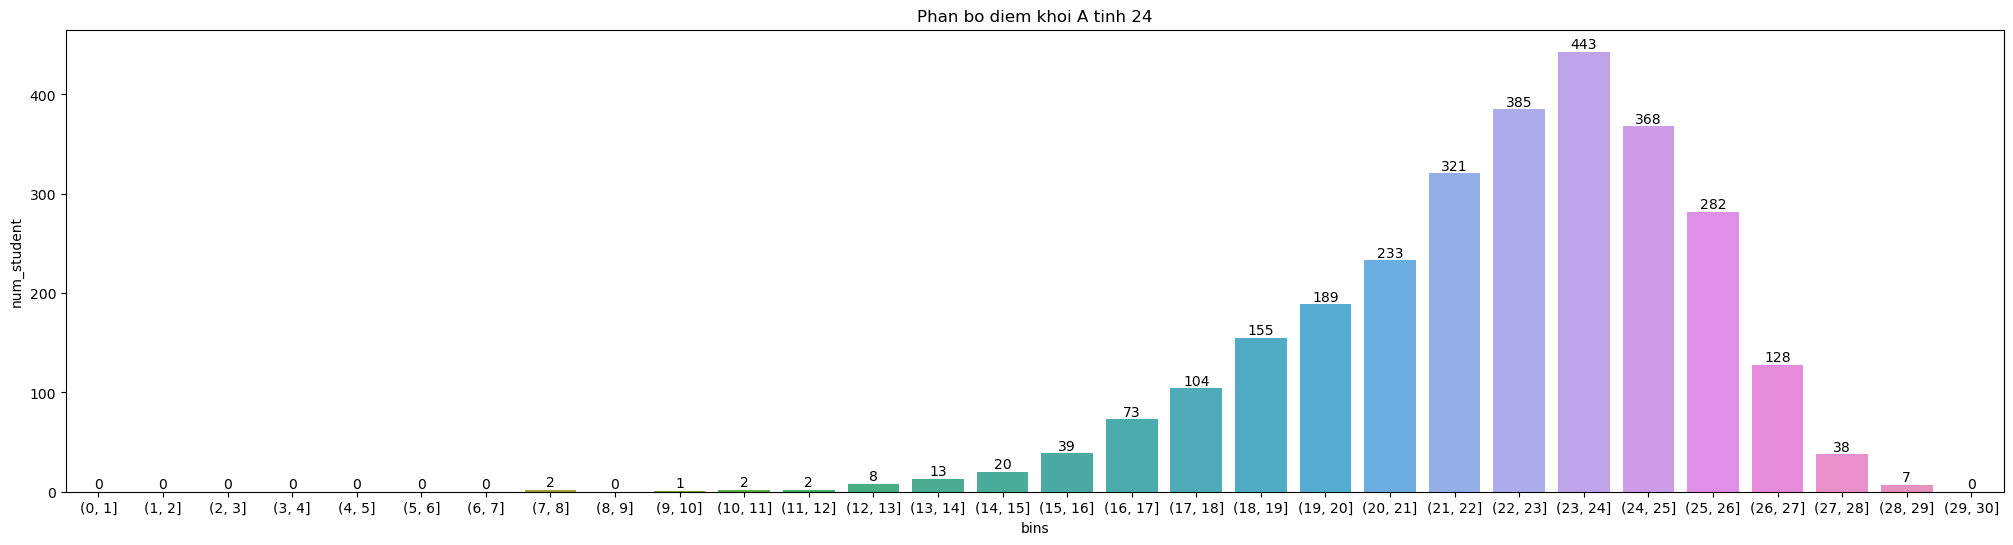

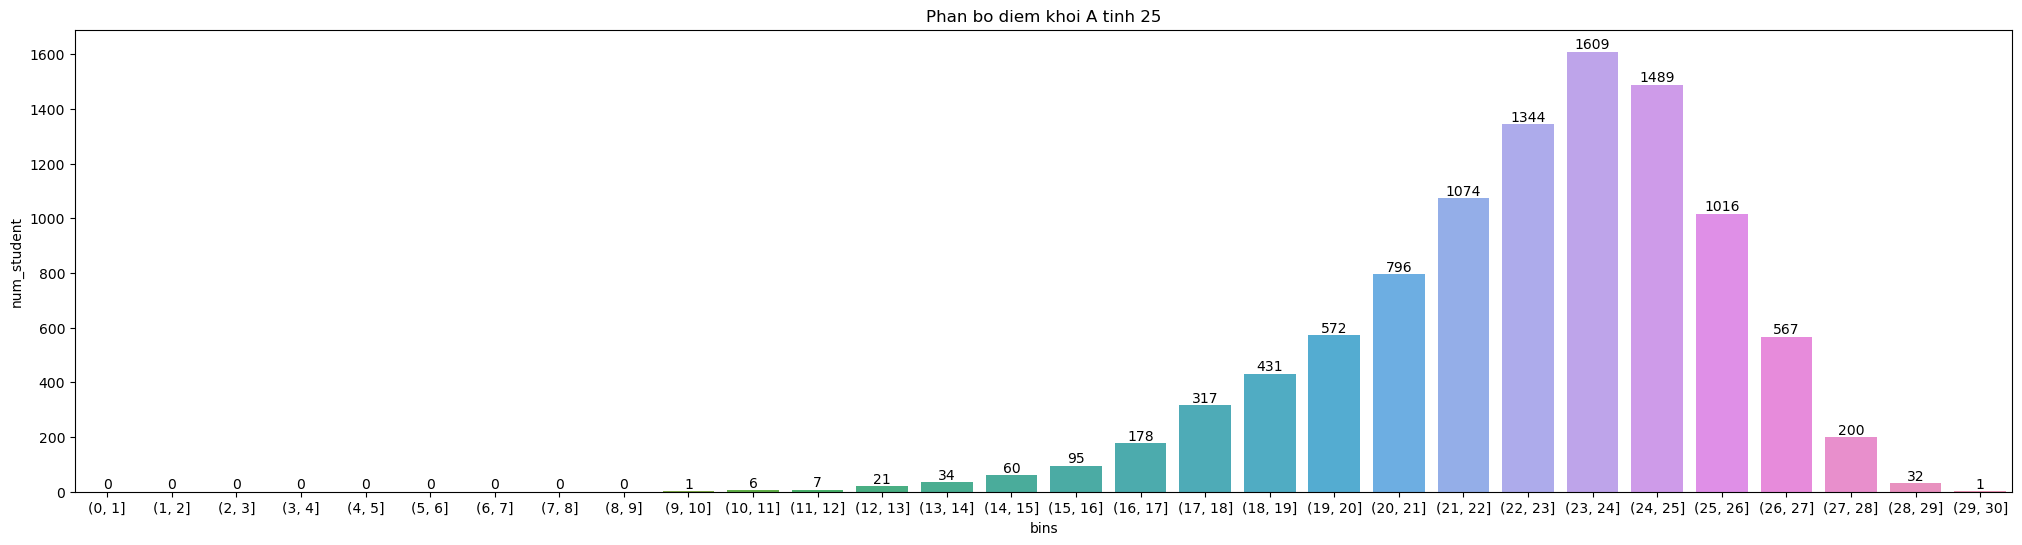

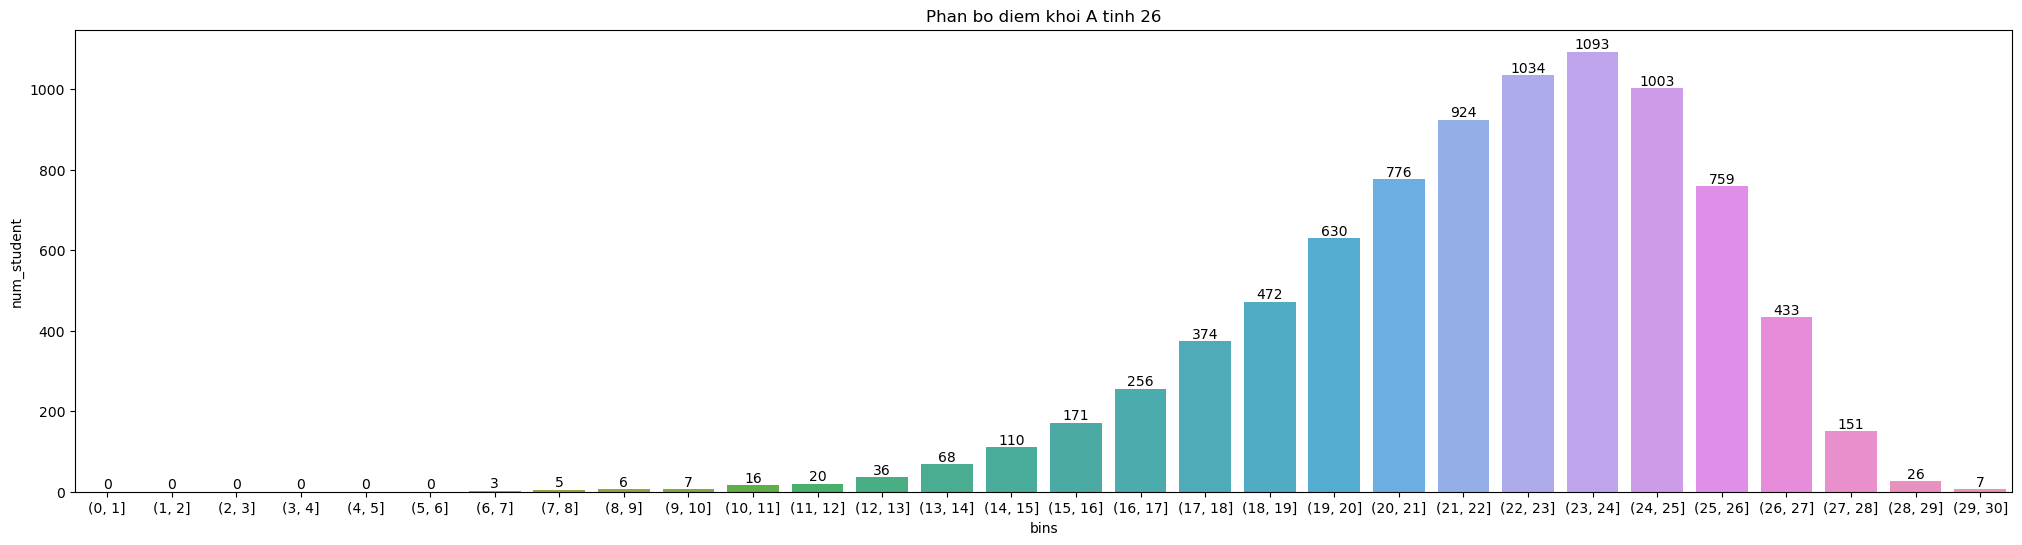

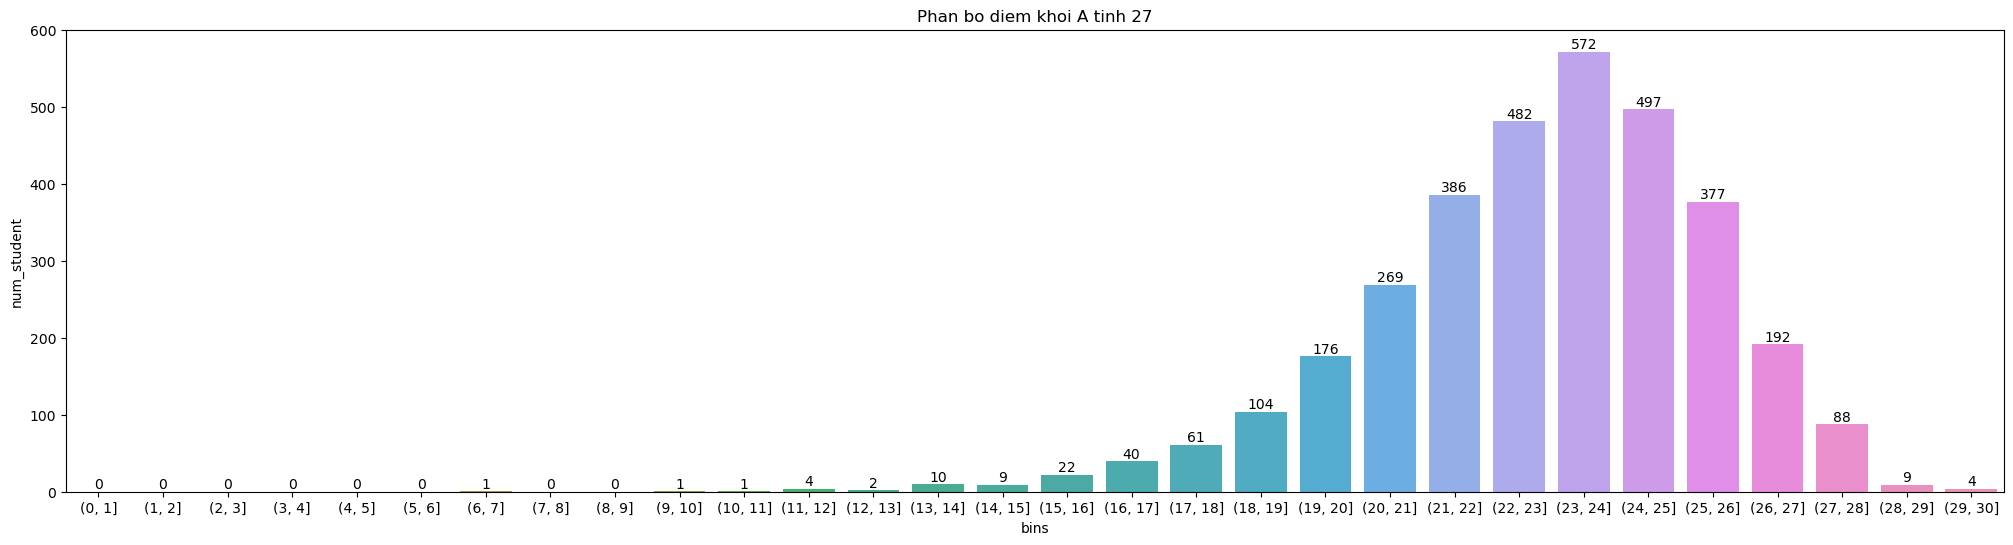

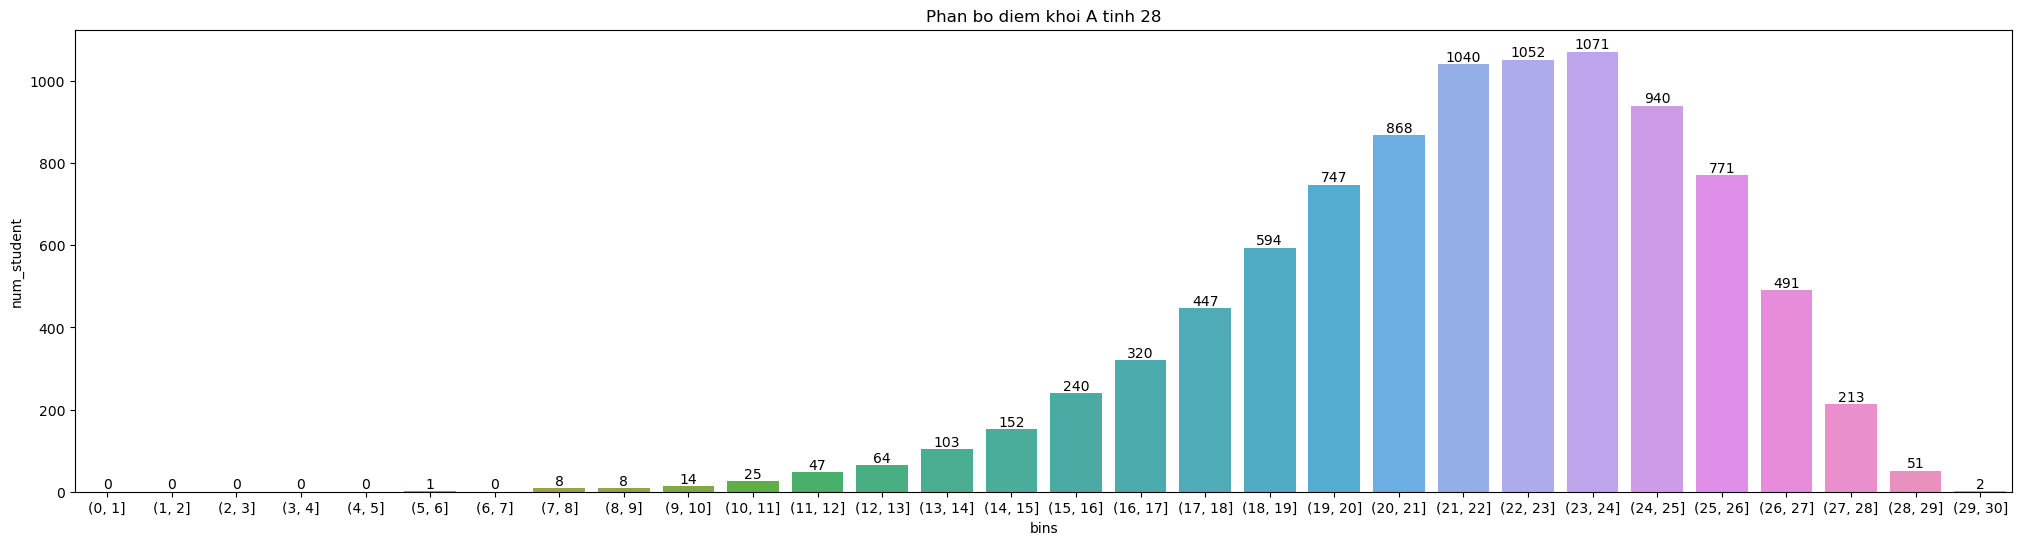

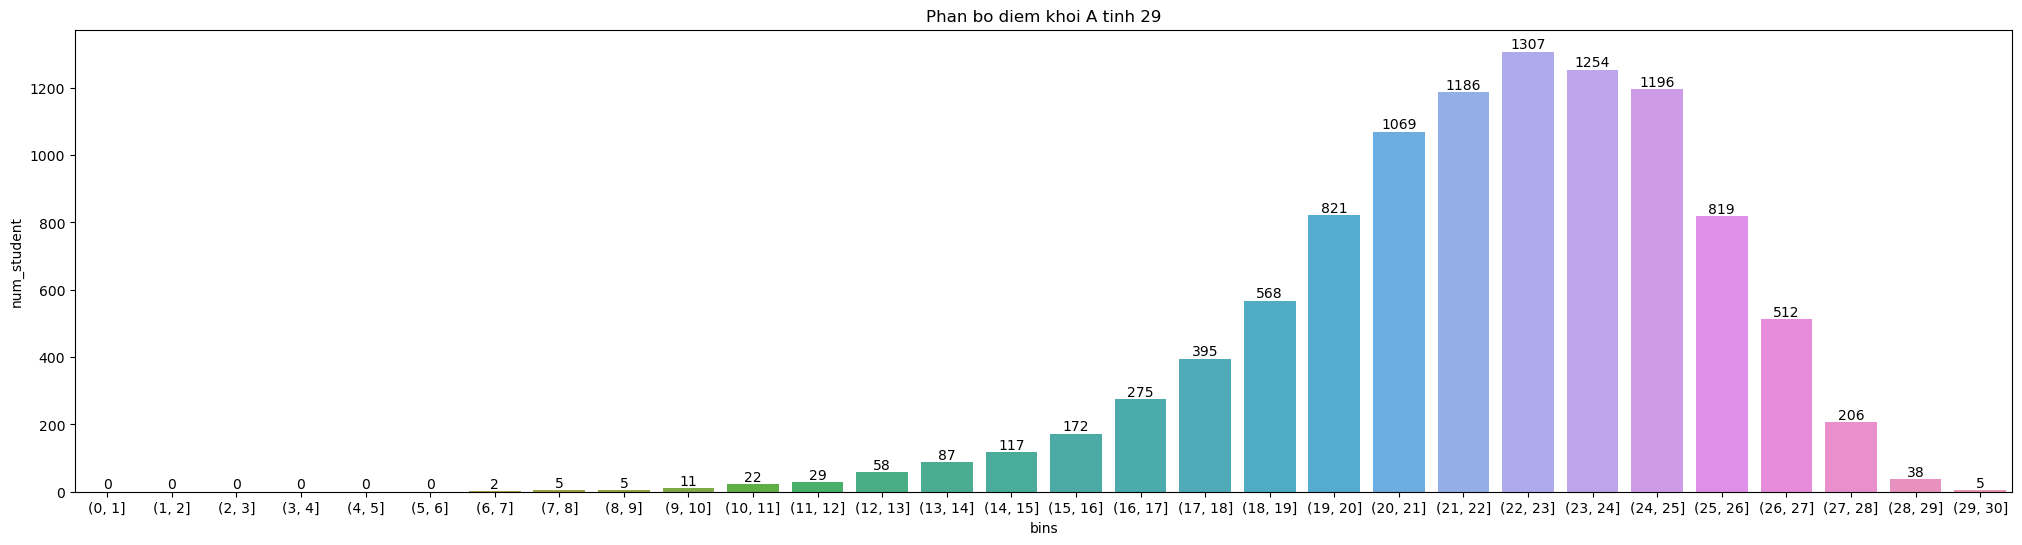

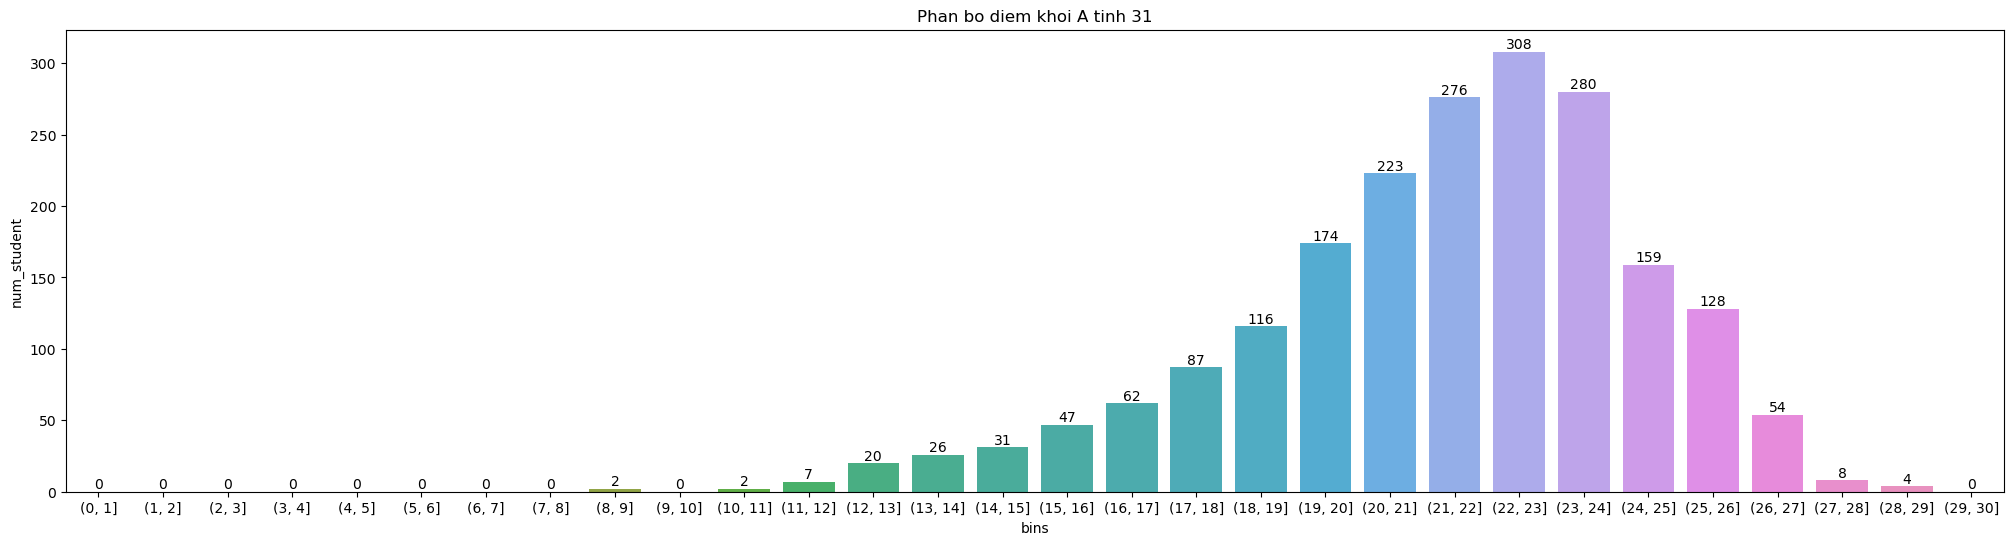

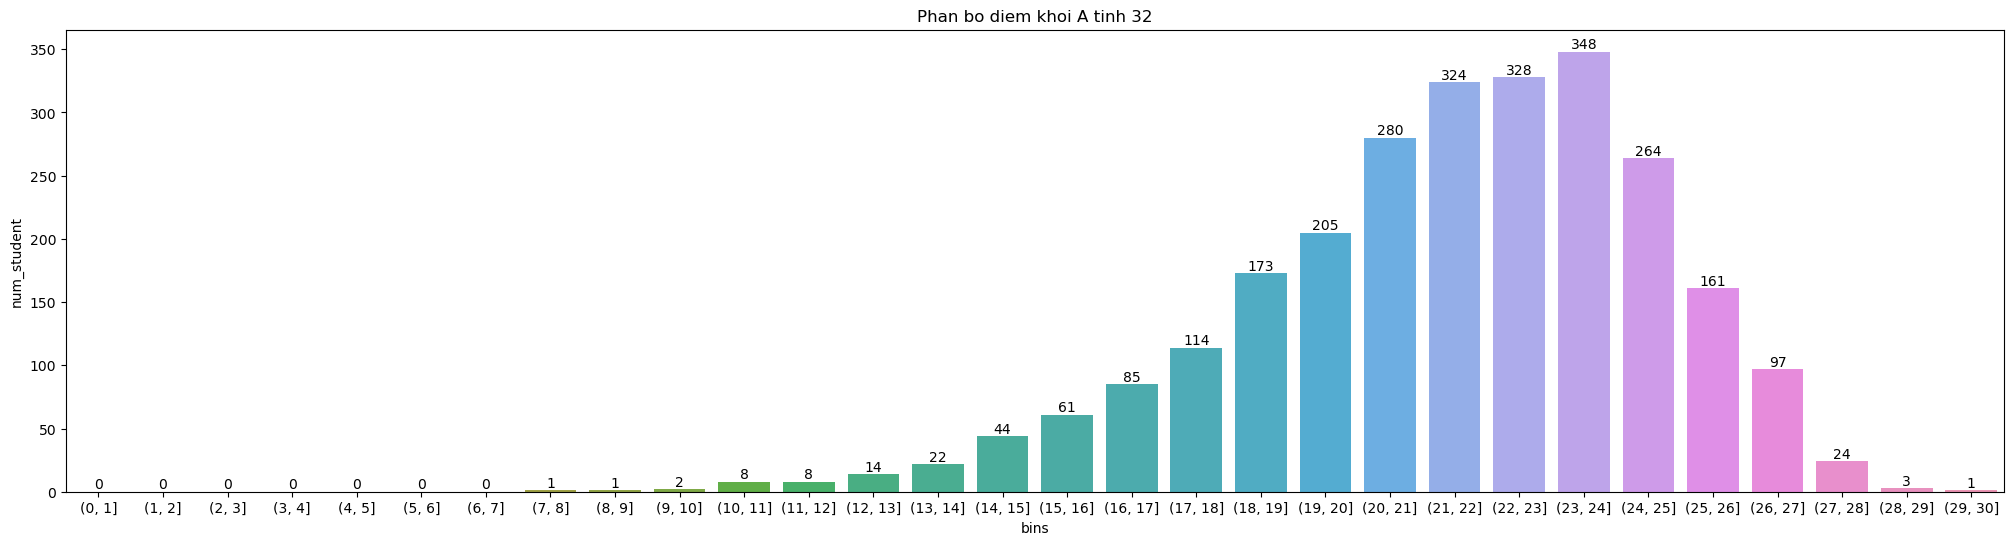

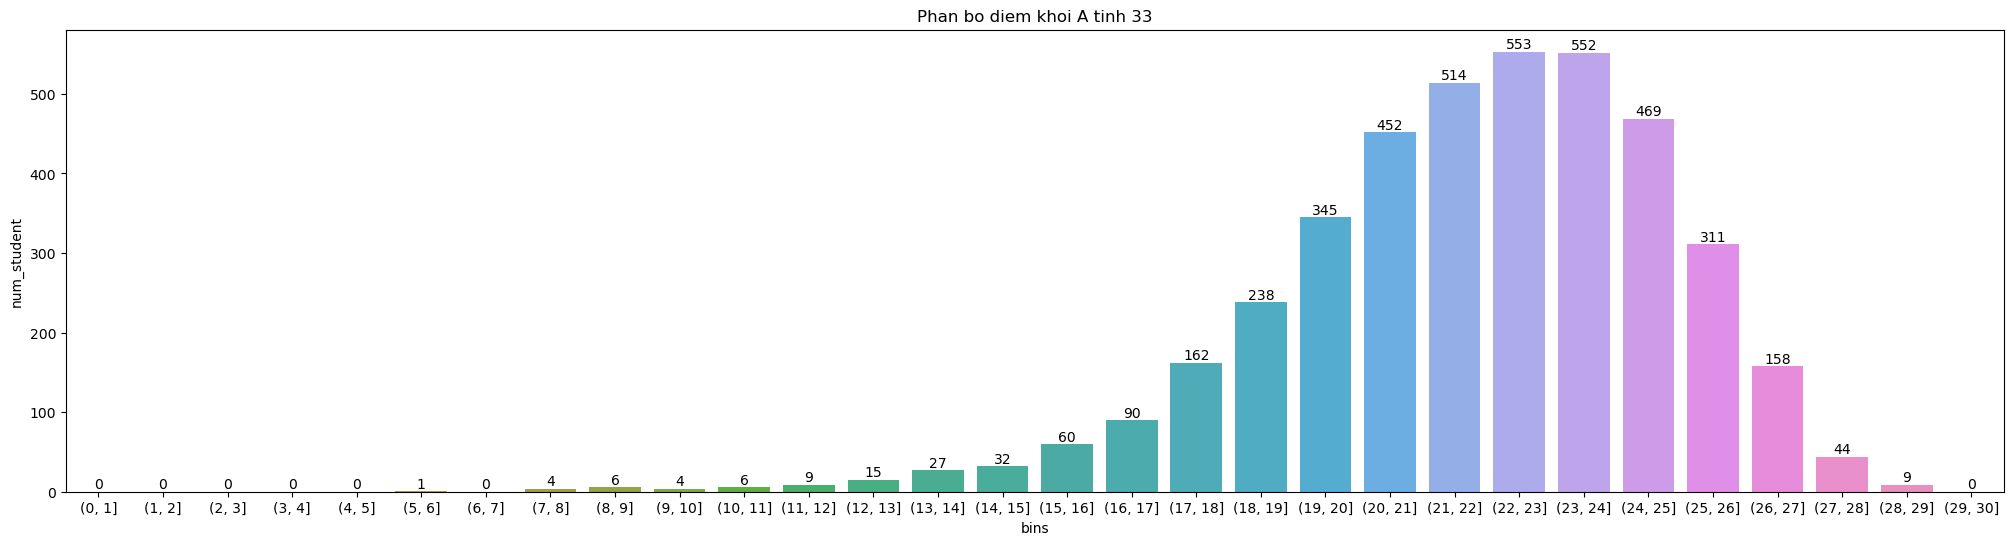

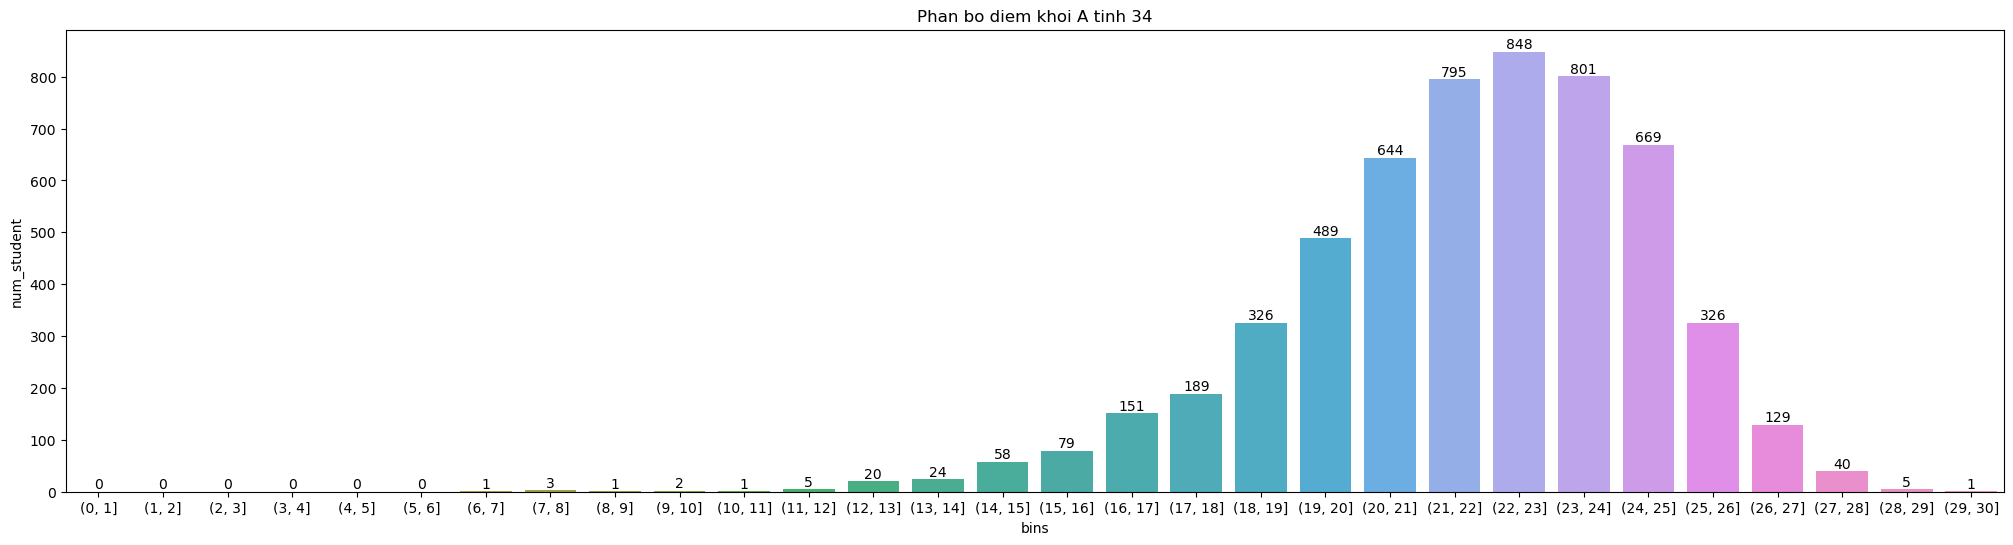

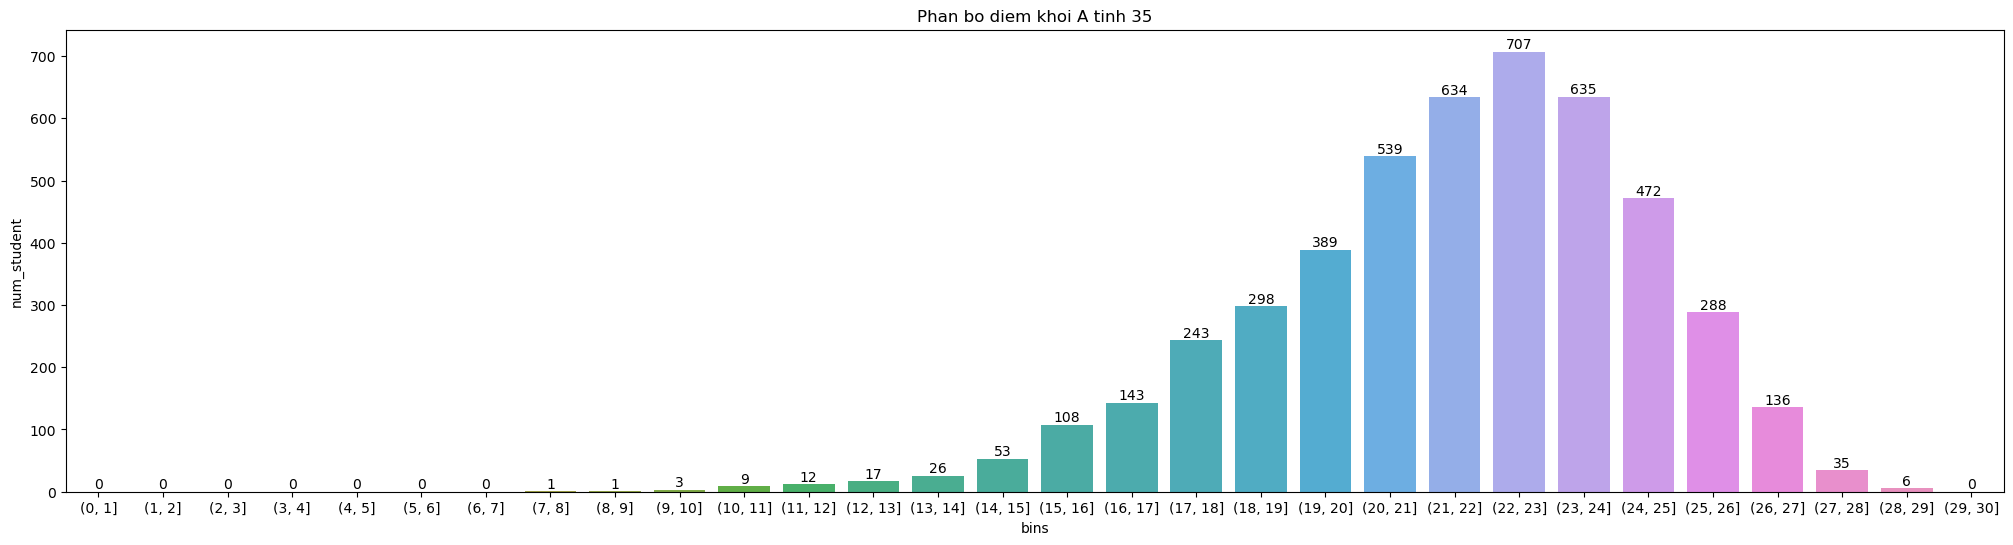

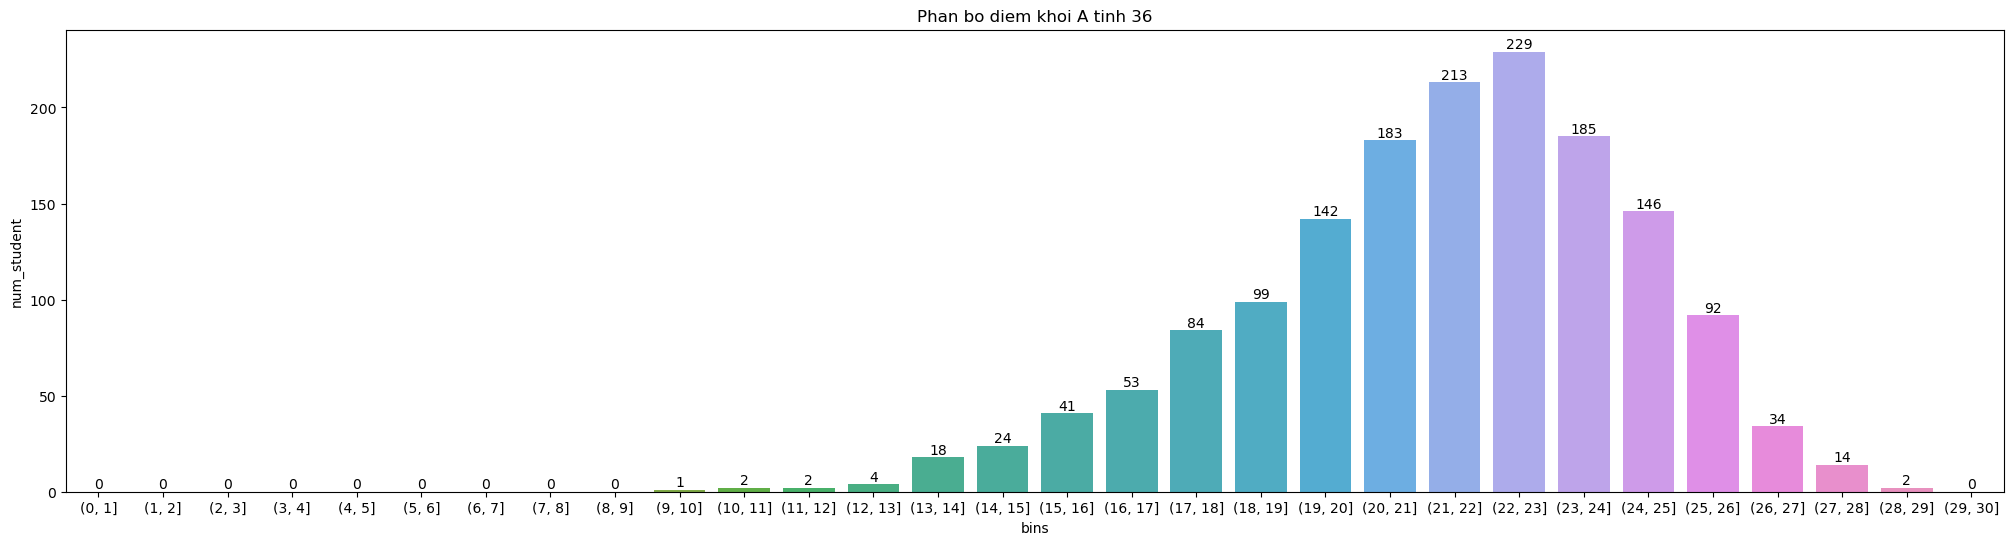

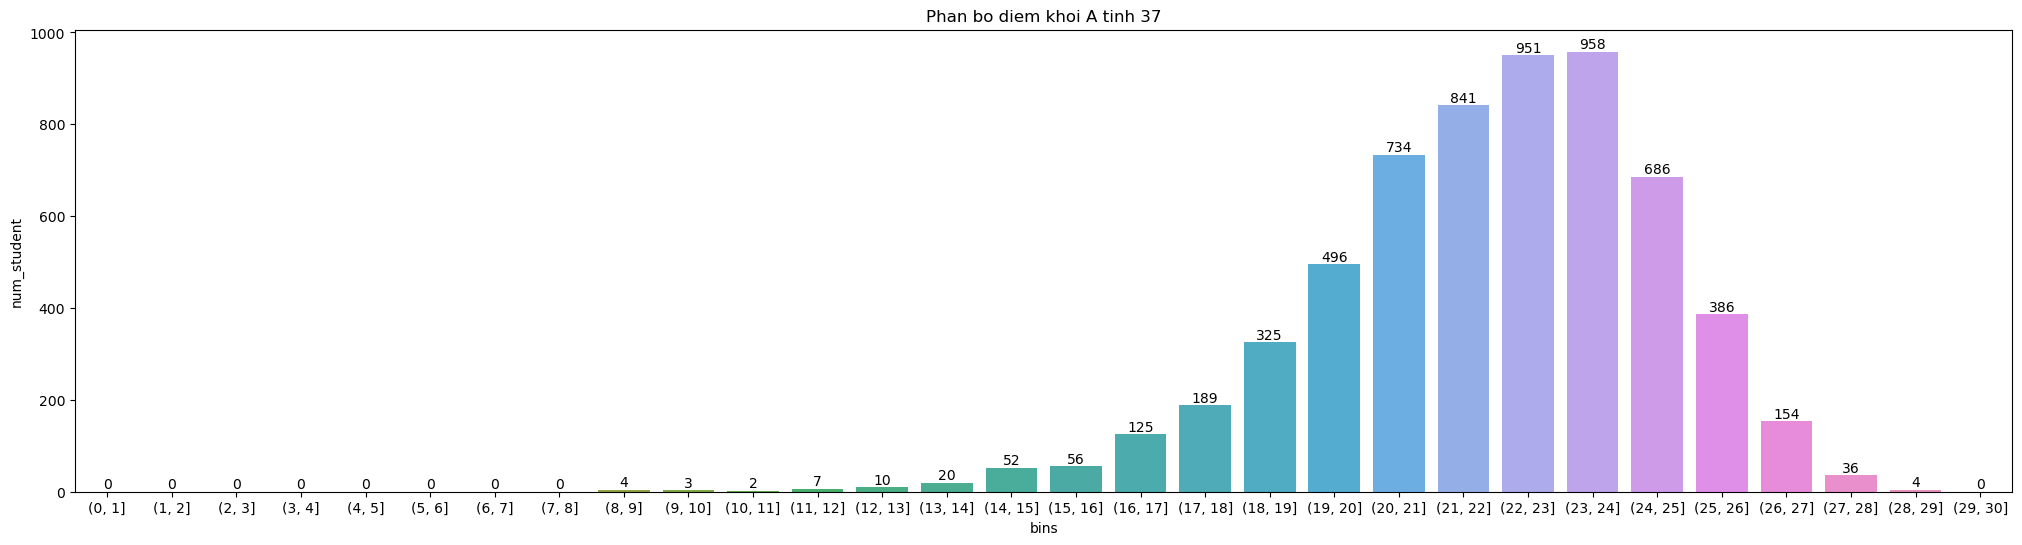

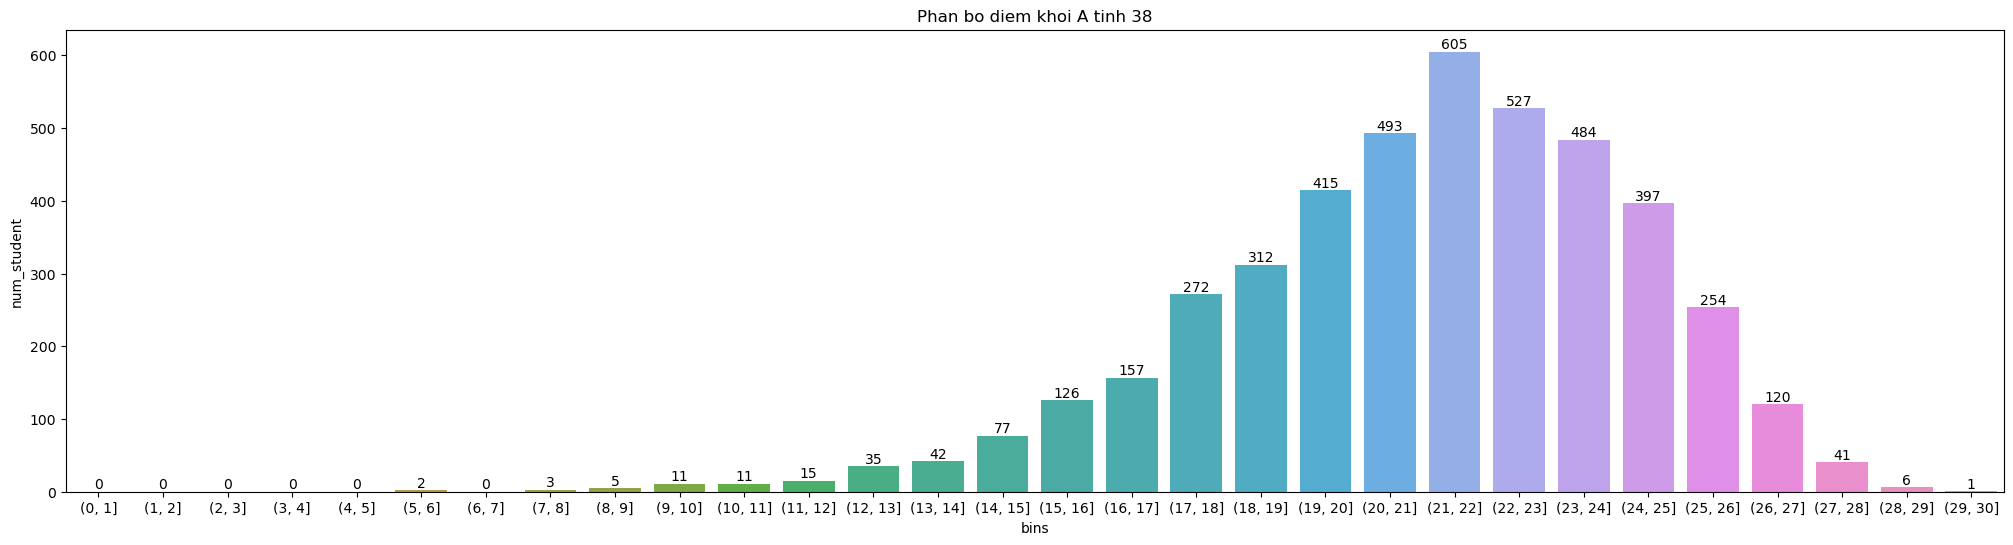

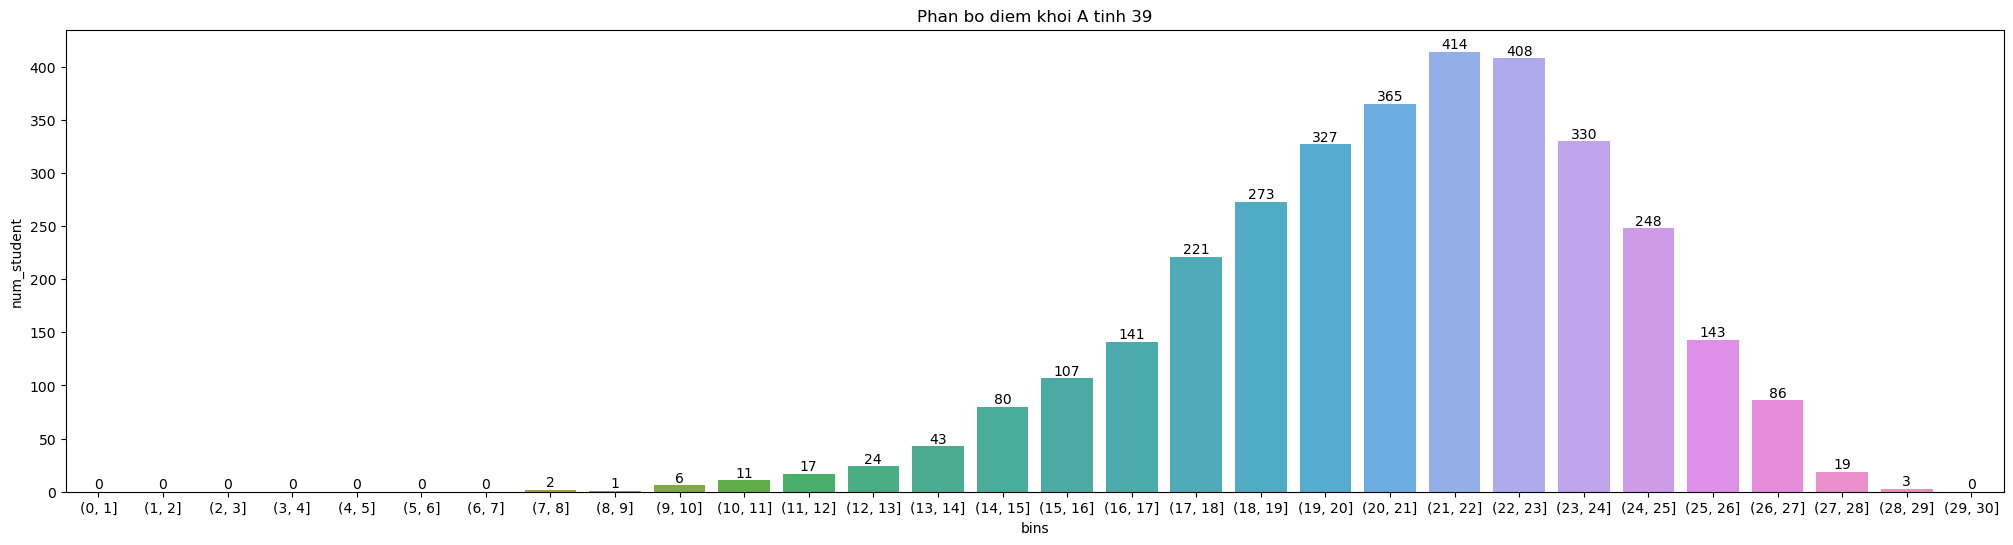

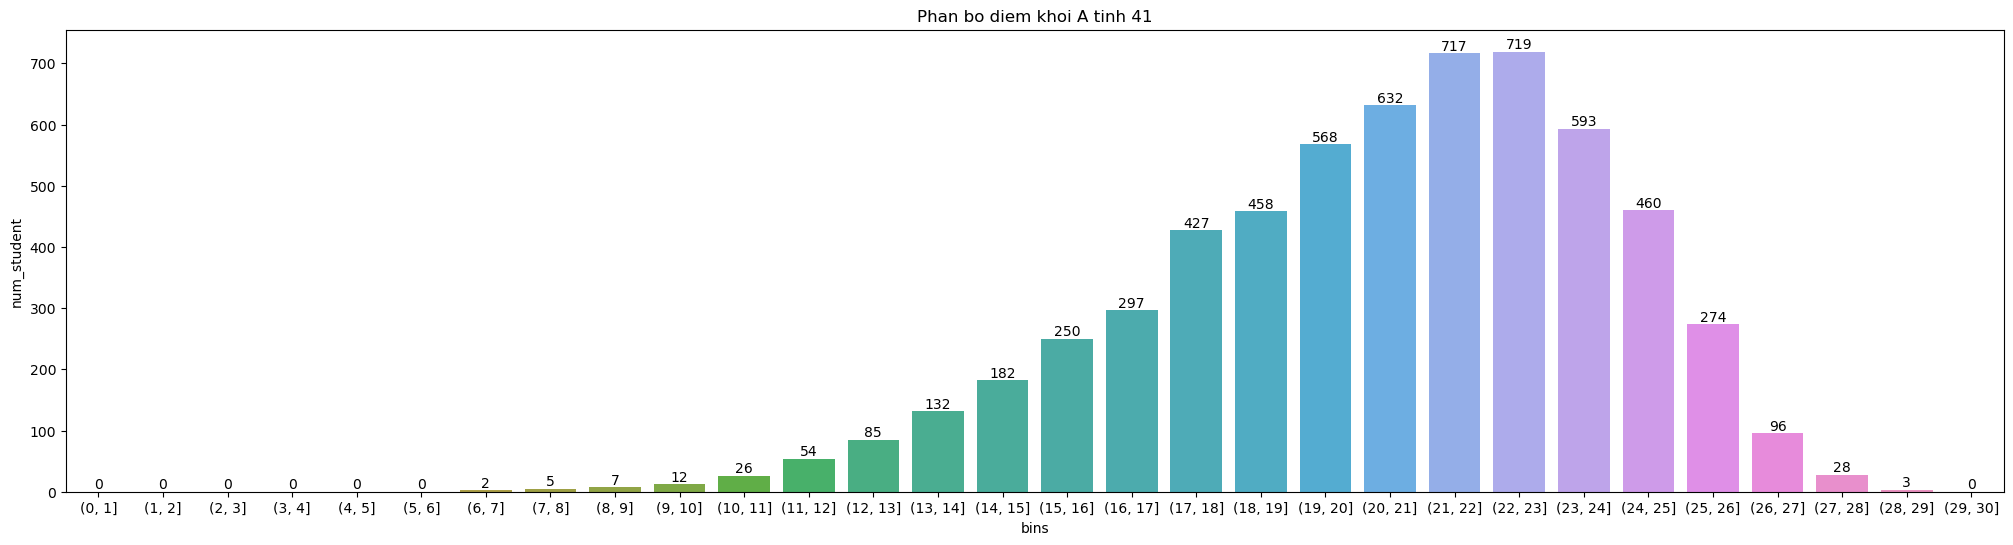

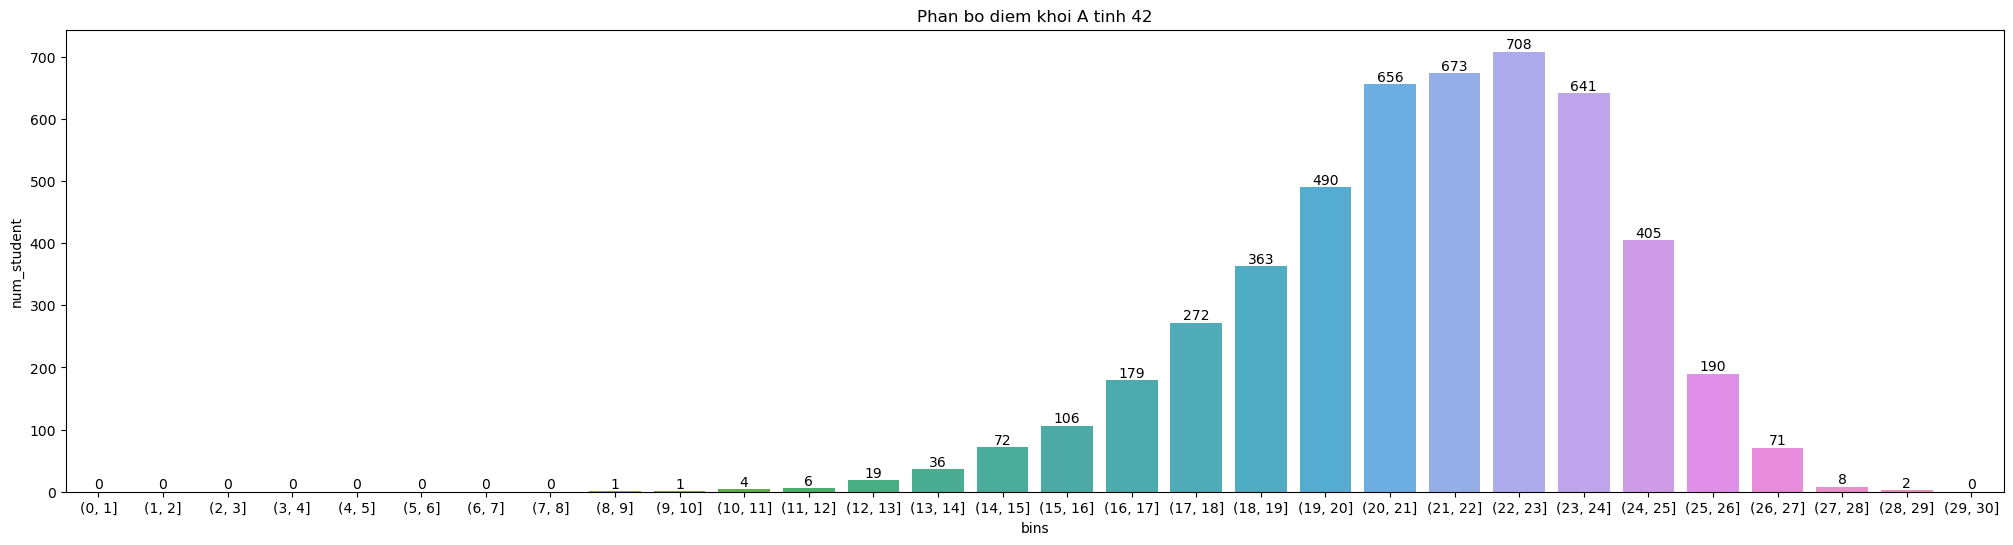

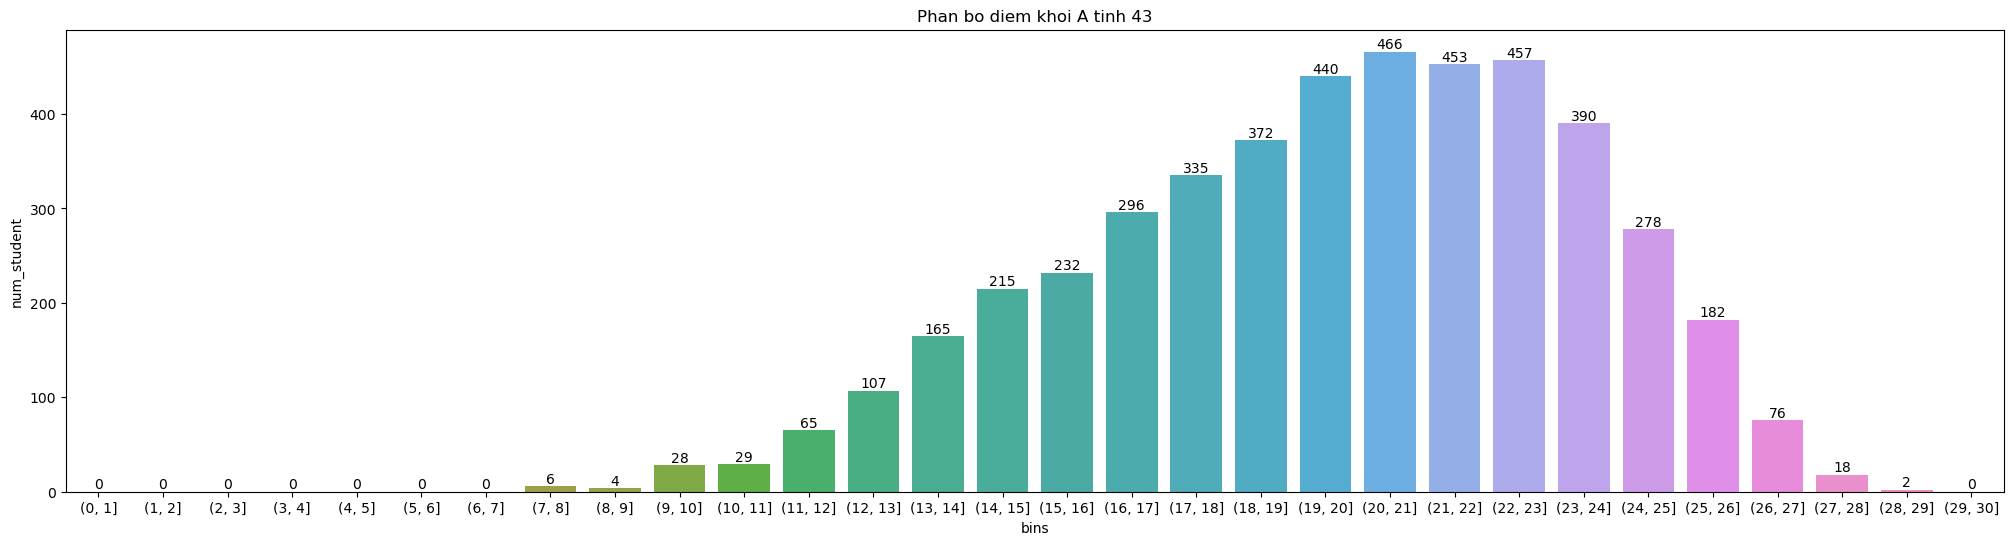

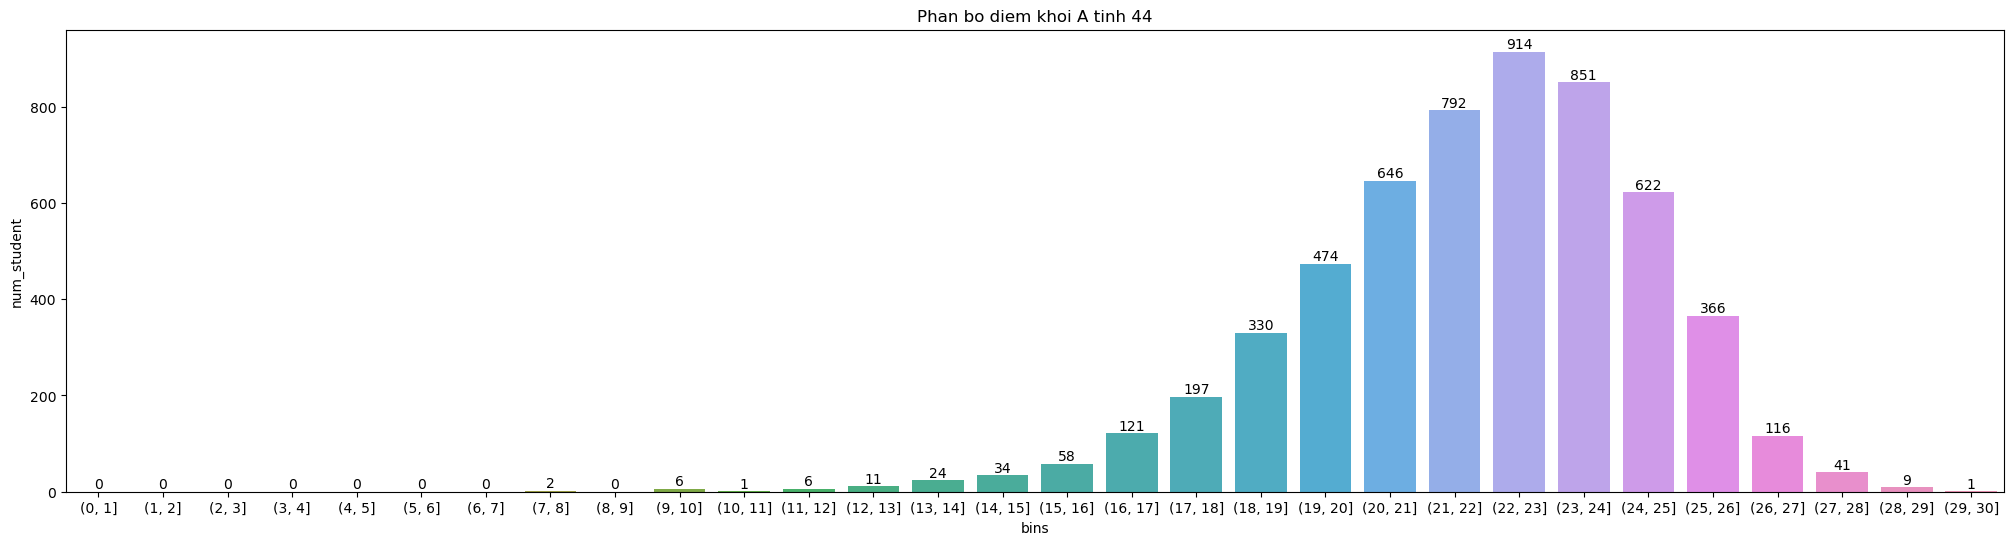

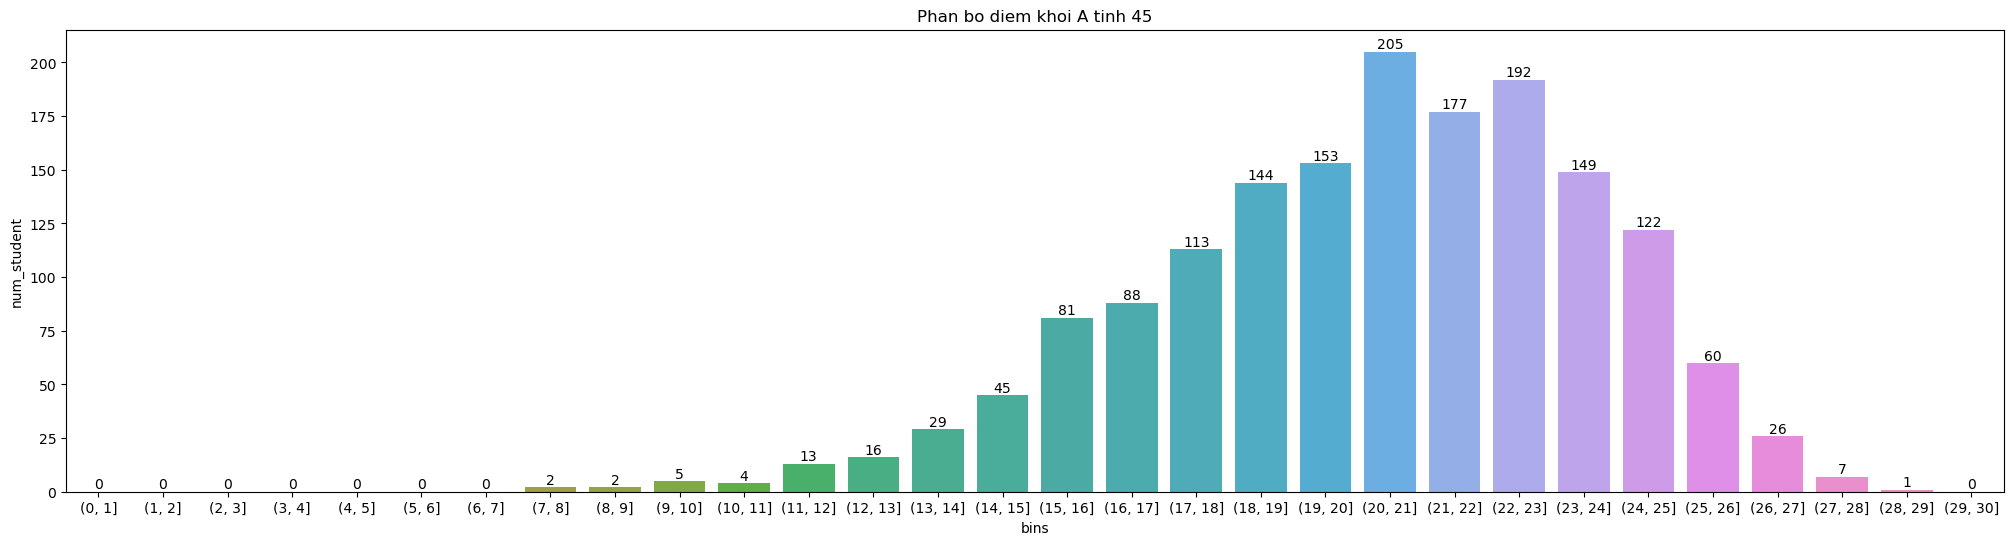

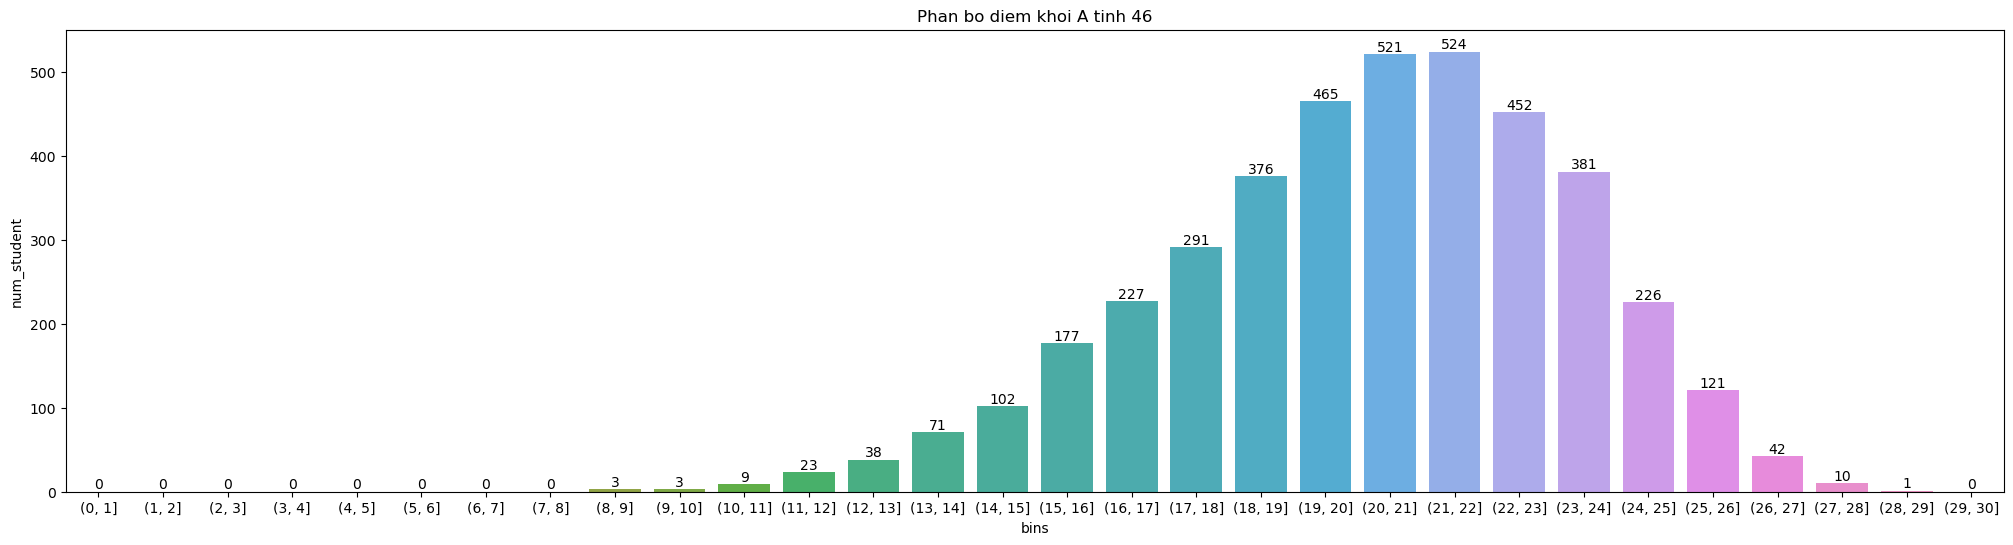

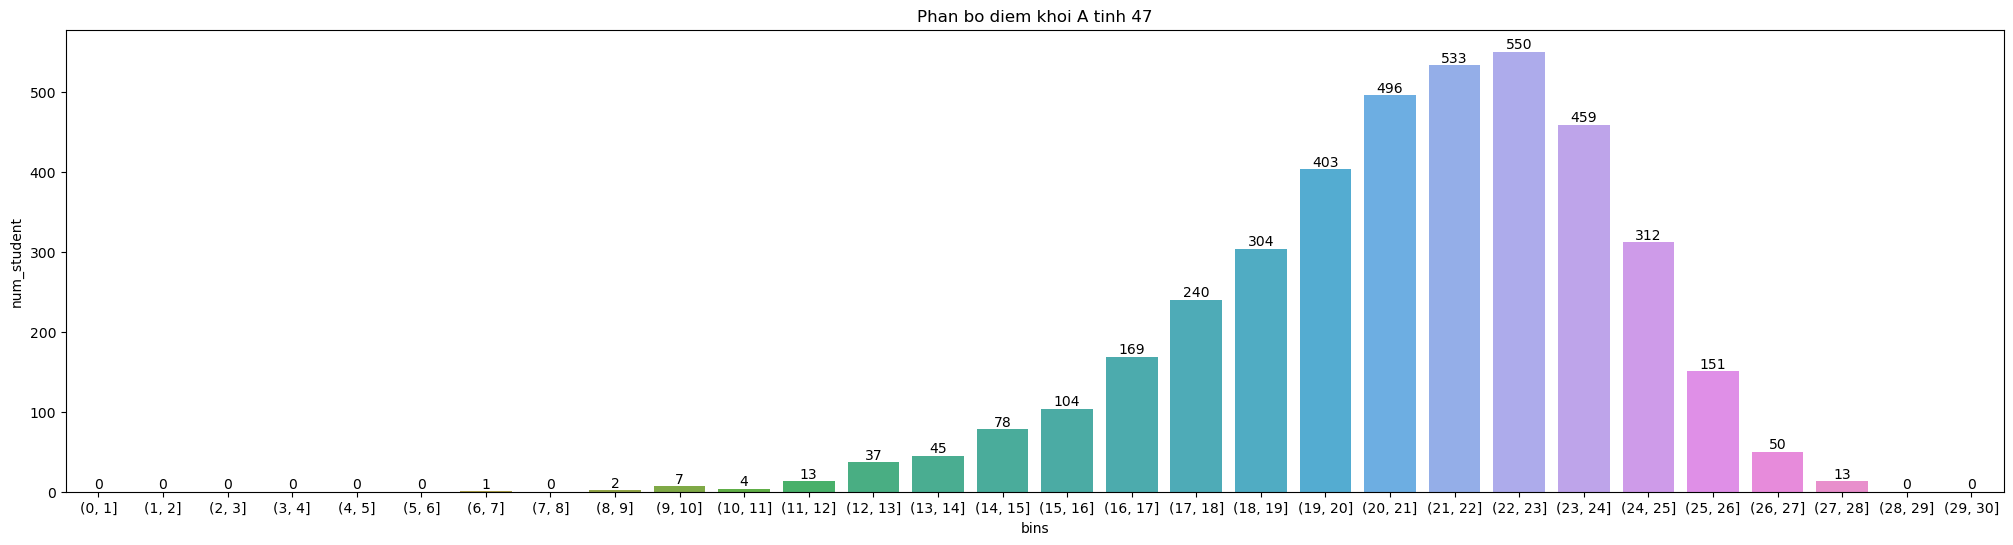

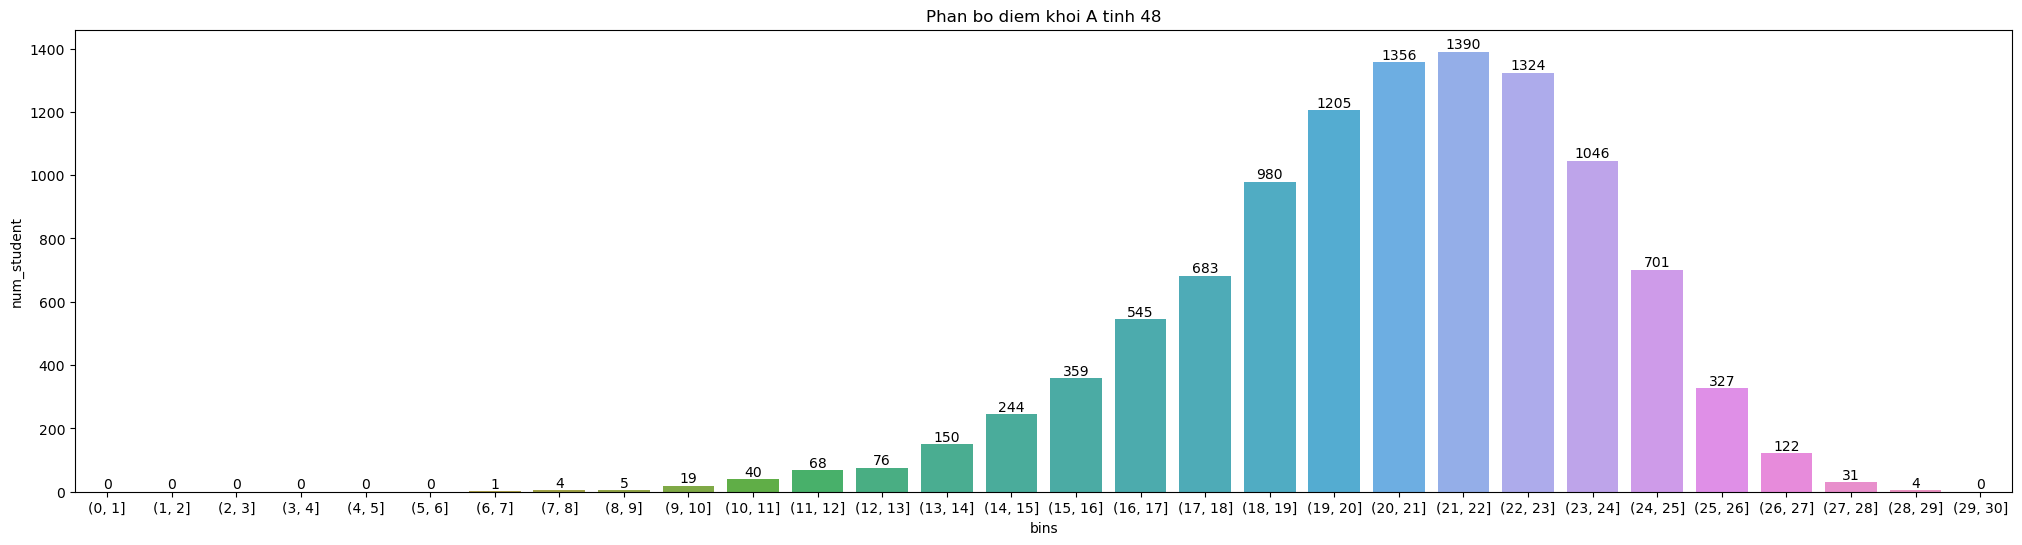

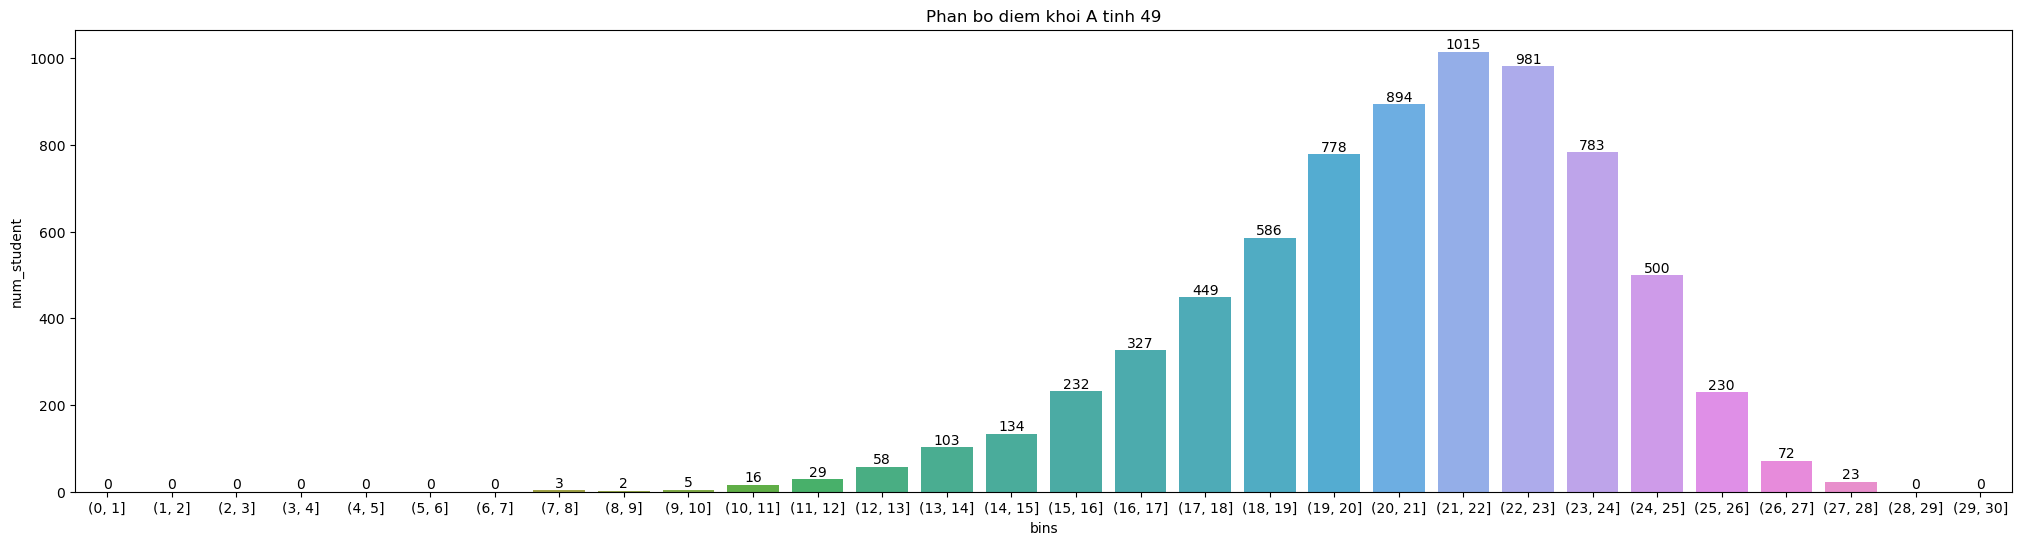

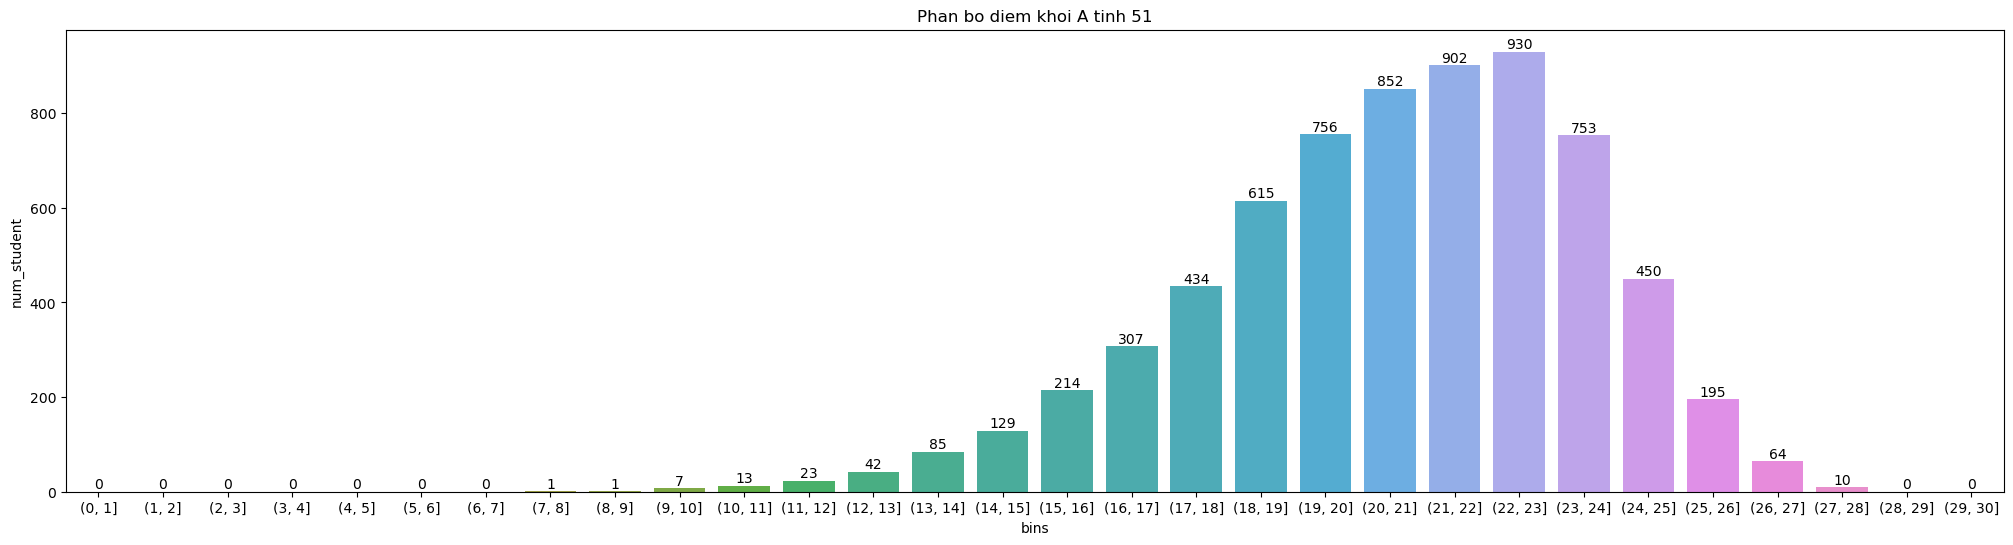

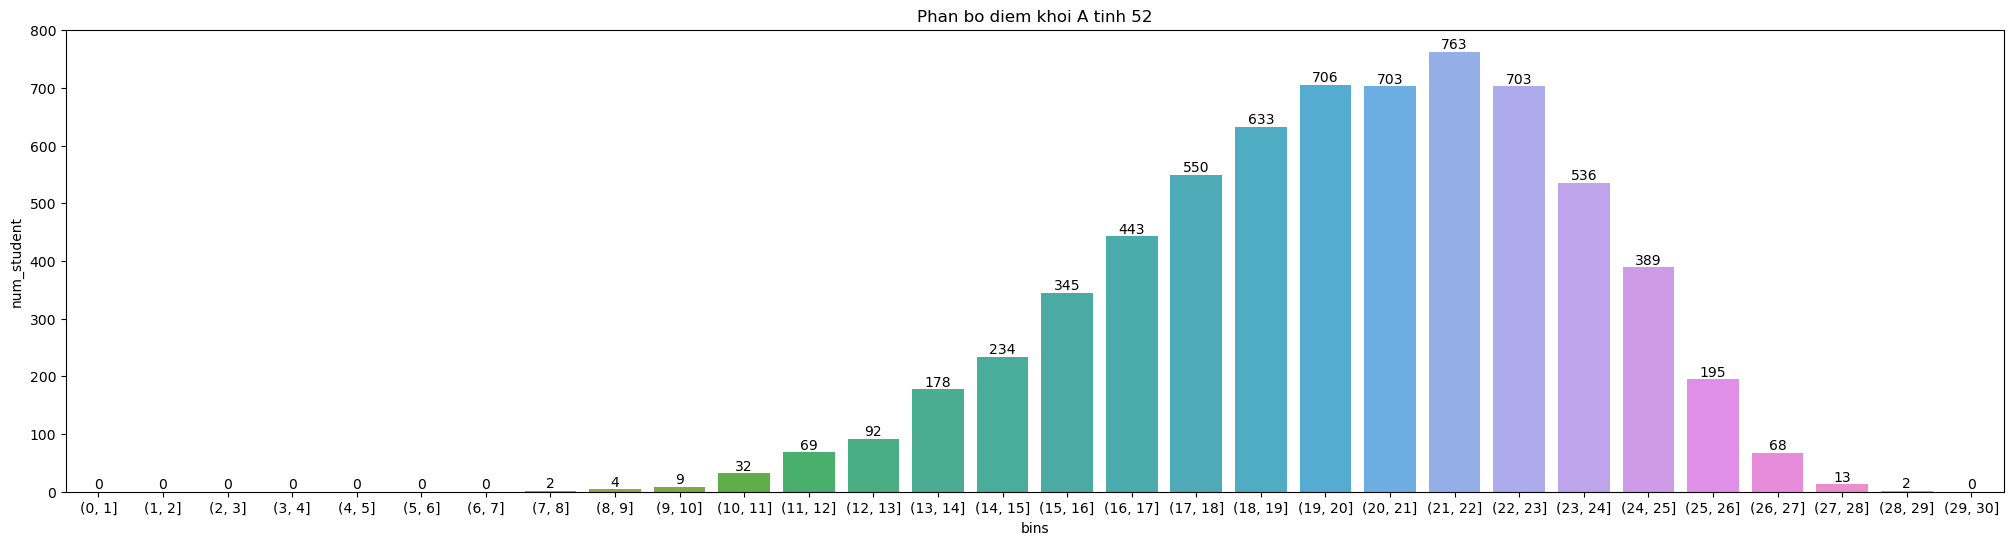

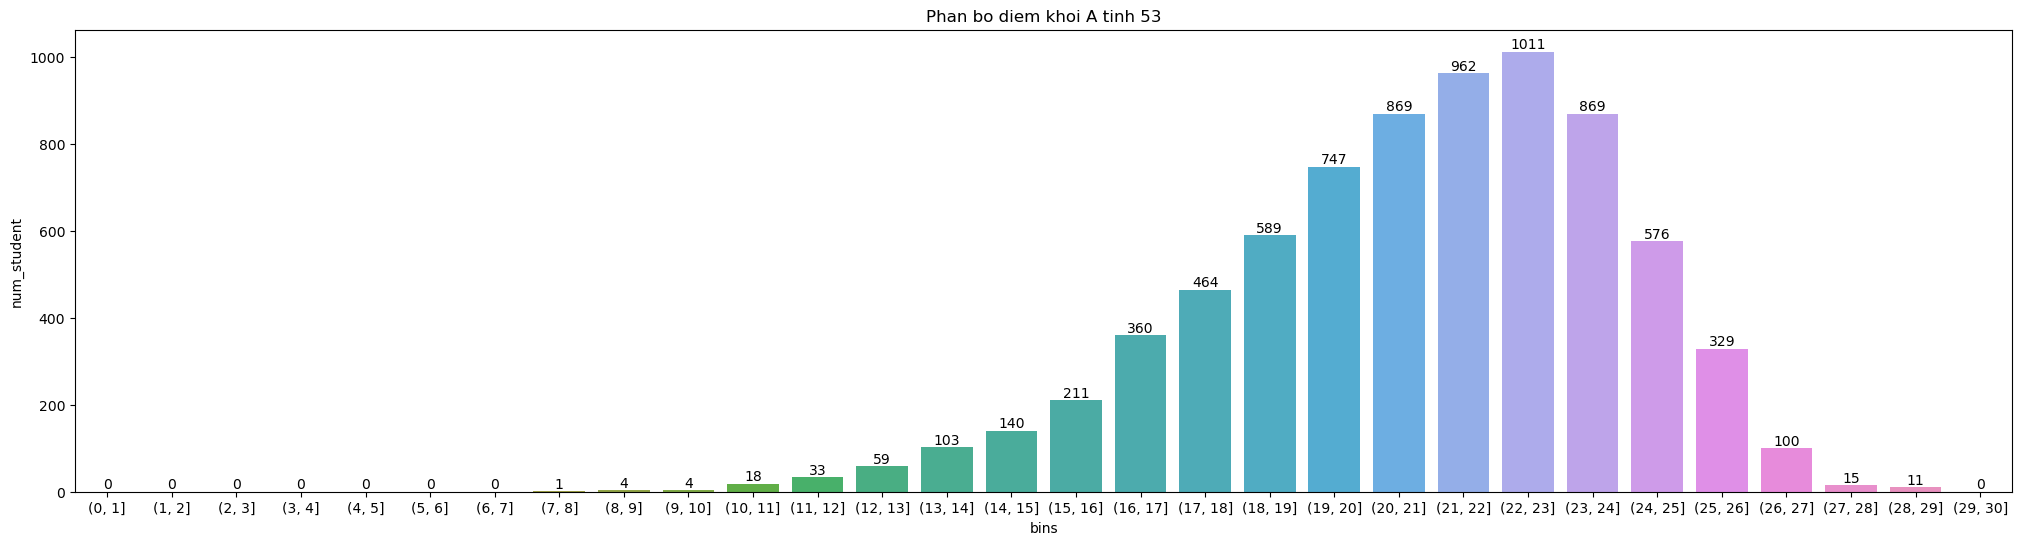

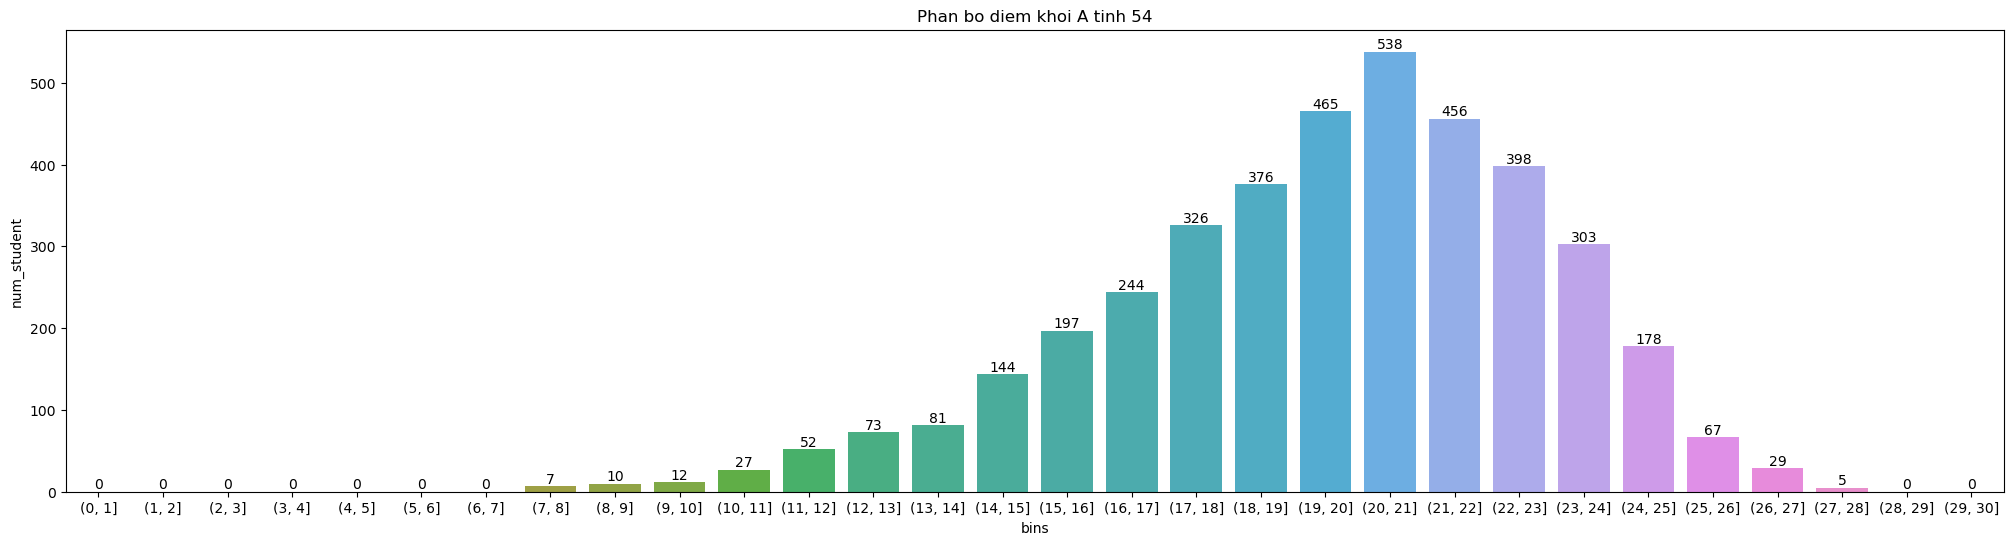

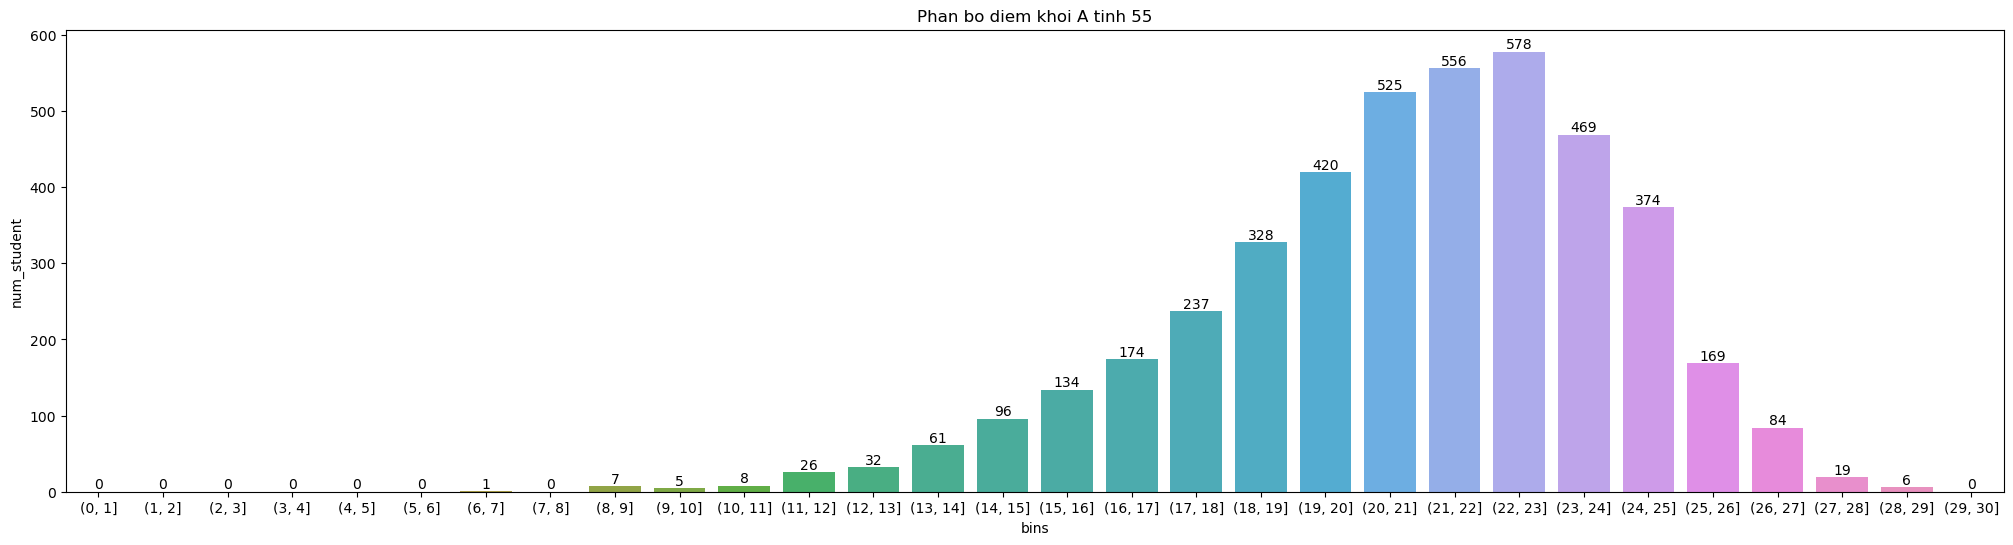

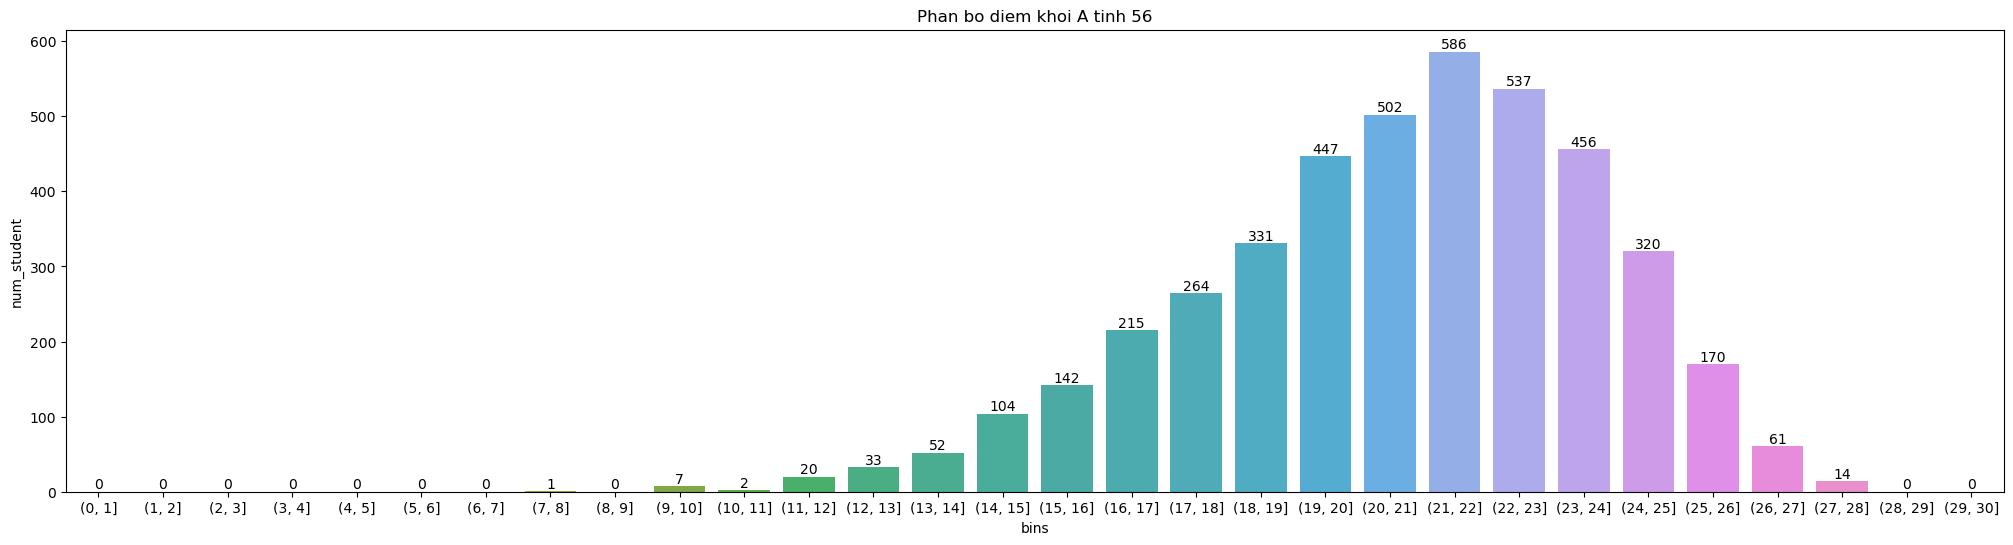

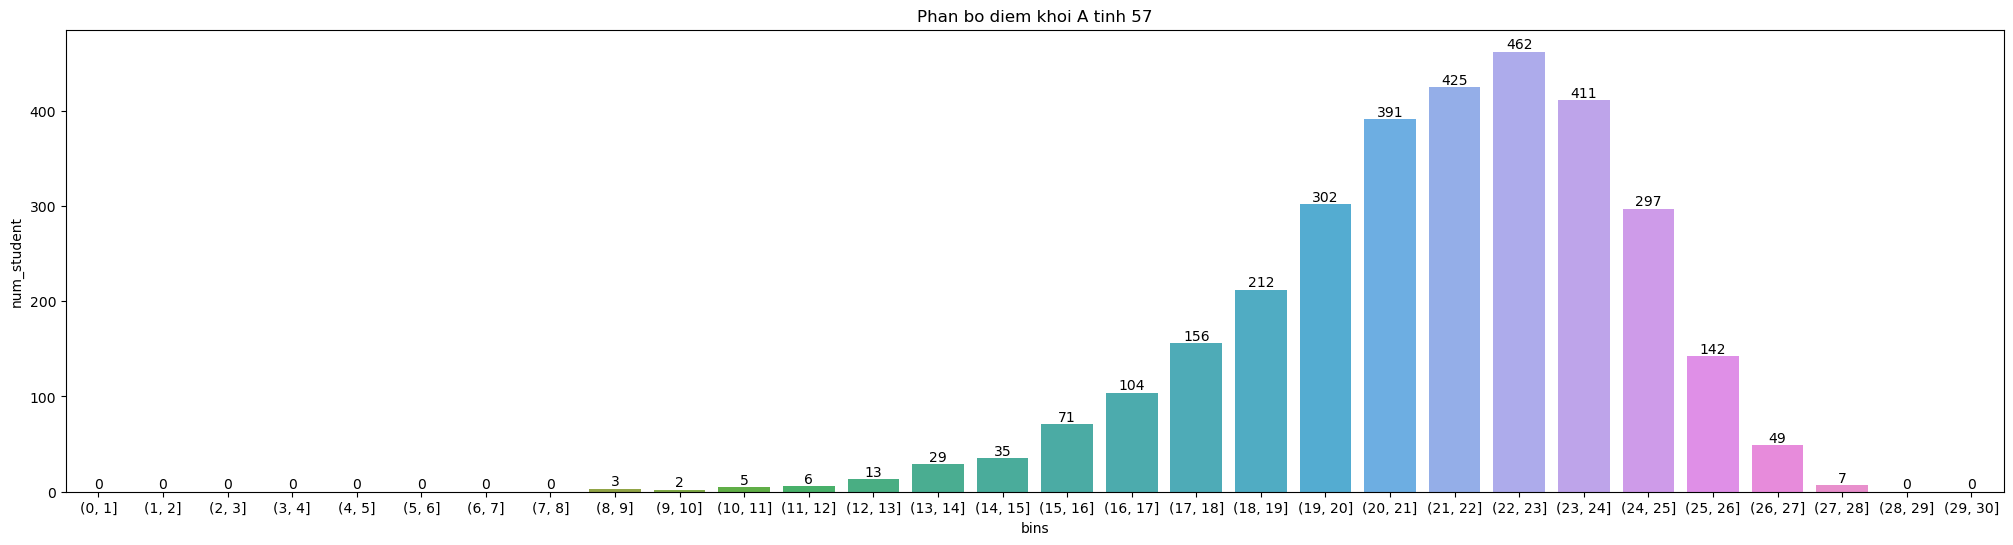

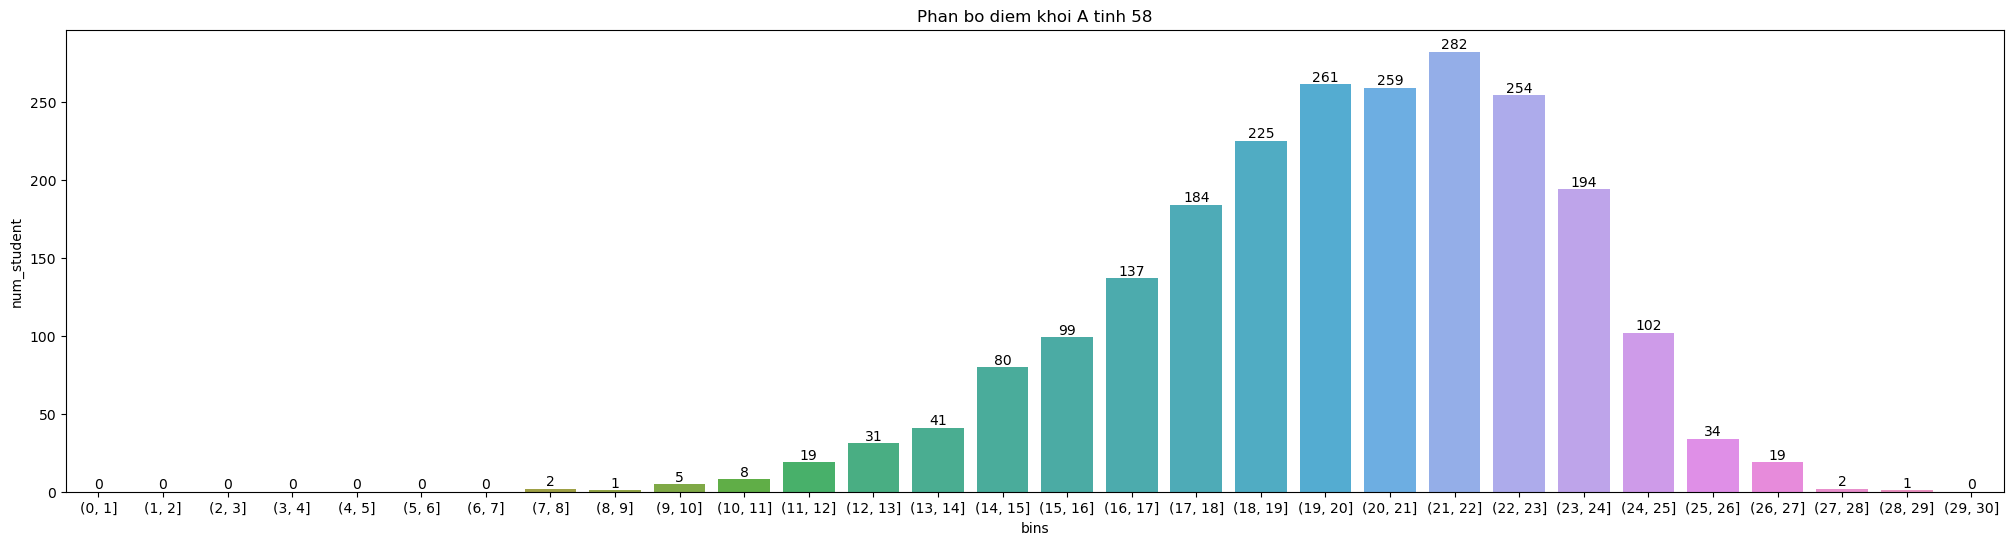

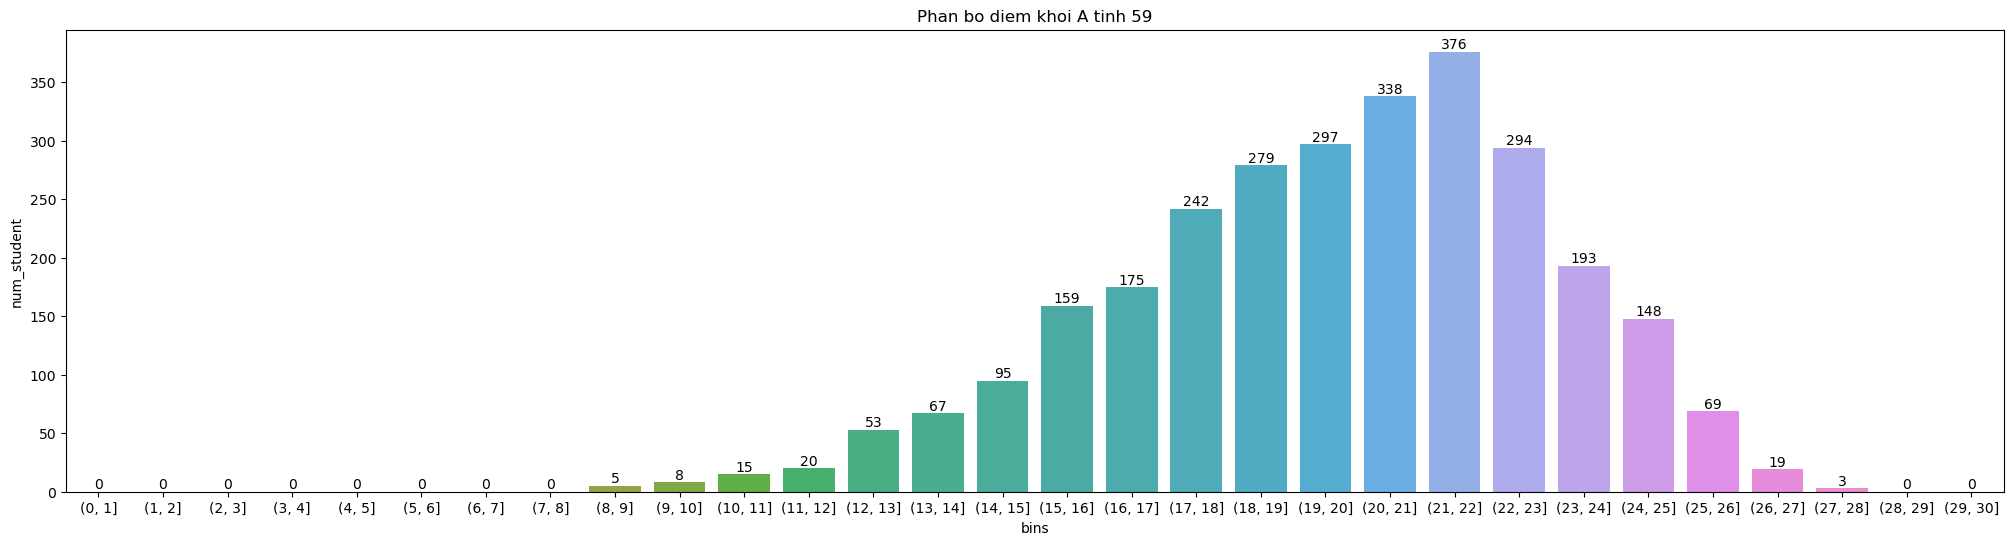

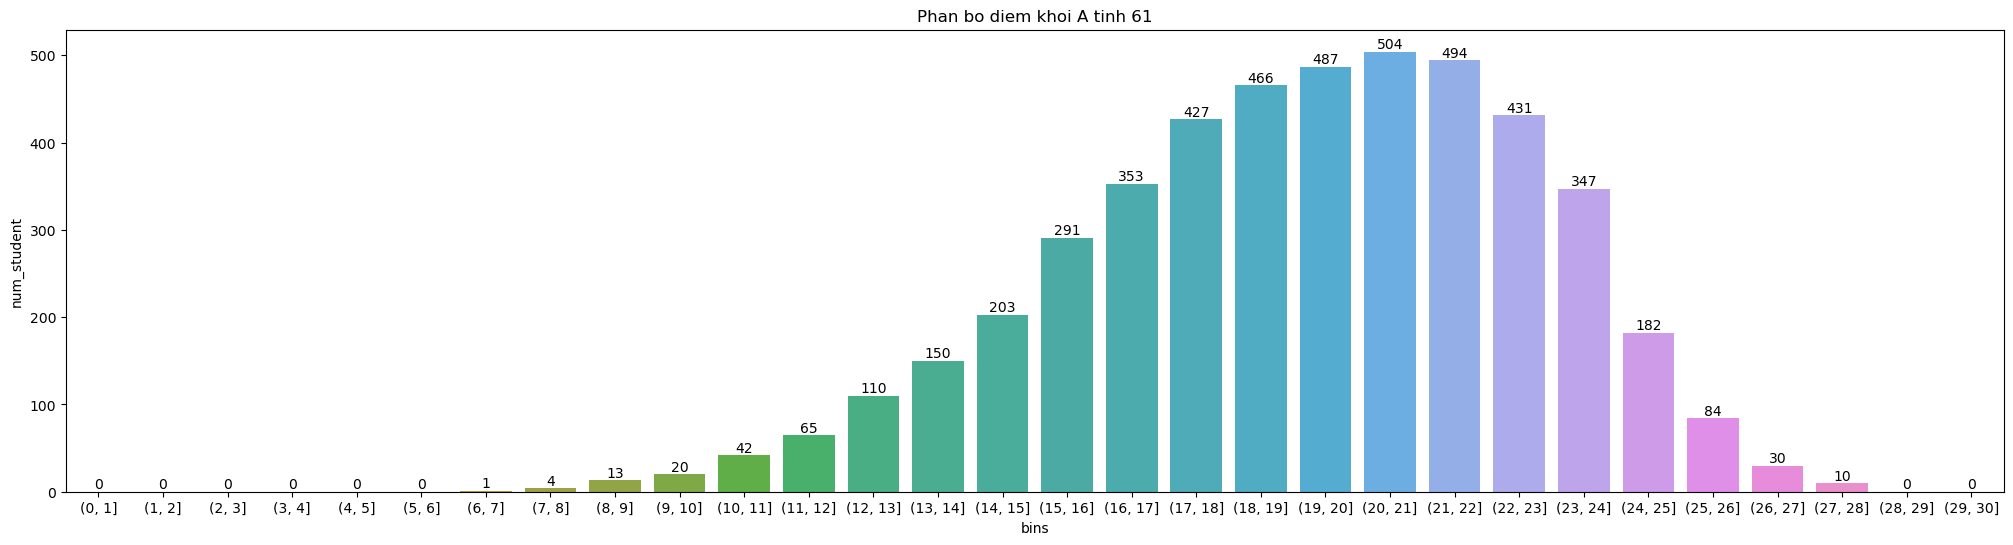

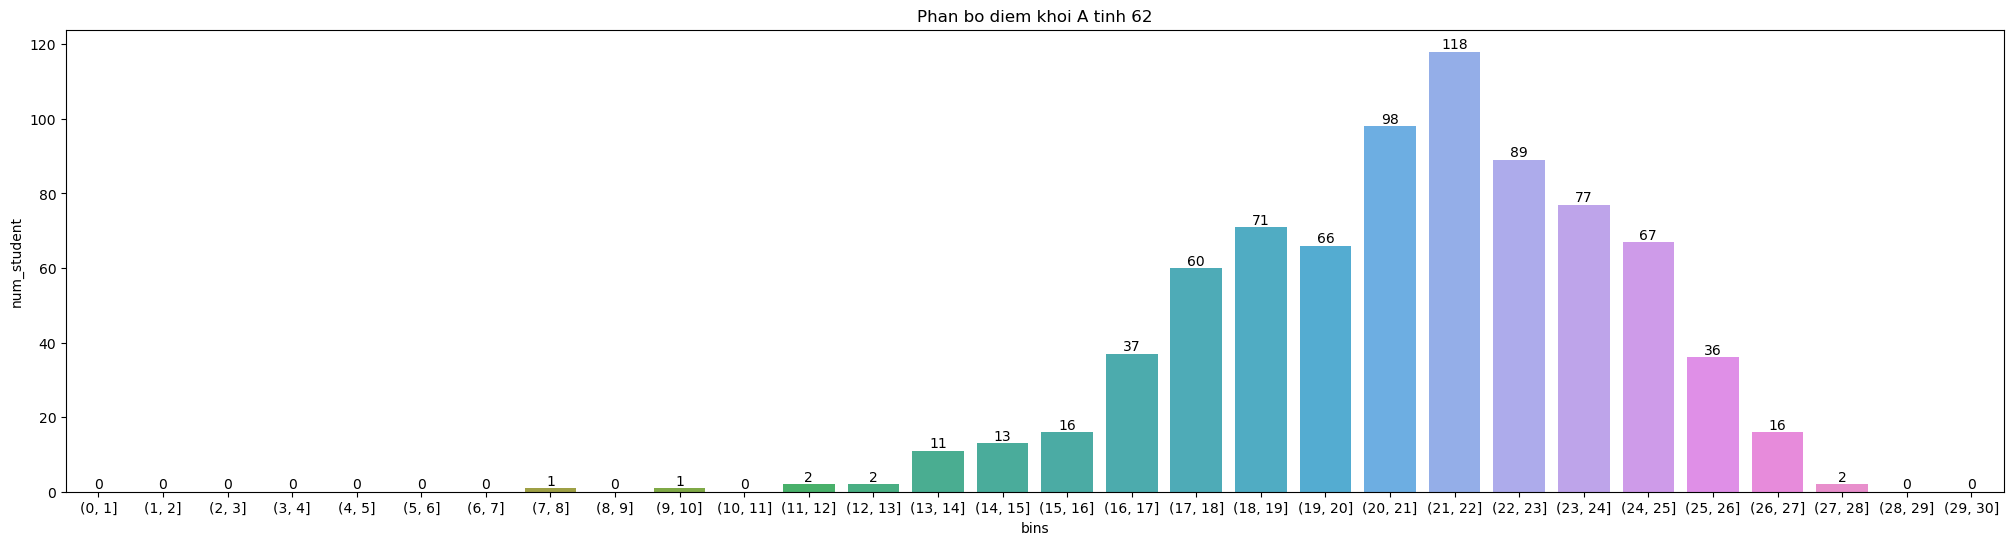

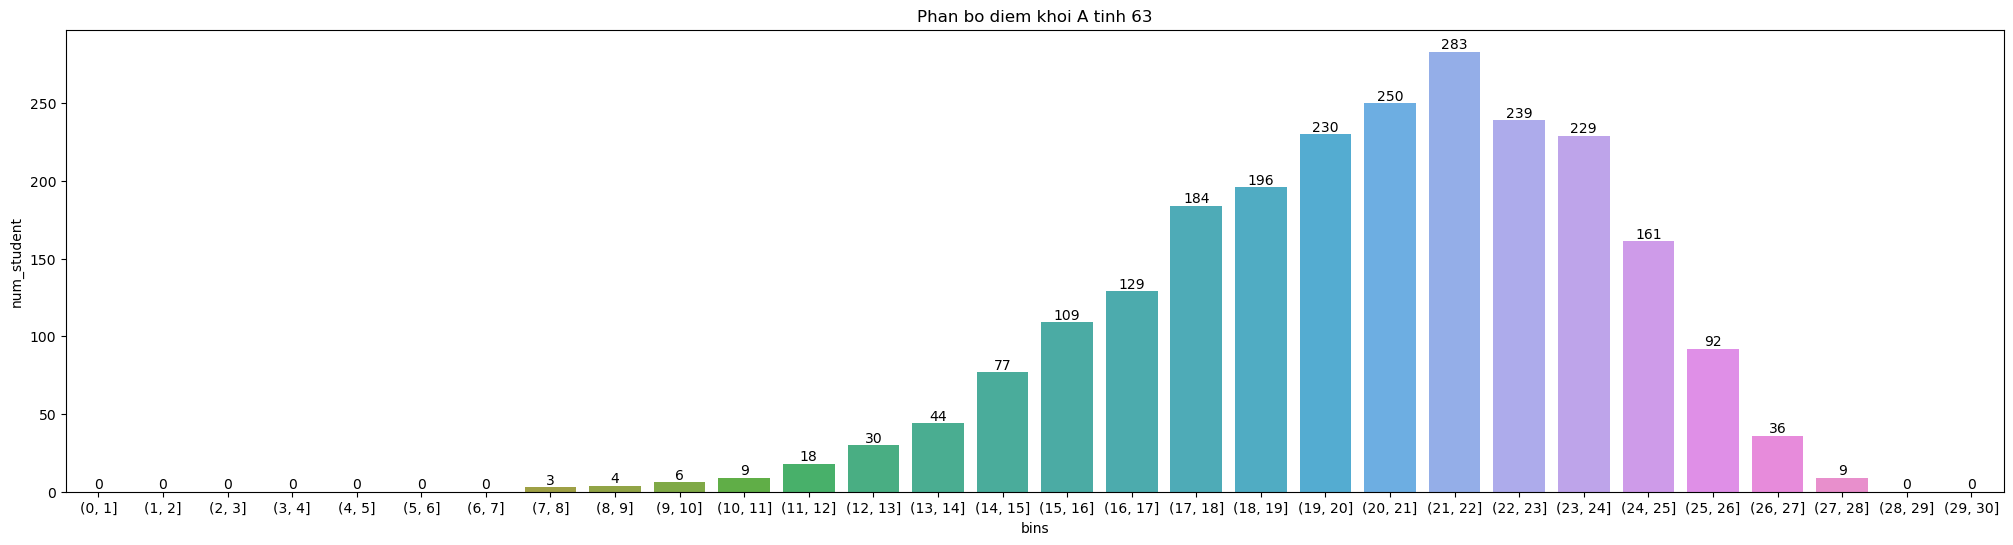

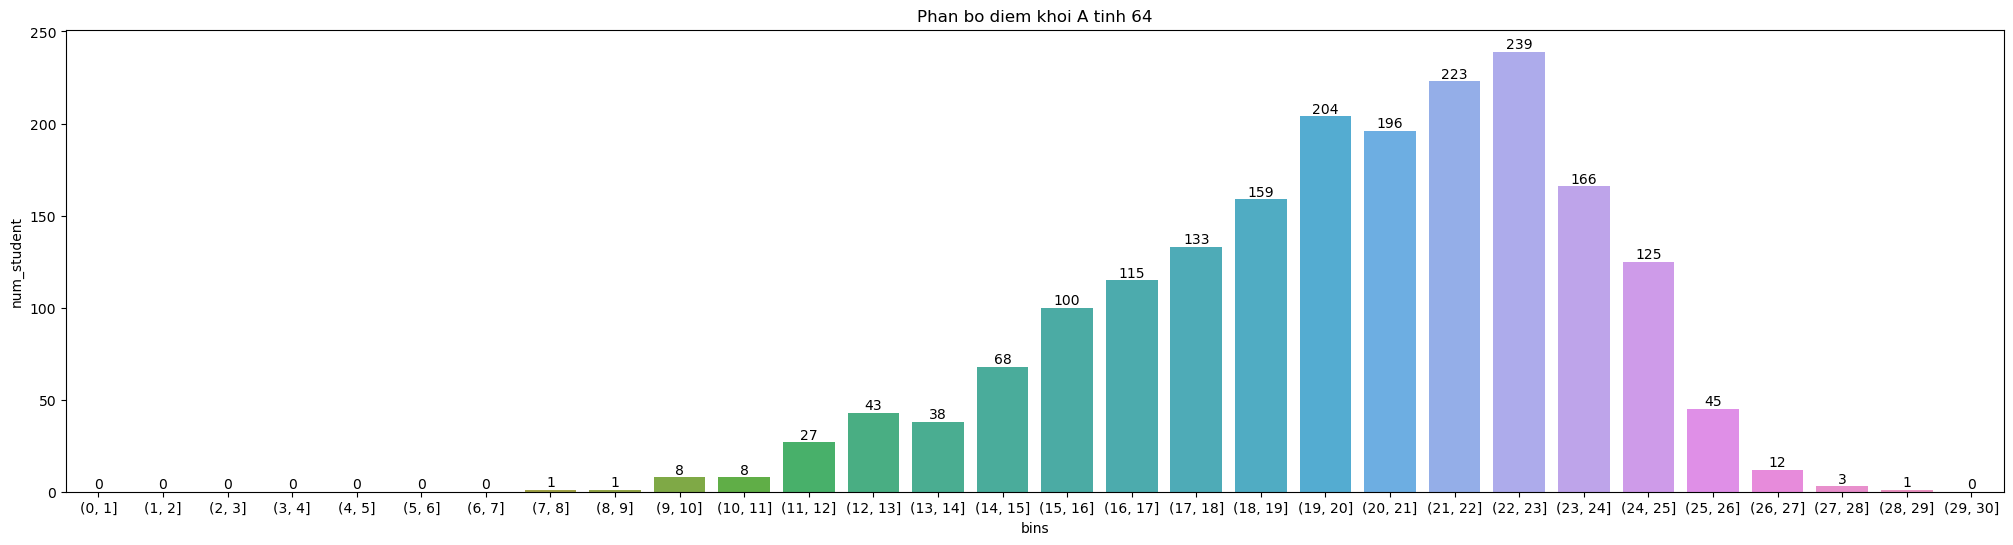

In [48]:
for idx, p in enumerate(province):
    fig, ax= plt.subplots(1, 1, figsize=(25, 6))
    khoi_a_group = khoi_a.loc[khoi_a.ma_tinh == p].groupby(["bins"]).agg(num_student=("sbd", "count")).reset_index()

    sns.barplot(data=khoi_a_group, x="bins", y="num_student", ax=ax)
    ax.bar_label(ax.containers[0])
    ax.set_title("Phan bo diem khoi A tinh " + p)
    plt.savefig('my_plot_' + p + '.png')


In [49]:
diemthi_2021 = pd.read_excel("./ĐIỂM THI THPTQG 2021.xlsx")

In [85]:
diemthi_2021

,SBD,Toán,Lý,Hóa,Sinh,Ngoại ngữ,Ngữ văn,Sử,Địa,Khối A,Khối B,Khối A01,Khối C,Khối D
0,1000006,8.0,NaN,NaN,NaN,8.6,8.75,5.00,6.5,NaN,NaN,NaN,20.25,25.35
1,1000035,5.0,NaN,NaN,NaN,NaN,3.75,4.00,5.0,NaN,NaN,NaN,12.75,NaN
2,1000030,8.2,NaN,NaN,NaN,9.2,7.75,NaN,NaN,NaN,NaN,NaN,NaN,25.15
3,1000027,8.0,NaN,NaN,NaN,9.8,9.00,6.00,7.0,NaN,NaN,NaN,22.00,26.80
4,1000020,8.8,5.5,8.25,4.50,8.4,6.25,NaN,NaN,22.55,21.55,22.7,NaN,23.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998402,64006776,8.0,NaN,NaN,NaN,9.4,8.75,6.25,7.0,NaN,NaN,NaN,22.00,26.15
998403,64006746,8.2,NaN,NaN,NaN,7.4,9.00,8.25,8.5,NaN,NaN,NaN,25.75,24.60
998404,64006736,6.6,2.5,6.75,5.75,7.0,5.75,NaN,NaN,15.85,19.10,16.1,NaN,19.35
998405,64006779,5.4,NaN,NaN,NaN,5.0,7.25,5.50,7.0,NaN,NaN,NaN,19.75,17.65


In [86]:
khoia_2021 = diemthi_2021.dropna(subset=["Khối A01"]).loc[diemthi_2021["Khối A01"] >= 15]
khoia_2021.loc[:, "bins"] = pd.cut(x=khoia_2021['Khối A01'], bins=list(range(15, 31, 1)))
khoia_2021_group = khoia_2021.groupby(["bins"]).agg(num_student=("SBD", "count")).reset_index()

In [87]:
khoi_a = diemthi.dropna(subset=["vat_li", "ngoai_ngu"])
khoi_a["total"] = khoi_a["toan"] + khoi_a["vat_li"] + khoi_a["ngoai_ngu"]
khoi_a = khoi_a.loc[khoi_a["total"] >= 15]
khoi_a.loc[:, "bins"] = pd.cut(x=khoi_a['total'], bins=list(range(15, 31, 1)))
khoi_a_group = khoi_a.groupby(["bins"]).agg(num_student=("sbd", "count")).reset_index()

/var/folders/gt/0d0rqfrx3_q_dk7kdq70pr180000gn/T/ipykernel_28776/2665769601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khoi_a["total"] = khoi_a["toan"] + khoi_a["vat_li"] + khoi_a["ngoai_ngu"]


In [88]:
khoia_2021_group["year"] = 2021
khoi_a_group["year"] = 2022

khoi_a01_compare = pd.concat([khoi_a_group, khoia_2021_group]).reset_index(drop=True)


In [81]:
khoia_2021_group["year"] = 2021
khoi_a_group["year"] = 2022

khoi_a_compare = pd.concat([khoi_a_group, khoia_2021_group]).reset_index(drop=True)


In [82]:
khoi_a_compare

,bins,num_student,year
0,"(15, 16]",8954,2022
1,"(16, 17]",12856,2022
2,"(17, 18]",17831,2022
3,"(18, 19]",23732,2022
4,"(19, 20]",30101,2022
5,"(20, 21]",36216,2022
6,"(21, 22]",40205,2022
7,"(22, 23]",41188,2022
8,"(23, 24]",37667,2022
9,"(24, 25]",29303,2022


In [89]:
khoi_a01_compare

,bins,num_student,year
0,"(15, 16]",12787,2022
1,"(16, 17]",18512,2022
2,"(17, 18]",24129,2022
3,"(18, 19]",30408,2022
4,"(19, 20]",35113,2022
5,"(20, 21]",36683,2022
6,"(21, 22]",34894,2022
7,"(22, 23]",31011,2022
8,"(23, 24]",25629,2022
9,"(24, 25]",19320,2022


[Text(0, 0, '8954'),
 Text(0, 0, '12856'),
 Text(0, 0, '17831'),
 Text(0, 0, '23732'),
 Text(0, 0, '30101'),
 Text(0, 0, '36216'),
 Text(0, 0, '40205'),
 Text(0, 0, '41188'),
 Text(0, 0, '37667'),
 Text(0, 0, '29303'),
 Text(0, 0, '18204'),
 Text(0, 0, '8808'),
 Text(0, 0, '2977'),
 Text(0, 0, '523'),
 Text(0, 0, '58')]

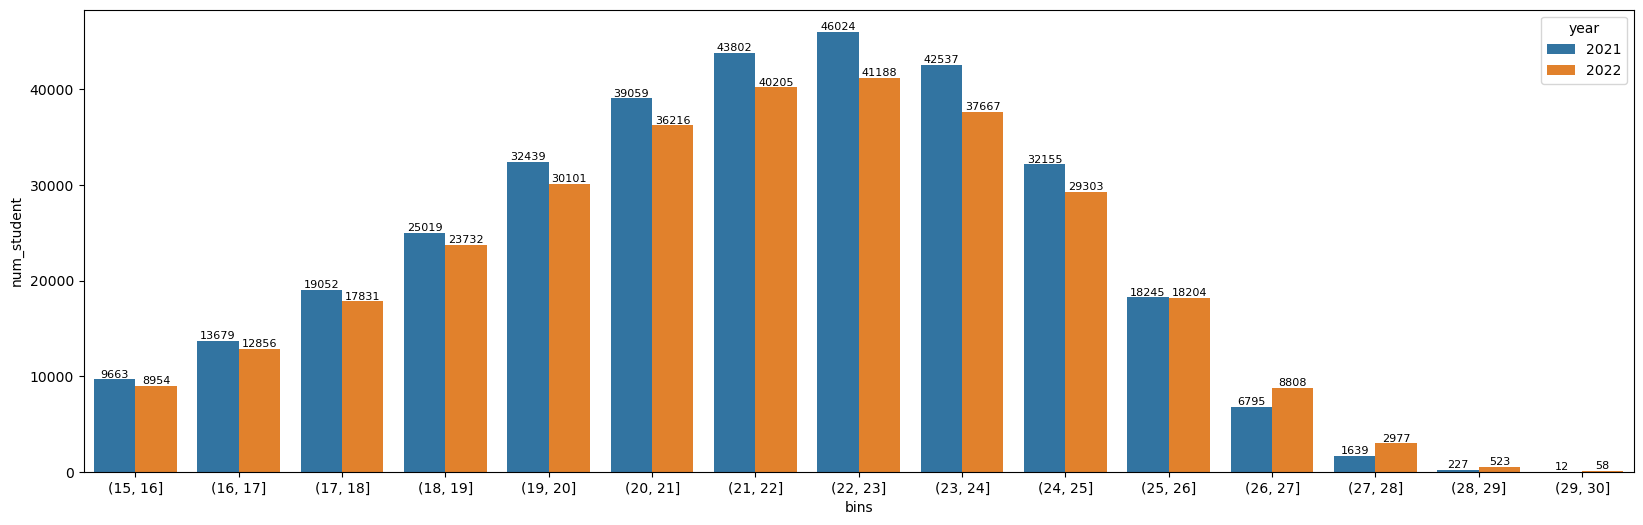

In [84]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))

sns.barplot(data=khoi_a_compare, x="bins", y="num_student", hue="year", ax=ax)
ax.bar_label(ax.containers[0], fontsize=8)
ax.bar_label(ax.containers[1], fontsize=8)



[Text(0, 0, '12787'),
 Text(0, 0, '18512'),
 Text(0, 0, '24129'),
 Text(0, 0, '30408'),
 Text(0, 0, '35113'),
 Text(0, 0, '36683'),
 Text(0, 0, '34894'),
 Text(0, 0, '31011'),
 Text(0, 0, '25629'),
 Text(0, 0, '19320'),
 Text(0, 0, '13238'),
 Text(0, 0, '7157'),
 Text(0, 0, '2425'),
 Text(0, 0, '388'),
 Text(0, 0, '18')]

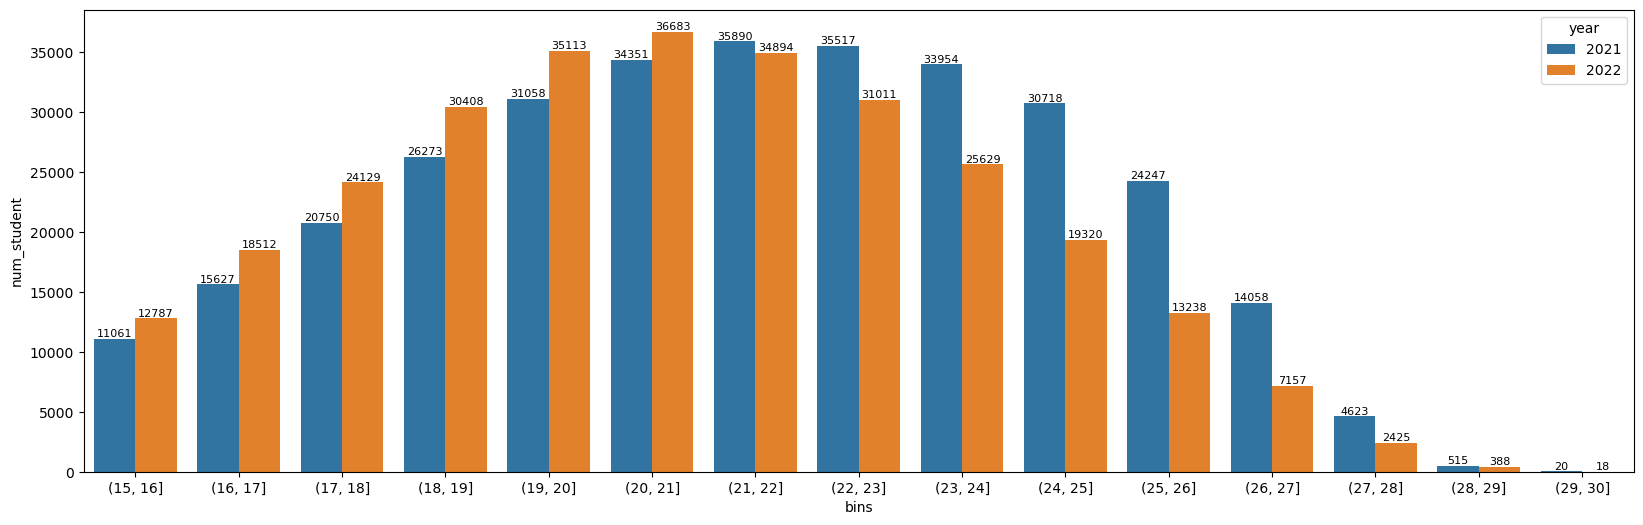

In [90]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))

sns.barplot(data=khoi_a01_compare, x="bins", y="num_student", hue="year", ax=ax)
ax.bar_label(ax.containers[0], fontsize=8)
ax.bar_label(ax.containers[1], fontsize=8)

